In [1]:
# standard data analysis modules
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib.ticker as ticker

#from matplotlib_venn import venn2
#from matplotlib_venn import venn3

%matplotlib inline
pd.options.display.max_columns = None

In [2]:
# check on the panda version and its dependencies
pd.__version__
#pd.show_versions()

'0.25.3'

In [3]:
# to read a directory on my PC
import glob

In [4]:
# to take dates from file names and convert currency columns to integers
import re

In [5]:
# to remove items from a list but keep the order
from  more_itertools import unique_everseen

In [6]:
# to prepare the powerpoint presentation
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
from pptx.enum.text import MSO_ANCHOR
from pptx.enum.dml import MSO_FILL
from pptx.dml.color import RGBColor

In [7]:
# Presentation preperation and image saving

# toggle to switch on image saving: 0 = off, 1 = on (i.e.save images and also slide titles)
savePNG = 0

# toggle to switch on powerpoint preparation: 0 = off, 1 = on (automatically saves the images also)
PwrptPrep = 1

# toggle exporting new and gone branches to csv files
changes_to_csv = 0

# list of slide titles, text and images to add
monthNow = 'April 2020'
presentationTitle = ['Rightmove data visualisation', 'Andrew Neville', monthNow]
saveFileName = 'presentationPrep - rightmove1.pptx'
slideTitle = []
slideText = []
imagePath = []

In [8]:
# list the files in the directory, will use the list of file names to create the Dataframes

files = []
files = glob.glob("C:/Users/andrew/Documents/Big Data Project/Data Collectors/rightmove1/rightmove1/rightmove1*.csv")
testLength = len("C:/Users/andrew/Documents/Big Data Project/Data Collectors/rightmove1/rightmove1/rightmove1yyyymmdd")
if len(files) == 0:
    files = []
    files = glob.glob("C:/Users/andre/Documents/Big Data Project/Data Collectors/rightmove1/rightmove1/rightmove1*.csv")
    testLength = len("C:/Users/andre/Documents/Big Data Project/Data Collectors/rightmove1/rightmove1/rightmove1yyyymmdd")
if len(files) == 0:
    files = []
    files = glob.glob("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/rightmove1/rightmove1/rightmove1*.csv")
    testLength = len("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/rightmove1/rightmove1/rightmove1yyyymmdd")


# eliminate files that are names rightmove1*_cleaned.csv where the same file rightmove1*.csv exists
test_to_delete = []
for i in range(len(files)):
    if "_cleaned" in files[i]:
        test_to_delete.append(files[i])

files = sorted(list(set(files)^set(test_to_delete))) # need to keep files in order when eliminating the duplicates

print("files to read ", str(len(files)))
print("first file ",files[0])
print("last file ", files[-1])


files to read  89
first file  C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/rightmove1/rightmove1\rightmove120180819.csv
last file  C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/rightmove1/rightmove1\rightmove120200424.csv


In [9]:
# create DataFrames
# this will create x number of Dataframes from the csv sheets in the files list, df[0] to df[n]
df = []

for i in range(len(files)):
    df.append(pd.read_csv(files[i]))

In [10]:
total_dataPoints = 0

for i in range(len(df)):
    total_dataPoints = total_dataPoints + df[i].shape[0]*df[i].shape[1]


print(f"{total_dataPoints:,}")

17,200,740


In [11]:
# create the rightmove dataframe

# create an index of dates for use in all dataframes
date = []
for i in range(len(files)):
    date.append((re.search('(?<=rightmove1)(.[0-9]*?)(?=_cleaned.csv|.csv)', files[i])).group(0)[6:8]+"/"+
(re.search('(?<=rightmove1)(.[0-9]*?)(?=_cleaned.csv|.csv)', files[i])).group(0)[4:6]+"/"+
(re.search('(?<=rightmove1)(.[0-9]*?)(?=_cleaned.csv|.csv)', files[i])).group(0)[0:4])

In [12]:
# create the start of the persimmon dataFrame
data = {'Date': date}

df_rightmove1 = pd.DataFrame(data, columns=['Date'])

In [13]:
#df_rightmove1
#df_rightmove1.head()
df_rightmove1.tail()

,Date
84,26/03/2020
85,03/04/2020
86,10/04/2020
87,17/04/2020
88,24/04/2020


In [14]:
df[-1].tail()

,branch_id,name,telephone,address,results,branch_url
30240,104701,"Aston Knowles, Sutton Coldfield",0121 396 1063,"8 High Street, Sutton Coldfield, B72 1XA",50,https://www.rightmove.co.uk/property-for-sale/...
30241,85054,"Cubitt & West Residential Lettings, Shirley - ...",020 8012 4298,"137 Wickham Road, Croydon, CR0 8TE",20,https://www.rightmove.co.uk/property-to-rent/f...
30242,30500,"Chancellors, Sunningdale",01344 588052,"London Road, Sunningdale, Ascot, SL5 0DP",39,https://www.rightmove.co.uk/property-for-sale/...
30243,74285,"Hamptons International Lettings, Tunbridge Wells",01892 323055,"18-20 London Road, Tunbridge Wells, TN1 1DA",11,https://www.rightmove.co.uk/property-to-rent/f...
30244,106477,"Goodman & Lilley, Henleaze",0117 407 2277,"156 Henleaze Road, Henleaze, Bristol, BS9 4NB",52,https://www.rightmove.co.uk/property-for-sale/...


In [15]:
# add in the total number of branches (=sum of branch urls)

branches = []

for i in range(len(files)):
    branches.append(df[i]['branch_url'].nunique())

df_rightmove1['total branches'] = branches

In [16]:
# add in the total number of branches with properties for sale, for rent, commercial for sale and rent

branchesSales = []
branchesRent = []
branchesComSales = []
branchesComRent = []

for i in range(len(files)):
    branchesSales.append(df[i][df[i]['branch_url'].str.contains("/property-for-sale/")]['branch_url'].count())
    branchesRent.append(df[i][df[i]['branch_url'].str.contains("/property-to-rent/")]['branch_url'].count())
    branchesComSales.append(df[i][df[i]['branch_url'].str.contains("/commercial-property-for-sale/")]['branch_url'].count())
    branchesComRent.append(df[i][df[i]['branch_url'].str.contains("/commercial-property-to-let/")]['branch_url'].count())

df_rightmove1['branches Sales'] = branchesSales
df_rightmove1['branches Rent'] = branchesRent
df_rightmove1['branches Com Sales'] = branchesComSales
df_rightmove1['branches Com Rent'] = branchesComRent

In [17]:
# check column to see of total = sales + rent

df_rightmove1['check branches'] = df_rightmove1['total branches'] - df_rightmove1['branches Sales'] \
- df_rightmove1['branches Rent'] - df_rightmove1['branches Com Sales'] - df_rightmove1['branches Com Rent']

In [18]:
df_rightmove1['check branches'].max(),df_rightmove1['check branches'].min()

(0, 0)

In [19]:
# add in the total number of properties listed (=sum of results)

properties = []

for i in range(len(files)):
    properties.append(df[i]['results'].replace('[,]', '', regex=True).astype(int).sum())

df_rightmove1['total properties'] = properties

In [20]:
# add in the total number of properties for sale, for rent, commercial for sale and rent

propertiesSales = []
propertiesRent = []
propertiesComSales = []
propertiesComRent = []

for i in range(len(files)):
    propertiesSales.append(df[i][df[i]['branch_url'].str.contains("/property-for-sale/")]\
                           ['results'].replace('[,]', '', regex=True).astype(int).sum())
    propertiesRent.append(df[i][df[i]['branch_url'].str.contains("/property-to-rent/")]\
                          ['results'].replace('[,]', '', regex=True).astype(int).sum())
    propertiesComSales.append(df[i][df[i]['branch_url'].str.contains("/commercial-property-for-sale/")]\
                              ['results'].replace('[,]', '', regex=True).astype(int).sum())
    propertiesComRent.append(df[i][df[i]['branch_url'].str.contains("/commercial-property-to-let/")]\
                             ['results'].replace('[,]', '', regex=True).astype(int).sum())

df_rightmove1['properties Sales'] = propertiesSales
df_rightmove1['properties Rent'] = propertiesRent
df_rightmove1['properties Com Sales'] = propertiesComSales
df_rightmove1['properties Com Rent'] = propertiesComRent

In [21]:
# check column to see of total = sales + rent

df_rightmove1['check properties'] = df_rightmove1['total properties'] - df_rightmove1['properties Sales'] \
- df_rightmove1['properties Rent'] - df_rightmove1['properties Com Sales'] - df_rightmove1['properties Com Rent']

In [22]:
df_rightmove1['check properties'].max(),df_rightmove1['check properties'].min()

(0, 0)

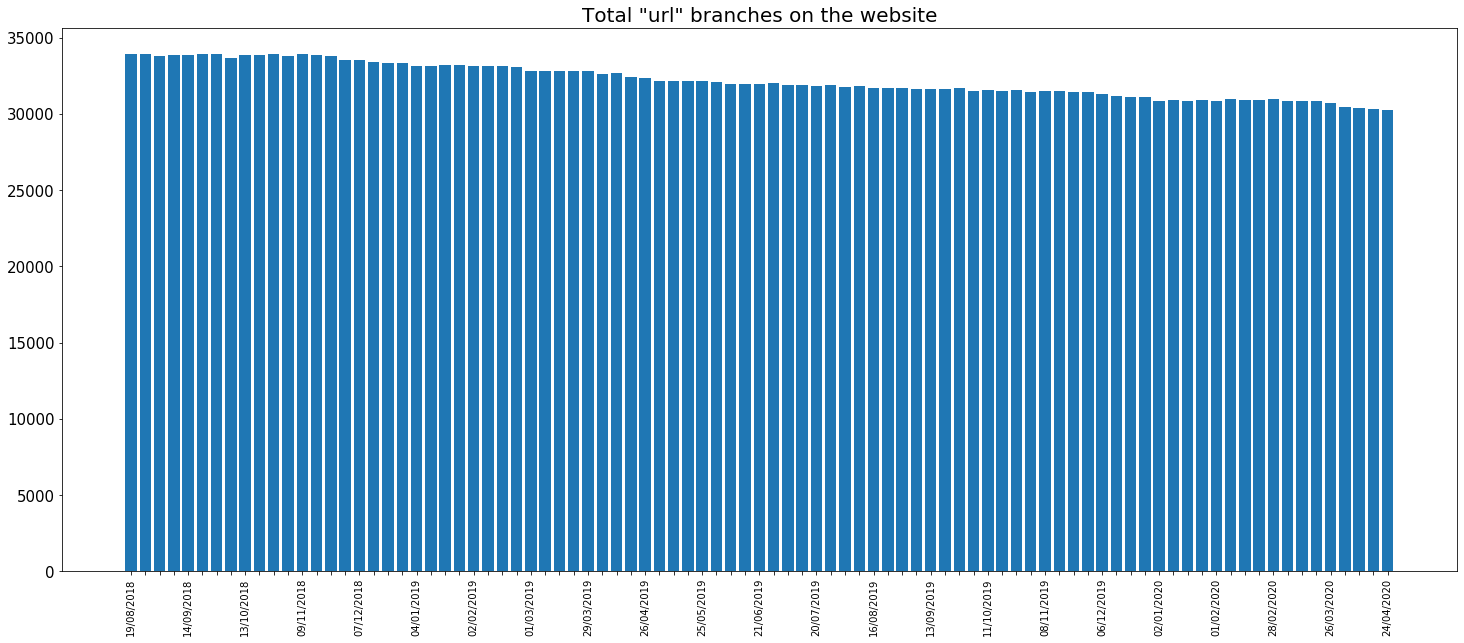

In [23]:
# bar chart showing total number of url branches on the site

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.4, wspace=0.1)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_rightmove1['Date']

labels = list(df_rightmove1['Date'])

for i in range(4,len(labels),4):
    labels[i-1]=''
    labels[i-2]=''
    labels[i-3]=''

labels[len(labels)-1]=list(df_rightmove1['Date'])[-1]
labels[len(labels)-2]=''
labels[len(labels)-3]=''
labels[len(labels)-4]=''

y1 = df_rightmove1['total branches']
ax.set_title('Total "url" branches on the website', fontsize=20)
ax.set_xticklabels(labels, rotation = 90)
ax.yaxis.set_tick_params(labelsize=15)
ax.bar(x, y1)

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('rightmove1 - total url branches.png', bbox_inches = 'tight')
    
    slideTitle.append('Total "url" branches on the website')
    slideText.append('August 2018 to '+ str(monthNow))
    imagePath.append('rightmove1 - total url branches.png')
       
plt.show()

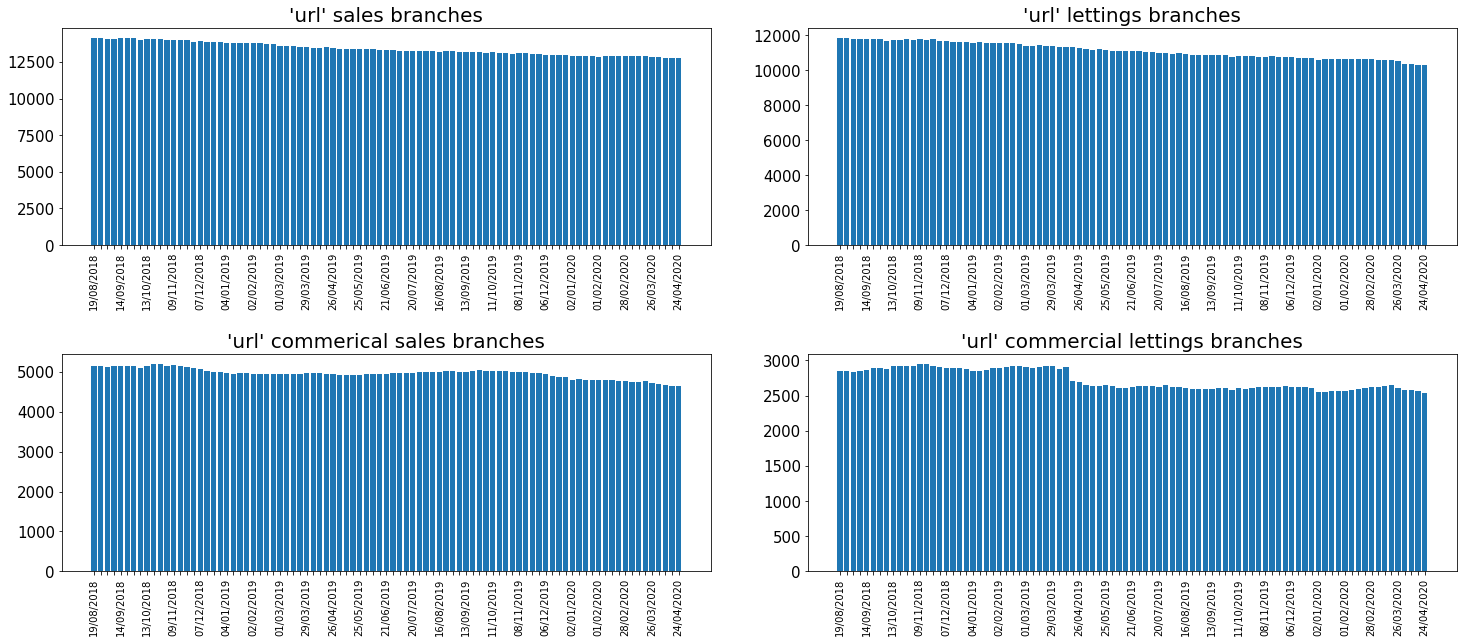

In [24]:
# 4 bar charts showing total number of url branches on the site by type

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_rightmove1['Date']

labels = list(df_rightmove1['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove1['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['branches Sales','branches Rent','branches Com Sales','branches Com Rent']
chart_titles=['sales', 'lettings','commerical sales','commercial lettings']

for i in range(4):
    y.append(df_rightmove1[chart_cols[i]])
    ax[int(i/2),i%2].set_title(str("'url' ") + chart_titles[i] + str(" branches"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    #ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/2),i%2].bar(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('rightmove1 - total url branches by type.png', bbox_inches = 'tight')
    
    slideTitle.append('Branches by type on the site')
    slideText.append('August 2018 to '+ str(monthNow))
    imagePath.append('rightmove1 - total url branches by type.png')

plt.show()


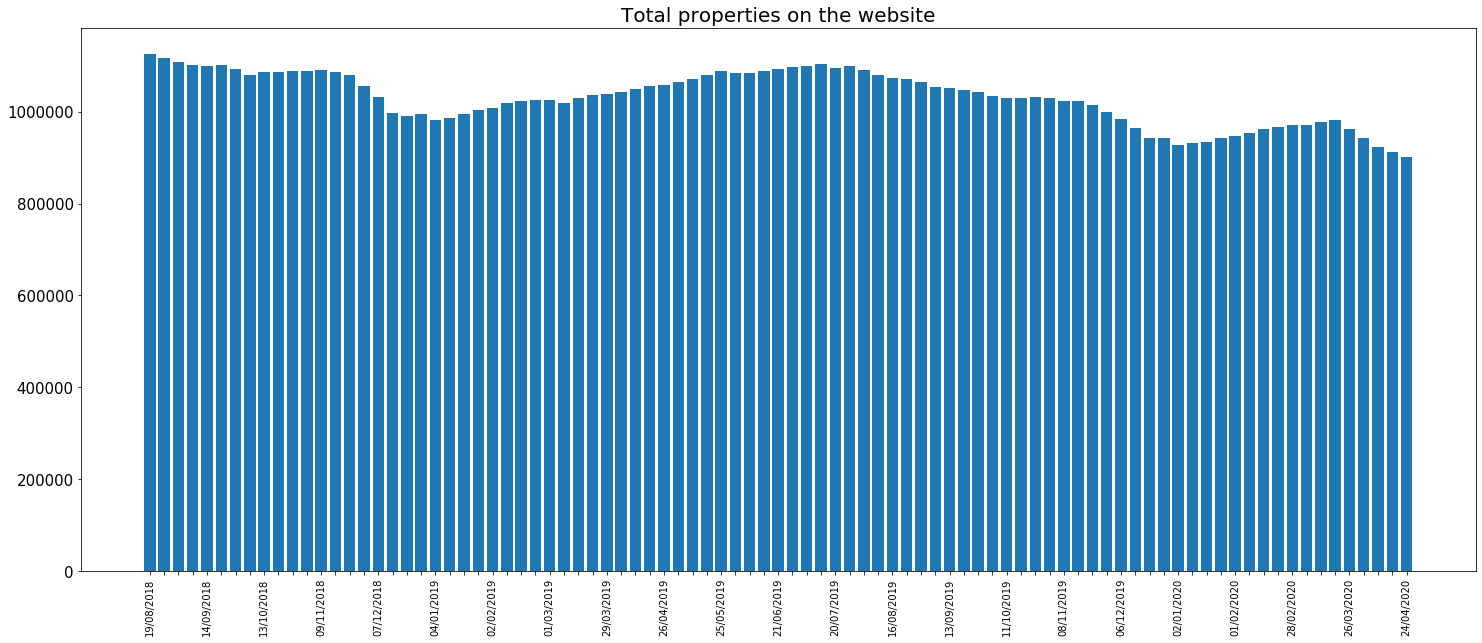

In [25]:
# bar chart showing total number of properties on the site

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.4, wspace=0.1)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_rightmove1['Date']

labels = list(df_rightmove1['Date'])

for i in range(4,len(labels),4):
    labels[i-1]=''
    labels[i-2]=''
    labels[i-3]=''

labels[len(labels)-1]=list(df_rightmove1['Date'])[-1]
labels[len(labels)-2]=''
labels[len(labels)-3]=''
labels[len(labels)-4]=''

y1 = df_rightmove1['total properties']
ax.set_title('Total properties on the website', fontsize=20)
ax.set_xticklabels(labels, rotation = 90)
ax.yaxis.set_tick_params(labelsize=15)
ax.bar(x, y1)

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('rightmove1 - total properties.png', bbox_inches = 'tight')
    
    slideTitle.append('Total properties on the website')
    slideText.append('August 2018 to '+ str(monthNow))
    imagePath.append('rightmove1 - total properties.png')
       
plt.show()

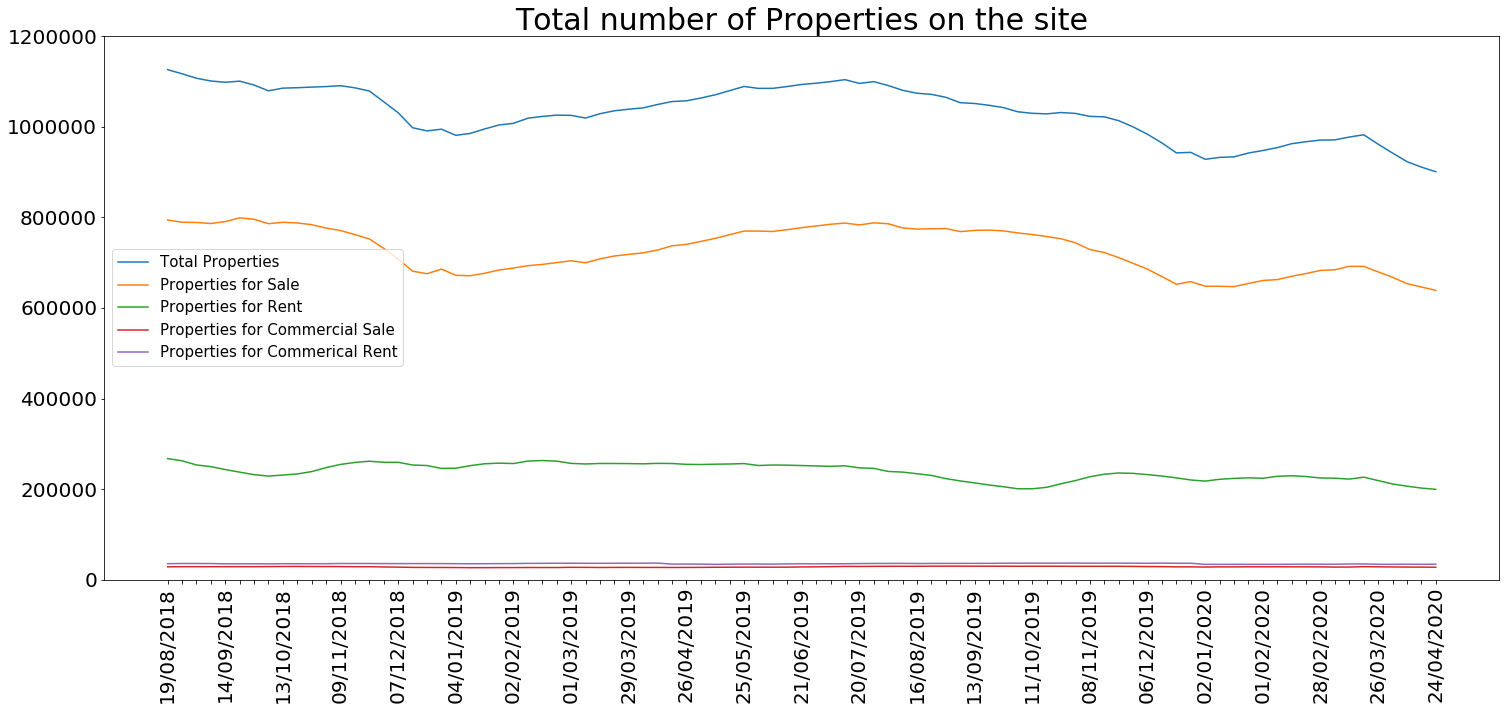

In [26]:
# line chart showing number of properties in rightmove: total; sales; rent
# not including commerical

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.4, wspace=0.1)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_rightmove1['Date']

labels = list(df_rightmove1['Date'])

for i in range(4,len(labels),4):
    labels[i-1]=''
    labels[i-2]=''
    labels[i-3]=''

labels[len(labels)-1]=list(df_rightmove1['Date'])[-1]
labels[len(labels)-2]=''
labels[len(labels)-3]=''
labels[len(labels)-4]=''

y1 = df_rightmove1['total properties']
y2 = df_rightmove1['properties Sales']
y3 = df_rightmove1['properties Rent']
y4 = df_rightmove1['properties Com Sales']
y5 = df_rightmove1['properties Com Rent']
ax.set_title('Total number of Properties on the site', fontsize=30)
ax.set_xticklabels(labels, rotation = 90, fontsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_ylim(bottom = 0)
ax.set_ylim(top = 1200000)
ax.plot(x, y1, label = 'Total Properties')
ax.plot(x, y2, label = 'Properties for Sale')
ax.plot(x, y3, label = 'Properties for Rent')
ax.plot(x, y4, label = 'Properties for Commercial Sale')
ax.plot(x, y5, label = 'Properties for Commerical Rent')
ax.legend(fontsize=15)


if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('rightmove1 - properties on the site and sales let.png', bbox_inches = 'tight')
    
    slideTitle.append('Properties on the site')
    slideText.append('August 2018 to '+ str(monthNow))
    imagePath.append('rightmove1 - properties on the site and sales let.png')
        
plt.show()


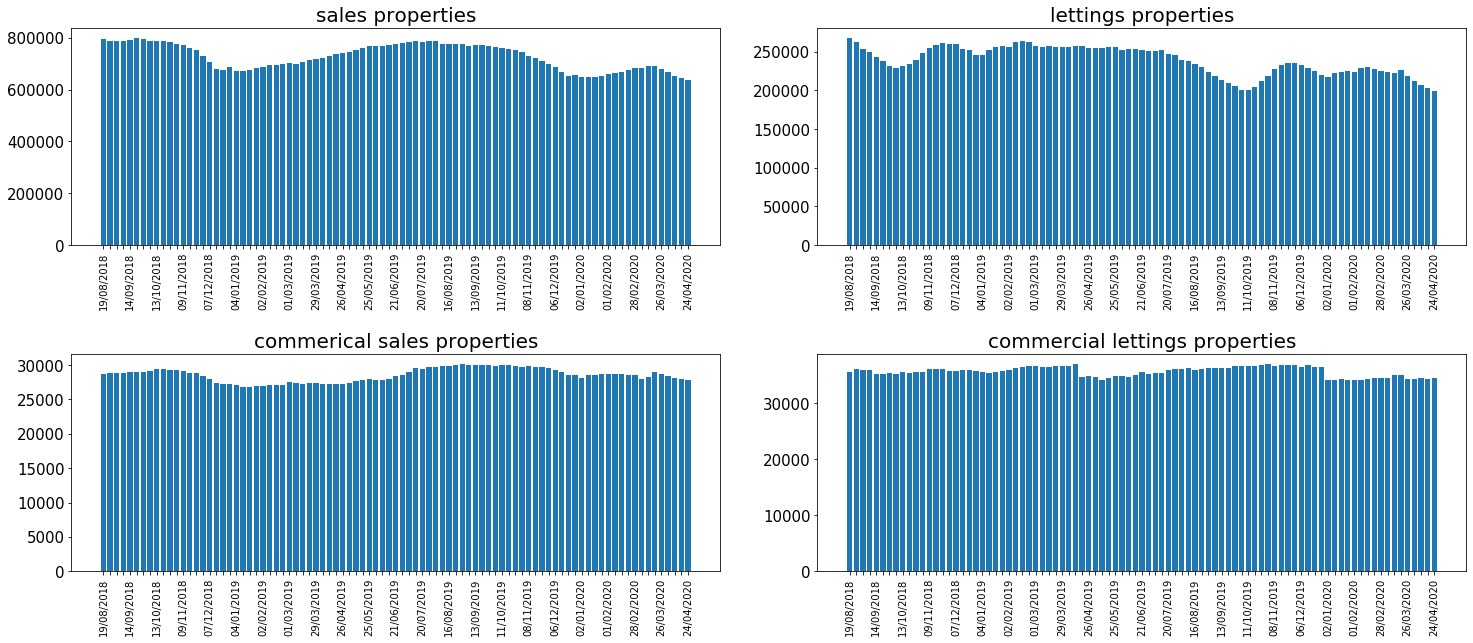

In [27]:
# 4 bar charts showing total number of properties on the site by type

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_rightmove1['Date']

labels = list(df_rightmove1['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove1['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['properties Sales','properties Rent','properties Com Sales','properties Com Rent']
chart_titles=['sales', 'lettings','commerical sales','commercial lettings']

for i in range(4):
    y.append(df_rightmove1[chart_cols[i]])
    ax[int(i/2),i%2].set_title(str("") + chart_titles[i] + str(" properties"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    #ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/2),i%2].bar(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('rightmove1 - total properties by type.png', bbox_inches = 'tight')
    
    slideTitle.append('Properties by type on the site')
    slideText.append('August 2018 to '+ str(monthNow))
    imagePath.append('rightmove1 - total properties by type.png')

plt.show()


In [28]:
# add in columns of new and gone sales branches and letting branches

newSales = [0]
newLettings = [0]
goneSales = [0]
goneLettings= [0]


for i in range(1,len(df)):
    newSales.append(df[i][(~df[i]['branch_url'].isin(df[i-1]['branch_url'])) &\
                          (df[i]['branch_url'].str.contains("/property-for-sale/"))]['branch_url'].count())
    newLettings.append(df[i][(~df[i]['branch_url'].isin(df[i-1]['branch_url'])) &\
                          (df[i]['branch_url'].str.contains("/property-to-rent/"))]['branch_url'].count())

    goneSales.append(df[i-1][(~df[i-1]['branch_url'].isin(df[i]['branch_url'])) &\
                          (df[i-1]['branch_url'].str.contains("/property-for-sale/"))]['branch_url'].count())
    goneLettings.append(df[i-1][(~df[i-1]['branch_url'].isin(df[i]['branch_url'])) &\
                          (df[i-1]['branch_url'].str.contains("/property-to-rent/"))]['branch_url'].count())
    
df_rightmove1['New Sales Branches'] = newSales
df_rightmove1['New Letting Branches'] = newLettings
df_rightmove1['Gone Sales Branches'] = goneSales
df_rightmove1['Gone Letting Branches'] = goneLettings
df_rightmove1['Net sales branch chg'] = df_rightmove1['New Sales Branches']  - df_rightmove1['Gone Sales Branches']
df_rightmove1['Net letting branch chg'] = df_rightmove1['New Letting Branches']  - df_rightmove1['Gone Letting Branches']

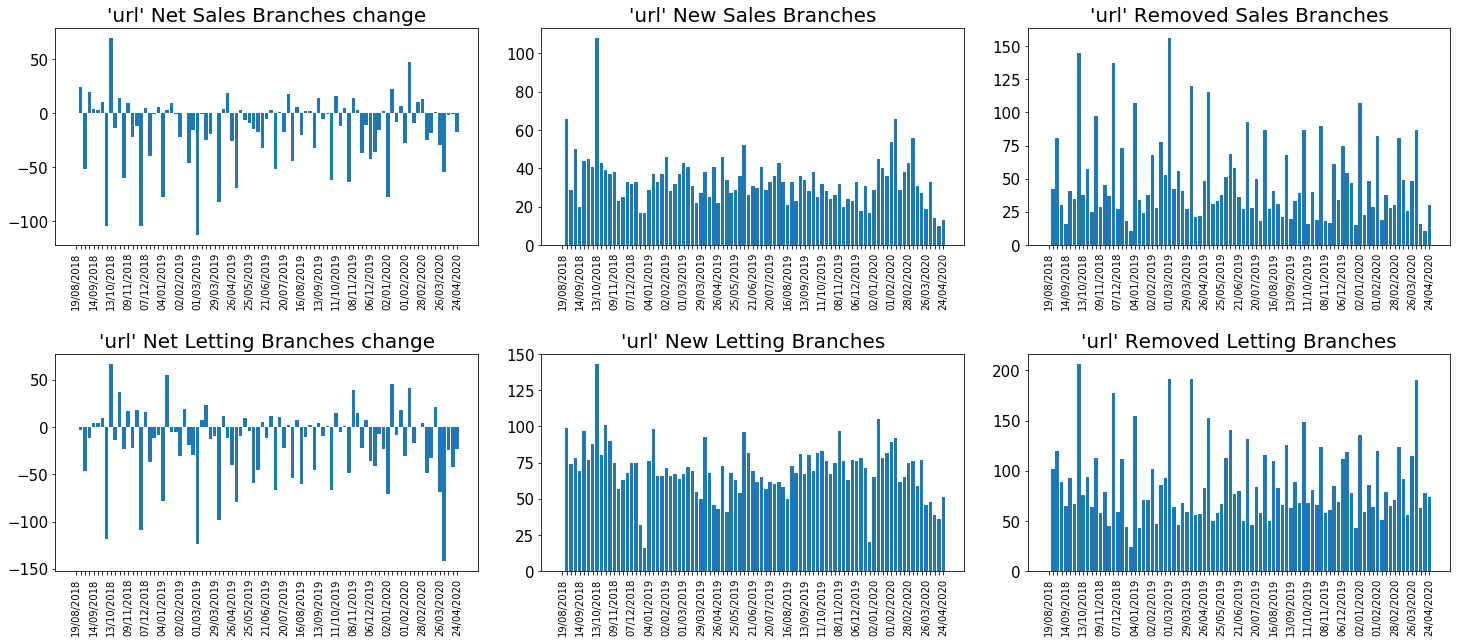

In [29]:
# 6 bar charts showing change in sales and letting branches

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_rightmove1['Date']

labels = list(df_rightmove1['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove1['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['Net sales branch chg','New Sales Branches','Gone Sales Branches',
            'Net letting branch chg','New Letting Branches','Gone Letting Branches']
chart_titles=['Net Sales Branches change', 'New Sales Branches','Removed Sales Branches',
              'Net Letting Branches change', 'New Letting Branches','Removed Letting Branches']

for i in range(6):
    y.append(df_rightmove1[chart_cols[i]])
    ax[int(i/3),i%3].set_title(str("'url' ") + chart_titles[i] + str(""), fontsize=20)
    ax[int(i/3),i%3].set_xticklabels(labels, rotation = 90)
    ax[int(i/3),i%3].yaxis.set_tick_params(labelsize=15)
    #ax[int(i/3),i%3].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/3),i%3].bar(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('rightmove1 - branch change by type.png', bbox_inches = 'tight')
    
    slideTitle.append('Monthly change in branches')
    slideText.append('August 2018 to '+ str(monthNow))
    imagePath.append('rightmove1 - branch change by type.png')

plt.show()


In [30]:
# add in columns of new and gone com sales branches and com letting branches

newComSales = [0]
newComLettings = [0]
goneComSales = [0]
goneComLettings= [0]


for i in range(1,len(df)):
    newComSales.append(df[i][(~df[i]['branch_url'].isin(df[i-1]['branch_url'])) &\
                          (df[i]['branch_url'].str.contains("/commercial-property-for-sale/"))]['branch_url'].count())
    newComLettings.append(df[i][(~df[i]['branch_url'].isin(df[i-1]['branch_url'])) &\
                          (df[i]['branch_url'].str.contains("/commercial-property-to-let/"))]['branch_url'].count())

    goneComSales.append(df[i-1][(~df[i-1]['branch_url'].isin(df[i]['branch_url'])) &\
                          (df[i-1]['branch_url'].str.contains("/commercial-property-for-sale/"))]['branch_url'].count())
    goneComLettings.append(df[i-1][(~df[i-1]['branch_url'].isin(df[i]['branch_url'])) &\
                          (df[i-1]['branch_url'].str.contains("/commercial-property-to-let/"))]['branch_url'].count())
    
df_rightmove1['New Com Sales Branches'] = newComSales
df_rightmove1['New Com Letting Branches'] = newComLettings
df_rightmove1['Gone Com Sales Branches'] = goneComSales
df_rightmove1['Gone Com Letting Branches'] = goneComLettings
df_rightmove1['Net Com sales branch chg'] = df_rightmove1['New Com Sales Branches']  - df_rightmove1['Gone Com Sales Branches']
df_rightmove1['Net Com letting branch chg'] = df_rightmove1['New Com Letting Branches']  - df_rightmove1['Gone Com Letting Branches']

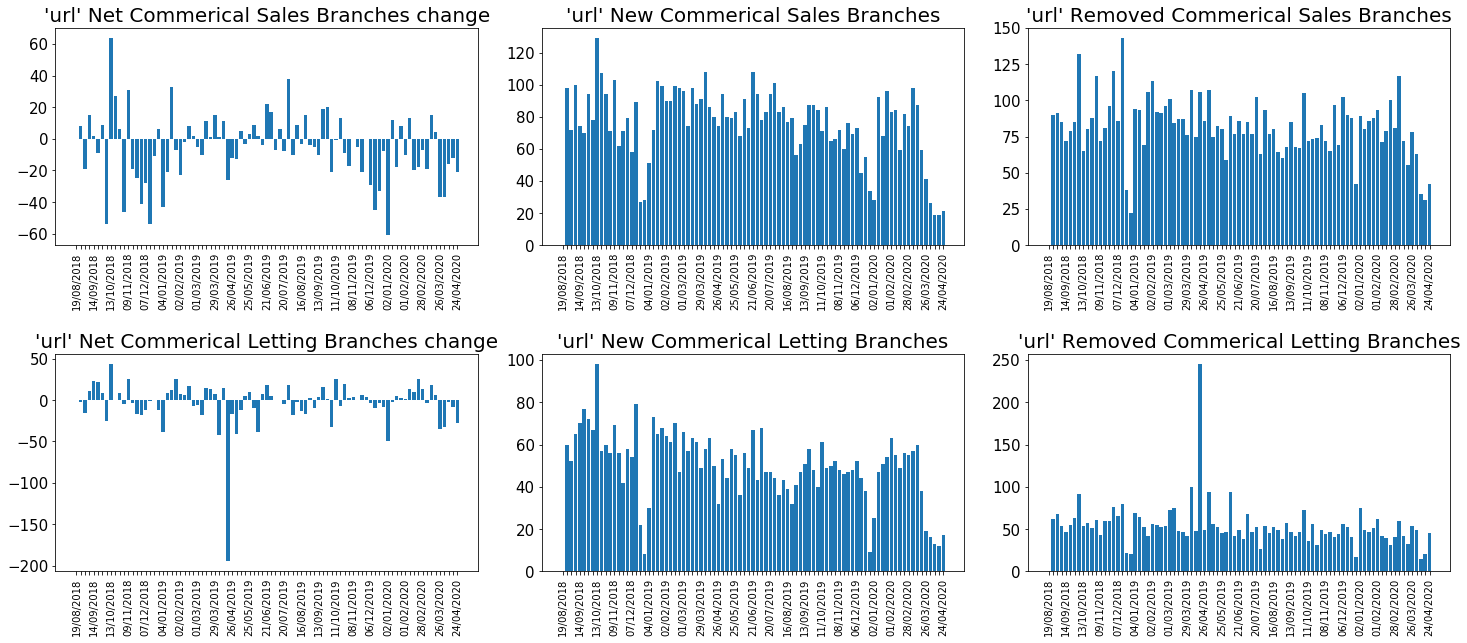

In [31]:
# 6 bar charts showing change in com sales and com letting branches

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_rightmove1['Date']

labels = list(df_rightmove1['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove1['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['Net Com sales branch chg','New Com Sales Branches','Gone Com Sales Branches',
            'Net Com letting branch chg','New Com Letting Branches','Gone Com Letting Branches']
chart_titles=['Net Commerical Sales Branches change', 'New Commerical Sales Branches','Removed Commerical Sales Branches',
              'Net Commerical Letting Branches change', 'New Commerical Letting Branches','Removed Commerical Letting Branches']

for i in range(6):
    y.append(df_rightmove1[chart_cols[i]])
    ax[int(i/3),i%3].set_title(str("'url' ") + chart_titles[i] + str(""), fontsize=20)
    ax[int(i/3),i%3].set_xticklabels(labels, rotation = 90)
    ax[int(i/3),i%3].yaxis.set_tick_params(labelsize=15)
    #ax[int(i/3),i%3].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/3),i%3].bar(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('rightmove1 - com branch change by type.png', bbox_inches = 'tight')
    
    slideTitle.append('Monthly change in commerical branches')
    slideText.append('August 2018 to '+ str(monthNow))
    imagePath.append('rightmove1 - com branch change by type.png')

plt.show()


In [32]:
#
# split branches into brands / businesses
# and by type: sales; lettings; commerical sales; commerical lettings
#

In [33]:
# lists of brands

countrywideList = ['Abbotts','Accord Lets','Alan de Maid','Andrew Reeves','Andrews Butler','Ashton Burkinshaw',\
                   'Austin & Wyatt','Bairstow Eves','Beresford Adams','Bridgfords','Buckell & Ballard',\
                   'Carsons','Chappell & Matthews','CityLets York','Clive Watkin Partnership','Countrywide','Cryers',\
                   'Dixons','Entwistle Green','Faron Sutaria','Frank Innes','Freeman Foreman',\
                   'Fulfords','Gascoigne-Pees','Gerring & Colyer','Greene & Co','Hamptons International',\
                   'Hetheringtons Countrywide','John Curtis Harpenden','John Curtis Wheathampstead',\
                   'John Francis','John D Wood & Co.','King & Chasemore','Lambert Smith Hampton',\
                   'Locke & England','Mann Countrywide','Miller Countrywide','Morris Dibben','Palmer Snell',\
                   'Preston Bennett Stanmore','PKL','R.A. Bennett & Partners','Rentons Countrywide',\
                   'Slater Hogg & Howison','SLM','Spencers','Stratton Creber','Sutton Kersh','Taylors',\
                   'Underwoods Town & County','Urban Spaces','Watson Bull Porter','Wilson Peacock']

lslList = ['Your move','Reeds Rains','Marsh & Parsons']

chestertonList = ['Chestertons', 'Humberts','Farleys']

sequenceList = ['Allen & Harris','Bagshaws Residential','Barnard Marcus','Brown & Merry',\
                'Fox & Sons','Jones & Chapman','Manners & Harrison', 'Roger Platt','Shipways',\
                'Swetenhams','William H Brown', 'Knight Partnership']

restOfOnlineList = ['lettingaproperty','my-let.com','SW19.com','BuyLondonFlat.com','LetsMoveHome.com',
                    'Lettingsupermarket.com','loveyourpostcode','movequick.com','PennyLaneHomes.com',
                    'Stanifords.com','abodeMove.co.uk','FastSaleEstateAgent.co.uk','Griffin Residential',
                    'Makeurmove.co.uk','MarkGilbertson.co.uk','Matthewsestates.co.uk ','Only Bungalows.co.uk',
                    'Propertyfirst.co.uk','tem-po.co.uk','turtlehomes.co.uk','Auctionlets.com','Big Black Hen.com',
                    'catchyourproperty.com', 'changingproperty.com','EstatesDirect.com','Faircloughestates.com',
                    'Fish2let.com','Hook Homes.com','iletmyproperty','Justhalfapercent.com','Letcanterbury.com',
                    'LettingsandSales.com','Letwithease.com','Lookatme1st.com','Mark Beaumont.com',
                    'Medway Premier Homes.com','Movenowproperties.com','myletz.com','OXlets.com Ltd',
                    'Property In.com','Propertylandlords.com','Prop-Search.com','Rayners.com','reidsofmayfair.com',
                    'RentLondonFlat.com','Rentwirral.com','sellingaproperty','Shortletting.com','Studenttenant.com',
                    'The Buy2Let Shop.com','time2move.com','Vi-lets','WightHomes.com','121move.co.uk',
                    '4let.co.uk','Alexandra Lloyd.co.uk','Alpha-Let.co.uk','Andrewleeslettings.co.uk',
                    'Be-Quick.co.uk','CentralParkEstates.co.uk','Coolcribs.co.uk','DirectLettings.co.uk',
                    'Home4.co.uk','Hoppla.co.uk','Houses.co.uk','kingroyal.co.uk','Lets Get you Moving.co.uk',
                    'Moovahome.co.uk','MyTenantRent.co.uk','oakleighblue.co.uk','park.homes.co.uk',
                    'Prem-Lets.co.uk','Pro-lets.co.uk','Promptmove.co.uk','Property-Direct.co.uk',
                    'relocate-me.co.uk','Rentmyhome.co.uk','sellmyhome.co.uk','Smarter-Moves.co.uk',
                    'SOLD.co.uk','warriners.co.uk', 'imovehome','settled','99home','doorsteps','esale',
                    'easyproperty','springbok','findahome' ]

In [34]:
# escape special characters in names for literal match

countrywideList = [re.escape(m) for m in countrywideList]
lslList = [re.escape(m) for m in lslList]
chestertonList = [re.escape(m) for m in chestertonList]
sequenceList = [re.escape(m) for m in sequenceList]
restOfOnlineList = [re.escape(m) for m in restOfOnlineList]

In [35]:
# add in numbers for all listed properties by brand

# offline businesses
countrywideALL = []
lslALL = []
chestertonALL = []
sequenceALL = []
connellsALL = []
martinALL = []
savillsALL = []
haartALL = []
leadersALL = []
huntersALL = []
winkworthALL = []
belvoirALL = []
fineALL = []
kinleighALL = []
struttALL = []
chancellorsALL = []
foxtonsALL = []
restOfOfflineALL = []

# online businesses
purplebricksALL = []
expressALL = []
openrentALL = []
emoovALL = []
housesimpleALL = []
tepiloALL = []
housenetworkALL = []
urbanALL = []
hatchedALL = []
easypropertyALL = []
yopaALL = []
restOfOnlineALL = []

In [36]:
for ii in range(len(files)):
 
    countrywideALL1 = 0
    for i in range(len(countrywideList)):
        countrywideALL1 = countrywideALL1 + (df[ii][df[ii]['name'].str.contains(countrywideList[i], case=False)]['results']\
                                             .replace('[,]', '', regex=True).astype(int).sum())

    lslALL1 = 0
    for i in range(len(lslList)):
        lslALL1 = lslALL1 + (df[ii][df[ii]['name'].str.contains(lslList[i], case=False)]['results']\
                             .replace('[,]', '', regex=True).astype(int).sum())

    chestertonALL1 = 0
    for i in range(len(chestertonList)):
        chestertonALL1 = chestertonALL1 + (df[ii][df[ii]['name'].str.contains(chestertonList[i], case=False)]['results']\
                                         .replace('[,]', '', regex=True).astype(int).sum())

    sequenceALL1 = 0
    for i in range(len(sequenceList)):
        sequenceALL1 = sequenceALL1 + (df[ii][df[ii]['name'].str.contains(sequenceList[i], case=False)]['results']\
                                       .replace('[,]', '', regex=True).astype(int).sum())

    connellsALL1 = (df[ii][df[ii]['name'].str.contains('Connells', case=False)]['results']\
                    .replace('[,]', '', regex=True).astype(int).sum())
    martinALL1 = (df[ii][df[ii]['name'].str.contains('Martin & Co', case=False)]['results']\
                  .replace('[,]', '', regex=True).astype(int).sum())
    savillsALL1 = (df[ii][df[ii]['name'].str.contains('Savills', case=False)]['results']\
                   .replace('[,]', '', regex=True).astype(int).sum())
    haartALL1 = (df[ii][df[ii]['name'].str.contains('haart', case=False)]['results']\
                 .replace('[,]', '', regex=True).astype(int).sum())
    leadersALL1 = (df[ii][df[ii]['name'].str.contains('Leaders', case=False)]['results']\
                   .replace('[,]', '', regex=True).astype(int).sum())
    huntersALL1 = (df[ii][df[ii]['name'].str.contains('Hunters', case=False)]['results']\
                   .replace('[,]', '', regex=True).astype(int).sum())
    winkworthALL1 = (df[ii][df[ii]['name'].str.contains('Winkworth', case=False)]['results']\
                     .replace('[,]', '', regex=True).astype(int).sum())
    belvoirALL1 = (df[ii][df[ii]['name'].str.contains('Belvoir', case=False)]['results']\
                   .replace('[,]', '', regex=True).astype(int).sum())
    fineALL1 = (df[ii][df[ii]['name'].str.contains('Fine & Country', case=False)]['results']\
                .replace('[,]', '', regex=True).astype(int).sum())
    kinleighALL1 = (df[ii][df[ii]['name'].str.contains('Kinleigh Folkard & Hayward', case=False)]['results']\
                    .replace('[,]', '', regex=True).astype(int).sum())
    struttALL1 = (df[ii][df[ii]['name'].str.contains('Strutt & Parker', case=False)]['results']\
                  .replace('[,]', '', regex=True).astype(int).sum())
    chancellorsALL1 = (df[ii][df[ii]['name'].str.contains('Chancellors', case=False)]['results']\
                       .replace('[,]', '', regex=True).astype(int).sum())
    foxtonsALL1 = (df[ii][df[ii]['name'].str.contains('Foxtons', case=False)]['results']\
                   .replace('[,]', '', regex=True).astype(int).sum())

    purplebricksALL1 = (df[ii][df[ii]['name'].str.contains('Purplebricks', case=False)]['results']\
                        .replace('[,]', '', regex=True).astype(int).sum())
    expressALL1 = (df[ii][df[ii]['name'].str.contains('Express Estate Agency', case=False)]['results']\
                   .replace('[,]', '', regex=True).astype(int).sum())
    openrentALL1 = (df[ii][df[ii]['name'].str.contains('openrent', case=False)]['results']\
                    .replace('[,]', '', regex=True).astype(int).sum())
    emoovALL1 = (df[ii][df[ii]['name'].str.contains('emoov', case=False)]['results']\
                 .replace('[,]', '', regex=True).astype(int).sum())
    housesimpleALL1 = (df[ii][df[ii]['name'].str.contains('housesimple', case=False)]['results']\
                       .replace('[,]', '', regex=True).astype(int).sum())
    tepiloALL1 = (df[ii][df[ii]['name'].str.contains('tepilo', case=False)]['results']\
                  .replace('[,]', '', regex=True).astype(int).sum())
    housenetworkALL1 = (df[ii][df[ii]['name'].str.contains('house network', case=False)]['results']\
                        .replace('[,]', '', regex=True).astype(int).sum())
    urbanALL1 = (df[ii][df[ii]['name'].str.contains('Urban.co.uk', case=False)]['results']\
                 .replace('[,]', '', regex=True).astype(int).sum())
    hatchedALL1 = (df[ii][df[ii]['name'].str.contains('Hatched.co.uk', case=False)]['results']\
                   .replace('[,]', '', regex=True).astype(int).sum())
    easypropertyALL1 = (df[ii][df[ii]['name'].str.contains('easyproperty', case=False)]['results']\
                        .replace('[,]', '', regex=True).astype(int).sum())
    yopaALL1 = (df[ii][df[ii]['name'].str.contains('Yopa', case=False)]['results']\
                .replace('[,]', '', regex=True).astype(int).sum())

    restOfOnlineALL1 = 0
    for i in range(len(restOfOnlineList)):
        restOfOnlineALL1 = restOfOnlineALL1 + (df[ii][df[ii]['name'].str.contains(restOfOnlineList[i], case=False)]['results']\
                                               .replace('[,]', '', regex=True).astype(int).sum())

    countrywideALL.append(countrywideALL1)
    lslALL.append(lslALL1)
    chestertonALL.append(chestertonALL1)
    sequenceALL.append(sequenceALL1)
    connellsALL.append(connellsALL1)
    martinALL.append(martinALL1)
    savillsALL.append(savillsALL1)
    haartALL.append(haartALL1)
    leadersALL.append(leadersALL1)
    huntersALL.append(huntersALL1)
    winkworthALL.append(winkworthALL1)
    belvoirALL.append(belvoirALL1)
    fineALL.append(fineALL1)
    kinleighALL.append(kinleighALL1)
    struttALL.append(struttALL1)
    chancellorsALL.append(chancellorsALL1)
    foxtonsALL.append(foxtonsALL1)
    
    purplebricksALL.append(purplebricksALL1)
    expressALL.append(expressALL1)
    openrentALL.append(openrentALL1)
    emoovALL.append(emoovALL1)
    housesimpleALL.append(housesimpleALL1)
    tepiloALL.append(tepiloALL1)
    housenetworkALL.append(housenetworkALL1)
    urbanALL.append(urbanALL1)
    hatchedALL.append(hatchedALL1)
    easypropertyALL.append(easypropertyALL1)
    yopaALL.append(yopaALL1)
    restOfOnlineALL.append(restOfOnlineALL1)
    

In [37]:
# offline businesses
df_rightmove1['countrywideALL'] = countrywideALL
df_rightmove1['lslALL'] = lslALL
df_rightmove1['chestertonALL'] = chestertonALL
df_rightmove1['sequenceALL'] = sequenceALL
df_rightmove1['connellsALL'] = connellsALL
df_rightmove1['martinALL'] = martinALL
df_rightmove1['savillsALL'] = savillsALL
df_rightmove1['haartALL'] = haartALL
df_rightmove1['leadersALL'] = leadersALL
df_rightmove1['huntersALL'] = huntersALL
df_rightmove1['winkworthALL'] = winkworthALL
df_rightmove1['belvoirALL'] = belvoirALL
df_rightmove1['fineALL'] = fineALL
df_rightmove1['kinleighALL'] = kinleighALL
df_rightmove1['struttALL'] = struttALL
df_rightmove1['chancellorsALL'] = chancellorsALL
df_rightmove1['foxtonsALL'] = foxtonsALL

# online businesses
df_rightmove1['purplebricksALL'] = purplebricksALL
df_rightmove1['expressALL'] = expressALL
df_rightmove1['openrentALL'] = openrentALL
df_rightmove1['emoovALL'] = emoovALL
df_rightmove1['housesimpleALL'] = housesimpleALL
df_rightmove1['tepiloALL'] = tepiloALL
df_rightmove1['housenetworkALL'] = housenetworkALL
df_rightmove1['urbanALL'] = urbanALL
df_rightmove1['hatchedALL'] = hatchedALL
df_rightmove1['easypropertyALL'] = easypropertyALL
df_rightmove1['yopaALL'] = yopaALL
df_rightmove1['restOfOnlineALL'] = restOfOnlineALL


In [38]:
# assume we can get all then online brands, therefore what remains is rest of offline

df_rightmove1['onlineAll'] = df_rightmove1['purplebricksALL'] + df_rightmove1['expressALL']\
+ df_rightmove1['openrentALL'] + df_rightmove1['emoovALL'] + df_rightmove1['housesimpleALL']\
+ df_rightmove1['tepiloALL'] + df_rightmove1['housenetworkALL'] + df_rightmove1['urbanALL']\
+ df_rightmove1['hatchedALL'] + df_rightmove1['easypropertyALL'] + df_rightmove1['yopaALL']\
+ df_rightmove1['restOfOnlineALL']

df_rightmove1['restOfOfflineALL'] = df_rightmove1['total properties'] - df_rightmove1['onlineAll']\
- df_rightmove1['countrywideALL']- df_rightmove1['lslALL'] - df_rightmove1['chestertonALL']\
- df_rightmove1['sequenceALL']- df_rightmove1['connellsALL']- df_rightmove1['martinALL']\
- df_rightmove1['savillsALL']- df_rightmove1['haartALL']- df_rightmove1['leadersALL']\
- df_rightmove1['huntersALL']- df_rightmove1['winkworthALL']- df_rightmove1['belvoirALL']\
- df_rightmove1['fineALL']- df_rightmove1['kinleighALL']- df_rightmove1['struttALL']\
- df_rightmove1['chancellorsALL']- df_rightmove1['foxtonsALL']

df_rightmove1['offlineALL'] = df_rightmove1['total properties'] - df_rightmove1['onlineAll']

In [39]:
# add in numbers for Sale listed properties by brand

# offline businesses
countrywideSale = []
lslSale = []
chestertonSale = []
sequenceSale = []
connellsSale = []
martinSale = []
savillsSale = []
haartSale = []
leadersSale = []
huntersSale = []
winkworthSale = []
belvoirSale = []
fineSale = []
kinleighSale = []
struttSale = []
chancellorsSale = []
foxtonsSale = []
restOfOfflineSale = []

# online businesses
purplebricksSale = []
expressSale = []
openrentSale = []
emoovSale = []
housesimpleSale = []
tepiloSale = []
housenetworkSale = []
urbanSale = []
hatchedSale = []
easypropertySale = []
yopaSale = []
restOfOnlineSale = []

In [40]:
for ii in range(len(files)):
 
    countrywideSale1 = 0
    for i in range(len(countrywideList)):
        countrywideSale1 = countrywideSale1 + (df[ii][df[ii]['name'].str.contains(countrywideList[i], case=False)\
                                                      & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                                               ['results'].replace('[,]', '', regex=True).astype(int).sum())

    lslSale1 = 0
    for i in range(len(lslList)):
        lslSale1 = lslSale1 + (df[ii][df[ii]['name'].str.contains(lslList[i], case=False)\
                                      & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                               ['results'].replace('[,]', '', regex=True).astype(int).sum())

    chestertonSale1 = 0
    for i in range(len(chestertonList)):
        chestertonSale1 = chestertonSale1 + (df[ii][df[ii]['name'].str.contains(chestertonList[i], case=False)\
                                                  & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                                           ['results'].replace('[,]', '', regex=True).astype(int).sum())

    sequenceSale1 = 0
    for i in range(len(sequenceList)):
        sequenceSale1 = sequenceSale1 + (df[ii][df[ii]['name'].str.contains(sequenceList[i], case=False)\
                                                & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                                         ['results'].replace('[,]', '', regex=True).astype(int).sum())

    connellsSale1 = (df[ii][df[ii]['name'].str.contains('Connells', case=False)\
                            & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                     ['results'].replace('[,]', '', regex=True).astype(int).sum())
    martinSale1 = (df[ii][df[ii]['name'].str.contains('Martin & Co', case=False)\
                          & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                   ['results'].replace('[,]', '', regex=True).astype(int).sum())
    savillsSale1 = (df[ii][df[ii]['name'].str.contains('Savills', case=False)\
                           & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())
    haartSale1 = (df[ii][df[ii]['name'].str.contains('haart', case=False)\
                         & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                  ['results'].replace('[,]', '', regex=True).astype(int).sum())
    leadersSale1 = (df[ii][df[ii]['name'].str.contains('Leaders', case=False)\
                           & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())
    huntersSale1 = (df[ii][df[ii]['name'].str.contains('Hunters', case=False)\
                           & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())
    winkworthSale1 = (df[ii][df[ii]['name'].str.contains('Winkworth', case=False)\
                             & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                      ['results'].replace('[,]', '', regex=True).astype(int).sum())
    belvoirSale1 = (df[ii][df[ii]['name'].str.contains('Belvoir', case=False)\
                           & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())
    fineSale1 = (df[ii][df[ii]['name'].str.contains('Fine & Country', case=False)\
                        & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                 ['results'].replace('[,]', '', regex=True).astype(int).sum())
    kinleighSale1 = (df[ii][df[ii]['name'].str.contains('Kinleigh Folkard & Hayward', case=False)\
                            & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                     ['results'].replace('[,]', '', regex=True).astype(int).sum())
    struttSale1 = (df[ii][df[ii]['name'].str.contains('Strutt & Parker', case=False)\
                          & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                   ['results'].replace('[,]', '', regex=True).astype(int).sum())
    chancellorsSale1 = (df[ii][df[ii]['name'].str.contains('Chancellors', case=False)\
                               & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                        ['results'].replace('[,]', '', regex=True).astype(int).sum())
    foxtonsSale1 = (df[ii][df[ii]['name'].str.contains('Foxtons', case=False)\
                           & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())

# this is the balancing figure
#     restOfOfflineSale1 = 0
#     for i in range(len(restOfOfflineList)):
#         restOfOfflineSale1 = restOfOfflineSale1 + (df[ii][df[ii]['name']\
#.str.contains(restOfOfflineList[i], case=False)]['results'].replace('[,]', '', regex=True).astype(int).sum())

    purplebricksSale1 = (df[ii][df[ii]['name'].str.contains('Purplebricks', case=False)\
                                & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                         ['results'].replace('[,]', '', regex=True).astype(int).sum())
    expressSale1 = (df[ii][df[ii]['name'].str.contains('Express Estate Agency', case=False)\
                           & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())
    openrentSale1 = (df[ii][df[ii]['name'].str.contains('openrent', case=False)\
                            & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                     ['results'].replace('[,]', '', regex=True).astype(int).sum())
    emoovSale1 = (df[ii][df[ii]['name'].str.contains('emoov', case=False)\
                         & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                  ['results'].replace('[,]', '', regex=True).astype(int).sum())
    housesimpleSale1 = (df[ii][df[ii]['name'].str.contains('housesimple', case=False)\
                               & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                        ['results'].replace('[,]', '', regex=True).astype(int).sum())
    tepiloSale1 = (df[ii][df[ii]['name'].str.contains('tepilo', case=False)\
                          & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                   ['results'].replace('[,]', '', regex=True).astype(int).sum())
    housenetworkSale1 = (df[ii][df[ii]['name'].str.contains('house network', case=False)\
                                & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                         ['results'].replace('[,]', '', regex=True).astype(int).sum())
    urbanSale1 = (df[ii][df[ii]['name'].str.contains('Urban.co.uk', case=False)\
                         & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                  ['results'].replace('[,]', '', regex=True).astype(int).sum())
    hatchedSale1 = (df[ii][df[ii]['name'].str.contains('Hatched.co.uk', case=False)\
                           & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())
    easypropertySale1 = (df[ii][df[ii]['name'].str.contains('easyproperty', case=False)\
                                & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                         ['results'].replace('[,]', '', regex=True).astype(int).sum())
    yopaSale1 = (df[ii][df[ii]['name'].str.contains('Yopa', case=False)\
                        & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                 ['results'].replace('[,]', '', regex=True).astype(int).sum())

    restOfOnlineSale1 = 0
    for i in range(len(restOfOnlineList)):
        restOfOnlineSale1 = restOfOnlineSale1 + (df[ii][df[ii]['name'].str.contains(restOfOnlineList[i], case=False)\
                                                        & (df[ii]['branch_url'].str.contains("/property-for-sale/"))]\
                                                 ['results'].replace('[,]', '', regex=True).astype(int).sum())

    countrywideSale.append(countrywideSale1)
    lslSale.append(lslSale1)
    chestertonSale.append(chestertonSale1)
    sequenceSale.append(sequenceSale1)
    connellsSale.append(connellsSale1)
    martinSale.append(martinSale1)
    savillsSale.append(savillsSale1)
    haartSale.append(haartSale1)
    leadersSale.append(leadersSale1)
    huntersSale.append(huntersSale1)
    winkworthSale.append(winkworthSale1)
    belvoirSale.append(belvoirSale1)
    fineSale.append(fineSale1)
    kinleighSale.append(kinleighSale1)
    struttSale.append(struttSale1)
    chancellorsSale.append(chancellorsSale1)
    foxtonsSale.append(foxtonsSale1)
    
    purplebricksSale.append(purplebricksSale1)
    expressSale.append(expressSale1)
    openrentSale.append(openrentSale1)
    emoovSale.append(emoovSale1)
    housesimpleSale.append(housesimpleSale1)
    tepiloSale.append(tepiloSale1)
    housenetworkSale.append(housenetworkSale1)
    urbanSale.append(urbanSale1)
    hatchedSale.append(hatchedSale1)
    easypropertySale.append(easypropertySale1)
    yopaSale.append(yopaSale1)
    restOfOnlineSale.append(restOfOnlineSale1)
    

In [41]:
# offline businesses
df_rightmove1['countrywideSale'] = countrywideSale
df_rightmove1['lslSale'] = lslSale
df_rightmove1['chestertonSale'] = chestertonSale
df_rightmove1['sequenceSale'] = sequenceSale
df_rightmove1['connellsSale'] = connellsSale
df_rightmove1['martinSale'] = martinSale
df_rightmove1['savillsSale'] = savillsSale
df_rightmove1['haartSale'] = haartSale
df_rightmove1['leadersSale'] = leadersSale
df_rightmove1['huntersSale'] = huntersSale
df_rightmove1['winkworthSale'] = winkworthSale
df_rightmove1['belvoirSale'] = belvoirSale
df_rightmove1['fineSale'] = fineSale
df_rightmove1['kinleighSale'] = kinleighSale
df_rightmove1['struttSale'] = struttSale
df_rightmove1['chancellorsSale'] = chancellorsSale
df_rightmove1['foxtonsSale'] = foxtonsSale

# online businesses
df_rightmove1['purplebricksSale'] = purplebricksSale
df_rightmove1['expressSale'] = expressSale
df_rightmove1['openrentSale'] = openrentSale
df_rightmove1['emoovSale'] = emoovSale
df_rightmove1['housesimpleSale'] = housesimpleSale
df_rightmove1['tepiloSale'] = tepiloSale
df_rightmove1['housenetworkSale'] = housenetworkSale
df_rightmove1['urbanSale'] = urbanSale
df_rightmove1['hatchedSale'] = hatchedSale
df_rightmove1['easypropertySale'] = easypropertySale
df_rightmove1['yopaSale'] = yopaSale
df_rightmove1['restOfOnlineSale'] = restOfOnlineSale


In [42]:
# assume we can get Sale then online brands, therefore what remains is rest of offline

df_rightmove1['onlineSale'] = df_rightmove1['purplebricksSale'] + df_rightmove1['expressSale']\
+ df_rightmove1['openrentSale'] + df_rightmove1['emoovSale'] + df_rightmove1['housesimpleSale']\
+ df_rightmove1['tepiloSale'] + df_rightmove1['housenetworkSale'] + df_rightmove1['urbanSale']\
+ df_rightmove1['hatchedSale'] + df_rightmove1['easypropertySale'] + df_rightmove1['yopaSale']\
+ df_rightmove1['restOfOnlineSale']

df_rightmove1['restOfOfflineSale'] = df_rightmove1['properties Sales'] - df_rightmove1['onlineSale']\
- df_rightmove1['countrywideSale']- df_rightmove1['lslSale'] - df_rightmove1['chestertonSale']\
- df_rightmove1['sequenceSale']- df_rightmove1['connellsSale']- df_rightmove1['martinSale']\
- df_rightmove1['savillsSale']- df_rightmove1['haartSale']- df_rightmove1['leadersSale']\
- df_rightmove1['huntersSale']- df_rightmove1['winkworthSale']- df_rightmove1['belvoirSale']\
- df_rightmove1['fineSale']- df_rightmove1['kinleighSale']- df_rightmove1['struttSale']\
- df_rightmove1['chancellorsSale']- df_rightmove1['foxtonsSale']

df_rightmove1['offlineSale'] = df_rightmove1['properties Sales'] - df_rightmove1['onlineSale']


In [43]:
# add in numbers for Let listed properties by brand

# offline businesses
countrywideLet = []
lslLet = []
chestertonLet = []
sequenceLet = []
connellsLet = []
martinLet = []
savillsLet = []
haartLet = []
leadersLet = []
huntersLet = []
winkworthLet = []
belvoirLet = []
fineLet = []
kinleighLet = []
struttLet = []
chancellorsLet = []
foxtonsLet = []
restOfOfflineLet = []

# online businesses
purplebricksLet = []
expressLet = []
openrentLet = []
emoovLet = []
housesimpleLet = []
tepiloLet = []
housenetworkLet = []
urbanLet = []
hatchedLet = []
easypropertyLet = []
yopaLet = []
restOfOnlineLet = []

In [44]:
for ii in range(len(files)):
 
    countrywideLet1 = 0
    for i in range(len(countrywideList)):
        countrywideLet1 = countrywideLet1 + (df[ii][df[ii]['name'].str.contains(countrywideList[i], case=False)\
                                                      & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                                               ['results'].replace('[,]', '', regex=True).astype(int).sum())

    lslLet1 = 0
    for i in range(len(lslList)):
        lslLet1 = lslLet1 + (df[ii][df[ii]['name'].str.contains(lslList[i], case=False)\
                                      & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                               ['results'].replace('[,]', '', regex=True).astype(int).sum())

    chestertonLet1 = 0
    for i in range(len(chestertonList)):
        chestertonLet1 = chestertonLet1 + (df[ii][df[ii]['name'].str.contains(chestertonList[i], case=False)\
                                                  & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                                           ['results'].replace('[,]', '', regex=True).astype(int).sum())

    sequenceLet1 = 0
    for i in range(len(sequenceList)):
        sequenceLet1 = sequenceLet1 + (df[ii][df[ii]['name'].str.contains(sequenceList[i], case=False)\
                                                & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                                         ['results'].replace('[,]', '', regex=True).astype(int).sum())

    connellsLet1 = (df[ii][df[ii]['name'].str.contains('Connells', case=False)\
                            & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                     ['results'].replace('[,]', '', regex=True).astype(int).sum())
    martinLet1 = (df[ii][df[ii]['name'].str.contains('Martin & Co', case=False)\
                          & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                   ['results'].replace('[,]', '', regex=True).astype(int).sum())
    savillsLet1 = (df[ii][df[ii]['name'].str.contains('Savills', case=False)\
                           & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())
    haartLet1 = (df[ii][df[ii]['name'].str.contains('haart', case=False)\
                         & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                  ['results'].replace('[,]', '', regex=True).astype(int).sum())
    leadersLet1 = (df[ii][df[ii]['name'].str.contains('Leaders', case=False)\
                           & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())
    huntersLet1 = (df[ii][df[ii]['name'].str.contains('Hunters', case=False)\
                           & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())
    winkworthLet1 = (df[ii][df[ii]['name'].str.contains('Winkworth', case=False)\
                             & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                      ['results'].replace('[,]', '', regex=True).astype(int).sum())
    belvoirLet1 = (df[ii][df[ii]['name'].str.contains('Belvoir', case=False)\
                           & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())
    fineLet1 = (df[ii][df[ii]['name'].str.contains('Fine & Country', case=False)\
                        & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                 ['results'].replace('[,]', '', regex=True).astype(int).sum())
    kinleighLet1 = (df[ii][df[ii]['name'].str.contains('Kinleigh Folkard & Hayward', case=False)\
                            & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                     ['results'].replace('[,]', '', regex=True).astype(int).sum())
    struttLet1 = (df[ii][df[ii]['name'].str.contains('Strutt & Parker', case=False)\
                          & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                   ['results'].replace('[,]', '', regex=True).astype(int).sum())
    chancellorsLet1 = (df[ii][df[ii]['name'].str.contains('Chancellors', case=False)\
                               & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                        ['results'].replace('[,]', '', regex=True).astype(int).sum())
    foxtonsLet1 = (df[ii][df[ii]['name'].str.contains('Foxtons', case=False)\
                           & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())

# this is the balancing figure
#     restOfOfflineLet1 = 0
#     for i in range(len(restOfOfflineList)):
#         restOfOfflineLet1 = restOfOfflineLet1 + (df[ii][df[ii]['name']\
#.str.contains(restOfOfflineList[i], case=False)]['results'].replace('[,]', '', regex=True).astype(int).sum())

    purplebricksLet1 = (df[ii][df[ii]['name'].str.contains('Purplebricks', case=False)\
                                & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                         ['results'].replace('[,]', '', regex=True).astype(int).sum())
    expressLet1 = (df[ii][df[ii]['name'].str.contains('Express Estate Agency', case=False)\
                           & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())
    openrentLet1 = (df[ii][df[ii]['name'].str.contains('openrent', case=False)\
                            & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                     ['results'].replace('[,]', '', regex=True).astype(int).sum())
    emoovLet1 = (df[ii][df[ii]['name'].str.contains('emoov', case=False)\
                         & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                  ['results'].replace('[,]', '', regex=True).astype(int).sum())
    housesimpleLet1 = (df[ii][df[ii]['name'].str.contains('housesimple', case=False)\
                               & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                        ['results'].replace('[,]', '', regex=True).astype(int).sum())
    tepiloLet1 = (df[ii][df[ii]['name'].str.contains('tepilo', case=False)\
                          & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                   ['results'].replace('[,]', '', regex=True).astype(int).sum())
    housenetworkLet1 = (df[ii][df[ii]['name'].str.contains('house network', case=False)\
                                & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                         ['results'].replace('[,]', '', regex=True).astype(int).sum())
    urbanLet1 = (df[ii][df[ii]['name'].str.contains('Urban.co.uk', case=False)\
                         & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                  ['results'].replace('[,]', '', regex=True).astype(int).sum())
    hatchedLet1 = (df[ii][df[ii]['name'].str.contains('Hatched.co.uk', case=False)\
                           & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())
    easypropertyLet1 = (df[ii][df[ii]['name'].str.contains('easyproperty', case=False)\
                                & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                         ['results'].replace('[,]', '', regex=True).astype(int).sum())
    yopaLet1 = (df[ii][df[ii]['name'].str.contains('Yopa', case=False)\
                        & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                 ['results'].replace('[,]', '', regex=True).astype(int).sum())

    restOfOnlineLet1 = 0
    for i in range(len(restOfOnlineList)):
        restOfOnlineLet1 = restOfOnlineLet1 + (df[ii][df[ii]['name'].str.contains(restOfOnlineList[i], case=False)\
                                                        & (df[ii]['branch_url'].str.contains("/property-to-rent/"))]\
                                                 ['results'].replace('[,]', '', regex=True).astype(int).sum())

    countrywideLet.append(countrywideLet1)
    lslLet.append(lslLet1)
    chestertonLet.append(chestertonLet1)
    sequenceLet.append(sequenceLet1)
    connellsLet.append(connellsLet1)
    martinLet.append(martinLet1)
    savillsLet.append(savillsLet1)
    haartLet.append(haartLet1)
    leadersLet.append(leadersLet1)
    huntersLet.append(huntersLet1)
    winkworthLet.append(winkworthLet1)
    belvoirLet.append(belvoirLet1)
    fineLet.append(fineLet1)
    kinleighLet.append(kinleighLet1)
    struttLet.append(struttLet1)
    chancellorsLet.append(chancellorsLet1)
    foxtonsLet.append(foxtonsLet1)
    
    purplebricksLet.append(purplebricksLet1)
    expressLet.append(expressLet1)
    openrentLet.append(openrentLet1)
    emoovLet.append(emoovLet1)
    housesimpleLet.append(housesimpleLet1)
    tepiloLet.append(tepiloLet1)
    housenetworkLet.append(housenetworkLet1)
    urbanLet.append(urbanLet1)
    hatchedLet.append(hatchedLet1)
    easypropertyLet.append(easypropertyLet1)
    yopaLet.append(yopaLet1)
    restOfOnlineLet.append(restOfOnlineLet1)
    

In [45]:
# offline businesses
df_rightmove1['countrywideLet'] = countrywideLet
df_rightmove1['lslLet'] = lslLet
df_rightmove1['chestertonLet'] = chestertonLet
df_rightmove1['sequenceLet'] = sequenceLet
df_rightmove1['connellsLet'] = connellsLet
df_rightmove1['martinLet'] = martinLet
df_rightmove1['savillsLet'] = savillsLet
df_rightmove1['haartLet'] = haartLet
df_rightmove1['leadersLet'] = leadersLet
df_rightmove1['huntersLet'] = huntersLet
df_rightmove1['winkworthLet'] = winkworthLet
df_rightmove1['belvoirLet'] = belvoirLet
df_rightmove1['fineLet'] = fineLet
df_rightmove1['kinleighLet'] = kinleighLet
df_rightmove1['struttLet'] = struttLet
df_rightmove1['chancellorsLet'] = chancellorsLet
df_rightmove1['foxtonsLet'] = foxtonsLet

# online businesses
df_rightmove1['purplebricksLet'] = purplebricksLet
df_rightmove1['expressLet'] = expressLet
df_rightmove1['openrentLet'] = openrentLet
df_rightmove1['emoovLet'] = emoovLet
df_rightmove1['housesimpleLet'] = housesimpleLet
df_rightmove1['tepiloLet'] = tepiloLet
df_rightmove1['housenetworkLet'] = housenetworkLet
df_rightmove1['urbanLet'] = urbanLet
df_rightmove1['hatchedLet'] = hatchedLet
df_rightmove1['easypropertyLet'] = easypropertyLet
df_rightmove1['yopaLet'] = yopaLet
df_rightmove1['restOfOnlineLet'] = restOfOnlineLet


In [46]:
# assume we can get Let then online brands, therefore what remains is rest of offline

df_rightmove1['onlineLet'] = df_rightmove1['purplebricksLet'] + df_rightmove1['expressLet']\
+ df_rightmove1['openrentLet'] + df_rightmove1['emoovLet'] + df_rightmove1['housesimpleLet']\
+ df_rightmove1['tepiloLet'] + df_rightmove1['housenetworkLet'] + df_rightmove1['urbanLet']\
+ df_rightmove1['hatchedLet'] + df_rightmove1['easypropertyLet'] + df_rightmove1['yopaLet']\
+ df_rightmove1['restOfOnlineLet']

df_rightmove1['restOfOfflineLet'] = df_rightmove1['properties Rent'] - df_rightmove1['onlineLet']\
- df_rightmove1['countrywideLet']- df_rightmove1['lslLet'] - df_rightmove1['chestertonLet']\
- df_rightmove1['sequenceLet']- df_rightmove1['connellsLet']- df_rightmove1['martinLet']\
- df_rightmove1['savillsLet']- df_rightmove1['haartLet']- df_rightmove1['leadersLet']\
- df_rightmove1['huntersLet']- df_rightmove1['winkworthLet']- df_rightmove1['belvoirLet']\
- df_rightmove1['fineLet']- df_rightmove1['kinleighLet']- df_rightmove1['struttLet']\
- df_rightmove1['chancellorsLet']- df_rightmove1['foxtonsLet']

df_rightmove1['offlineLet'] = df_rightmove1['properties Rent'] - df_rightmove1['onlineLet']


In [47]:
# add in numbers for ComSale listed properties by brand

# offline businesses
countrywideComSale = []
lslComSale = []
chestertonComSale = []
sequenceComSale = []
connellsComSale = []
martinComSale = []
savillsComSale = []
haartComSale = []
leadersComSale = []
huntersComSale = []
winkworthComSale = []
belvoirComSale = []
fineComSale = []
kinleighComSale = []
struttComSale = []
chancellorsComSale = []
foxtonsComSale = []
restOfOfflineComSale = []

# online businesses
purplebricksComSale = []
expressComSale = []
openrentComSale = []
emoovComSale = []
housesimpleComSale = []
tepiloComSale = []
housenetworkComSale = []
urbanComSale = []
hatchedComSale = []
easypropertyComSale = []
yopaComSale = []
restOfOnlineComSale = []

In [48]:
for ii in range(len(files)):
 
    countrywideComSale1 = 0
    for i in range(len(countrywideList)):
        countrywideComSale1 = countrywideComSale1 + (df[ii][df[ii]['name'].str.contains(countrywideList[i], case=False)\
                                                            & (df[ii]['branch_url']\
                                                               .str.contains("/commercial-property-for-sale/"))]\
                                                     ['results'].replace('[,]', '', regex=True).astype(int).sum())

    lslComSale1 = 0
    for i in range(len(lslList)):
        lslComSale1 = lslComSale1 + (df[ii][df[ii]['name'].str.contains(lslList[i], case=False)\
                                            & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                                     ['results'].replace('[,]', '', regex=True).astype(int).sum())

    chestertonComSale1 = 0
    for i in range(len(chestertonList)):
        chestertonComSale1 = chestertonComSale1 + (df[ii][df[ii]['name'].str.contains(chestertonList[i], case=False)\
                                                        & (df[ii]['branch_url']\
                                                           .str.contains("/commercial-property-for-sale/"))]\
                                                 ['results'].replace('[,]', '', regex=True).astype(int).sum())

    sequenceComSale1 = 0
    for i in range(len(sequenceList)):
        sequenceComSale1 = sequenceComSale1 + (df[ii][df[ii]['name'].str.contains(sequenceList[i], case=False)\
                                                      & (df[ii]['branch_url']\
                                                         .str.contains("/commercial-property-for-sale/"))]\
                                               ['results'].replace('[,]', '', regex=True).astype(int).sum())

    connellsComSale1 = (df[ii][df[ii]['name'].str.contains('Connells', case=False)\
                               & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                        ['results'].replace('[,]', '', regex=True).astype(int).sum())
    martinComSale1 = (df[ii][df[ii]['name'].str.contains('Martin & Co', case=False)\
                             & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                      ['results'].replace('[,]', '', regex=True).astype(int).sum())
    savillsComSale1 = (df[ii][df[ii]['name'].str.contains('Savills', case=False)\
                              & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                       ['results'].replace('[,]', '', regex=True).astype(int).sum())
    haartComSale1 = (df[ii][df[ii]['name'].str.contains('haart', case=False)\
                            & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                     ['results'].replace('[,]', '', regex=True).astype(int).sum())
    leadersComSale1 = (df[ii][df[ii]['name'].str.contains('Leaders', case=False)\
                              & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                       ['results'].replace('[,]', '', regex=True).astype(int).sum())
    huntersComSale1 = (df[ii][df[ii]['name'].str.contains('Hunters', case=False)\
                              & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                       ['results'].replace('[,]', '', regex=True).astype(int).sum())
    winkworthComSale1 = (df[ii][df[ii]['name'].str.contains('Winkworth', case=False)\
                                & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                         ['results'].replace('[,]', '', regex=True).astype(int).sum())
    belvoirComSale1 = (df[ii][df[ii]['name'].str.contains('Belvoir', case=False)\
                              & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                       ['results'].replace('[,]', '', regex=True).astype(int).sum())
    fineComSale1 = (df[ii][df[ii]['name'].str.contains('Fine & Country', case=False)\
                           & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())
    kinleighComSale1 = (df[ii][df[ii]['name'].str.contains('Kinleigh Folkard & Hayward', case=False)\
                               & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                        ['results'].replace('[,]', '', regex=True).astype(int).sum())
    struttComSale1 = (df[ii][df[ii]['name'].str.contains('Strutt & Parker', case=False)\
                             & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                      ['results'].replace('[,]', '', regex=True).astype(int).sum())
    chancellorsComSale1 = (df[ii][df[ii]['name'].str.contains('Chancellors', case=False)\
                                  & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                           ['results'].replace('[,]', '', regex=True).astype(int).sum())
    foxtonsComSale1 = (df[ii][df[ii]['name'].str.contains('Foxtons', case=False)\
                              & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                       ['results'].replace('[,]', '', regex=True).astype(int).sum())

# this is the balancing figure
#     restOfOfflineComSale1 = 0
#     for i in range(len(restOfOfflineList)):
#         restOfOfflineComSale1 = restOfOfflineComSale1 + (df[ii][df[ii]['name']\
#.str.contains(restOfOfflineList[i], case=False)]['results'].replace('[,]', '', regex=True).astype(int).sum())

    purplebricksComSale1 = (df[ii][df[ii]['name'].str.contains('Purplebricks', case=False)\
                                   & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                            ['results'].replace('[,]', '', regex=True).astype(int).sum())
    expressComSale1 = (df[ii][df[ii]['name'].str.contains('Express Estate Agency', case=False)\
                              & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                       ['results'].replace('[,]', '', regex=True).astype(int).sum())
    openrentComSale1 = (df[ii][df[ii]['name'].str.contains('openrent', case=False)\
                               & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                        ['results'].replace('[,]', '', regex=True).astype(int).sum())
    emoovComSale1 = (df[ii][df[ii]['name'].str.contains('emoov', case=False)\
                            & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                     ['results'].replace('[,]', '', regex=True).astype(int).sum())
    housesimpleComSale1 = (df[ii][df[ii]['name'].str.contains('housesimple', case=False)\
                                  & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                           ['results'].replace('[,]', '', regex=True).astype(int).sum())
    tepiloComSale1 = (df[ii][df[ii]['name'].str.contains('tepilo', case=False)\
                             & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                      ['results'].replace('[,]', '', regex=True).astype(int).sum())
    housenetworkComSale1 = (df[ii][df[ii]['name'].str.contains('house network', case=False)\
                                   & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                            ['results'].replace('[,]', '', regex=True).astype(int).sum())
    urbanComSale1 = (df[ii][df[ii]['name'].str.contains('Urban.co.uk', case=False)\
                            & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                     ['results'].replace('[,]', '', regex=True).astype(int).sum())
    hatchedComSale1 = (df[ii][df[ii]['name'].str.contains('Hatched.co.uk', case=False)\
                              & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                       ['results'].replace('[,]', '', regex=True).astype(int).sum())
    easypropertyComSale1 = (df[ii][df[ii]['name'].str.contains('easyproperty', case=False)\
                                   & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                            ['results'].replace('[,]', '', regex=True).astype(int).sum())
    yopaComSale1 = (df[ii][df[ii]['name'].str.contains('Yopa', case=False)\
                           & (df[ii]['branch_url'].str.contains("/commercial-property-for-sale/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())

    restOfOnlineComSale1 = 0
    for i in range(len(restOfOnlineList)):
        restOfOnlineComSale1 = restOfOnlineComSale1 + (df[ii][df[ii]['name'].str.contains(restOfOnlineList[i], case=False)\
                                                              & (df[ii]['branch_url']\
                                                                 .str.contains("/commercial-property-for-sale/"))]\
                                                       ['results'].replace('[,]', '', regex=True).astype(int).sum())

    countrywideComSale.append(countrywideComSale1)
    lslComSale.append(lslComSale1)
    chestertonComSale.append(chestertonComSale1)
    sequenceComSale.append(sequenceComSale1)
    connellsComSale.append(connellsComSale1)
    martinComSale.append(martinComSale1)
    savillsComSale.append(savillsComSale1)
    haartComSale.append(haartComSale1)
    leadersComSale.append(leadersComSale1)
    huntersComSale.append(huntersComSale1)
    winkworthComSale.append(winkworthComSale1)
    belvoirComSale.append(belvoirComSale1)
    fineComSale.append(fineComSale1)
    kinleighComSale.append(kinleighComSale1)
    struttComSale.append(struttComSale1)
    chancellorsComSale.append(chancellorsComSale1)
    foxtonsComSale.append(foxtonsComSale1)
    
    purplebricksComSale.append(purplebricksComSale1)
    expressComSale.append(expressComSale1)
    openrentComSale.append(openrentComSale1)
    emoovComSale.append(emoovComSale1)
    housesimpleComSale.append(housesimpleComSale1)
    tepiloComSale.append(tepiloComSale1)
    housenetworkComSale.append(housenetworkComSale1)
    urbanComSale.append(urbanComSale1)
    hatchedComSale.append(hatchedComSale1)
    easypropertyComSale.append(easypropertyComSale1)
    yopaComSale.append(yopaComSale1)
    restOfOnlineComSale.append(restOfOnlineComSale1)
    

In [49]:
# offline businesses
df_rightmove1['countrywideComSale'] = countrywideComSale
df_rightmove1['lslComSale'] = lslComSale
df_rightmove1['chestertonComSale'] = chestertonComSale
df_rightmove1['sequenceComSale'] = sequenceComSale
df_rightmove1['connellsComSale'] = connellsComSale
df_rightmove1['martinComSale'] = martinComSale
df_rightmove1['savillsComSale'] = savillsComSale
df_rightmove1['haartComSale'] = haartComSale
df_rightmove1['leadersComSale'] = leadersComSale
df_rightmove1['huntersComSale'] = huntersComSale
df_rightmove1['winkworthComSale'] = winkworthComSale
df_rightmove1['belvoirComSale'] = belvoirComSale
df_rightmove1['fineComSale'] = fineComSale
df_rightmove1['kinleighComSale'] = kinleighComSale
df_rightmove1['struttComSale'] = struttComSale
df_rightmove1['chancellorsComSale'] = chancellorsComSale
df_rightmove1['foxtonsComSale'] = foxtonsComSale

# online businesses
df_rightmove1['purplebricksComSale'] = purplebricksComSale
df_rightmove1['expressComSale'] = expressComSale
df_rightmove1['openrentComSale'] = openrentComSale
df_rightmove1['emoovComSale'] = emoovComSale
df_rightmove1['housesimpleComSale'] = housesimpleComSale
df_rightmove1['tepiloComSale'] = tepiloComSale
df_rightmove1['housenetworkComSale'] = housenetworkComSale
df_rightmove1['urbanComSale'] = urbanComSale
df_rightmove1['hatchedComSale'] = hatchedComSale
df_rightmove1['easypropertyComSale'] = easypropertyComSale
df_rightmove1['yopaComSale'] = yopaComSale
df_rightmove1['restOfOnlineComSale'] = restOfOnlineComSale


In [50]:
# assume we can get ComSale then online brands, therefore what remains is rest of offline

df_rightmove1['onlineComSale'] = df_rightmove1['purplebricksComSale'] + df_rightmove1['expressComSale']\
+ df_rightmove1['openrentComSale'] + df_rightmove1['emoovComSale'] + df_rightmove1['housesimpleComSale']\
+ df_rightmove1['tepiloComSale'] + df_rightmove1['housenetworkComSale'] + df_rightmove1['urbanComSale']\
+ df_rightmove1['hatchedComSale'] + df_rightmove1['easypropertyComSale'] + df_rightmove1['yopaComSale']\
+ df_rightmove1['restOfOnlineComSale']

df_rightmove1['restOfOfflineComSale'] = df_rightmove1['properties Com Sales'] - df_rightmove1['onlineComSale']\
- df_rightmove1['countrywideComSale']- df_rightmove1['lslComSale'] - df_rightmove1['chestertonComSale']\
- df_rightmove1['sequenceComSale']- df_rightmove1['connellsComSale']- df_rightmove1['martinComSale']\
- df_rightmove1['savillsComSale']- df_rightmove1['haartComSale']- df_rightmove1['leadersComSale']\
- df_rightmove1['huntersComSale']- df_rightmove1['winkworthComSale']- df_rightmove1['belvoirComSale']\
- df_rightmove1['fineComSale']- df_rightmove1['kinleighComSale']- df_rightmove1['struttComSale']\
- df_rightmove1['chancellorsComSale']- df_rightmove1['foxtonsComSale']

df_rightmove1['offlineComSale'] = df_rightmove1['properties Com Sales'] - df_rightmove1['onlineComSale']

In [51]:
# add in numbers for ComLet listed properties by brand

# offline businesses
countrywideComLet = []
lslComLet = []
chestertonComLet = []
sequenceComLet = []
connellsComLet = []
martinComLet = []
savillsComLet = []
haartComLet = []
leadersComLet = []
huntersComLet = []
winkworthComLet = []
belvoirComLet = []
fineComLet = []
kinleighComLet = []
struttComLet = []
chancellorsComLet = []
foxtonsComLet = []
restOfOfflineComLet = []

# online businesses
purplebricksComLet = []
expressComLet = []
openrentComLet = []
emoovComLet = []
housesimpleComLet = []
tepiloComLet = []
housenetworkComLet = []
urbanComLet = []
hatchedComLet = []
easypropertyComLet = []
yopaComLet = []
restOfOnlineComLet = []

In [52]:
for ii in range(len(files)):
 
    countrywideComLet1 = 0
    for i in range(len(countrywideList)):
        countrywideComLet1 = countrywideComLet1 + (df[ii][df[ii]['name'].str.contains(countrywideList[i], case=False)\
                                                            & (df[ii]['branch_url']\
                                                               .str.contains("/commercial-property-to-let/"))]\
                                                     ['results'].replace('[,]', '', regex=True).astype(int).sum())

    lslComLet1 = 0
    for i in range(len(lslList)):
        lslComLet1 = lslComLet1 + (df[ii][df[ii]['name'].str.contains(lslList[i], case=False)\
                                            & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                                     ['results'].replace('[,]', '', regex=True).astype(int).sum())

    chestertonComLet1 = 0
    for i in range(len(chestertonList)):
        chestertonComLet1 = chestertonComLet1 + (df[ii][df[ii]['name'].str.contains(chestertonList[i], case=False)\
                                                        & (df[ii]['branch_url']\
                                                           .str.contains("/commercial-property-to-let/"))]\
                                                 ['results'].replace('[,]', '', regex=True).astype(int).sum())

    sequenceComLet1 = 0
    for i in range(len(sequenceList)):
        sequenceComLet1 = sequenceComLet1 + (df[ii][df[ii]['name'].str.contains(sequenceList[i], case=False)\
                                                      & (df[ii]['branch_url']\
                                                         .str.contains("/commercial-property-to-let/"))]\
                                               ['results'].replace('[,]', '', regex=True).astype(int).sum())

    connellsComLet1 = (df[ii][df[ii]['name'].str.contains('Connells', case=False)\
                               & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                        ['results'].replace('[,]', '', regex=True).astype(int).sum())
    martinComLet1 = (df[ii][df[ii]['name'].str.contains('Martin & Co', case=False)\
                             & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                      ['results'].replace('[,]', '', regex=True).astype(int).sum())
    savillsComLet1 = (df[ii][df[ii]['name'].str.contains('Savills', case=False)\
                              & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                       ['results'].replace('[,]', '', regex=True).astype(int).sum())
    haartComLet1 = (df[ii][df[ii]['name'].str.contains('haart', case=False)\
                            & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                     ['results'].replace('[,]', '', regex=True).astype(int).sum())
    leadersComLet1 = (df[ii][df[ii]['name'].str.contains('Leaders', case=False)\
                              & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                       ['results'].replace('[,]', '', regex=True).astype(int).sum())
    huntersComLet1 = (df[ii][df[ii]['name'].str.contains('Hunters', case=False)\
                              & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                       ['results'].replace('[,]', '', regex=True).astype(int).sum())
    winkworthComLet1 = (df[ii][df[ii]['name'].str.contains('Winkworth', case=False)\
                                & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                         ['results'].replace('[,]', '', regex=True).astype(int).sum())
    belvoirComLet1 = (df[ii][df[ii]['name'].str.contains('Belvoir', case=False)\
                              & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                       ['results'].replace('[,]', '', regex=True).astype(int).sum())
    fineComLet1 = (df[ii][df[ii]['name'].str.contains('Fine & Country', case=False)\
                           & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())
    kinleighComLet1 = (df[ii][df[ii]['name'].str.contains('Kinleigh Folkard & Hayward', case=False)\
                               & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                        ['results'].replace('[,]', '', regex=True).astype(int).sum())
    struttComLet1 = (df[ii][df[ii]['name'].str.contains('Strutt & Parker', case=False)\
                             & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                      ['results'].replace('[,]', '', regex=True).astype(int).sum())
    chancellorsComLet1 = (df[ii][df[ii]['name'].str.contains('Chancellors', case=False)\
                                  & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                           ['results'].replace('[,]', '', regex=True).astype(int).sum())
    foxtonsComLet1 = (df[ii][df[ii]['name'].str.contains('Foxtons', case=False)\
                              & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                       ['results'].replace('[,]', '', regex=True).astype(int).sum())

# this is the balancing figure
#     restOfOfflineComLet1 = 0
#     for i in range(len(restOfOfflineList)):
#         restOfOfflineComLet1 = restOfOfflineComLet1 + (df[ii][df[ii]['name']\
#.str.contains(restOfOfflineList[i], case=False)]['results'].replace('[,]', '', regex=True).astype(int).sum())

    purplebricksComLet1 = (df[ii][df[ii]['name'].str.contains('Purplebricks', case=False)\
                                   & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                            ['results'].replace('[,]', '', regex=True).astype(int).sum())
    expressComLet1 = (df[ii][df[ii]['name'].str.contains('Express Estate Agency', case=False)\
                              & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                       ['results'].replace('[,]', '', regex=True).astype(int).sum())
    openrentComLet1 = (df[ii][df[ii]['name'].str.contains('openrent', case=False)\
                               & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                        ['results'].replace('[,]', '', regex=True).astype(int).sum())
    emoovComLet1 = (df[ii][df[ii]['name'].str.contains('emoov', case=False)\
                            & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                     ['results'].replace('[,]', '', regex=True).astype(int).sum())
    housesimpleComLet1 = (df[ii][df[ii]['name'].str.contains('housesimple', case=False)\
                                  & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                           ['results'].replace('[,]', '', regex=True).astype(int).sum())
    tepiloComLet1 = (df[ii][df[ii]['name'].str.contains('tepilo', case=False)\
                             & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                      ['results'].replace('[,]', '', regex=True).astype(int).sum())
    housenetworkComLet1 = (df[ii][df[ii]['name'].str.contains('house network', case=False)\
                                   & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                            ['results'].replace('[,]', '', regex=True).astype(int).sum())
    urbanComLet1 = (df[ii][df[ii]['name'].str.contains('Urban.co.uk', case=False)\
                            & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                     ['results'].replace('[,]', '', regex=True).astype(int).sum())
    hatchedComLet1 = (df[ii][df[ii]['name'].str.contains('Hatched.co.uk', case=False)\
                              & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                       ['results'].replace('[,]', '', regex=True).astype(int).sum())
    easypropertyComLet1 = (df[ii][df[ii]['name'].str.contains('easyproperty', case=False)\
                                   & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                            ['results'].replace('[,]', '', regex=True).astype(int).sum())
    yopaComLet1 = (df[ii][df[ii]['name'].str.contains('Yopa', case=False)\
                           & (df[ii]['branch_url'].str.contains("/commercial-property-to-let/"))]\
                    ['results'].replace('[,]', '', regex=True).astype(int).sum())

    restOfOnlineComLet1 = 0
    for i in range(len(restOfOnlineList)):
        restOfOnlineComLet1 = restOfOnlineComLet1 + (df[ii][df[ii]['name'].str.contains(restOfOnlineList[i], case=False)\
                                                              & (df[ii]['branch_url']\
                                                                 .str.contains("/commercial-property-to-let/"))]\
                                                       ['results'].replace('[,]', '', regex=True).astype(int).sum())

    countrywideComLet.append(countrywideComLet1)
    lslComLet.append(lslComLet1)
    chestertonComLet.append(chestertonComLet1)
    sequenceComLet.append(sequenceComLet1)
    connellsComLet.append(connellsComLet1)
    martinComLet.append(martinComLet1)
    savillsComLet.append(savillsComLet1)
    haartComLet.append(haartComLet1)
    leadersComLet.append(leadersComLet1)
    huntersComLet.append(huntersComLet1)
    winkworthComLet.append(winkworthComLet1)
    belvoirComLet.append(belvoirComLet1)
    fineComLet.append(fineComLet1)
    kinleighComLet.append(kinleighComLet1)
    struttComLet.append(struttComLet1)
    chancellorsComLet.append(chancellorsComLet1)
    foxtonsComLet.append(foxtonsComLet1)
    
    purplebricksComLet.append(purplebricksComLet1)
    expressComLet.append(expressComLet1)
    openrentComLet.append(openrentComLet1)
    emoovComLet.append(emoovComLet1)
    housesimpleComLet.append(housesimpleComLet1)
    tepiloComLet.append(tepiloComLet1)
    housenetworkComLet.append(housenetworkComLet1)
    urbanComLet.append(urbanComLet1)
    hatchedComLet.append(hatchedComLet1)
    easypropertyComLet.append(easypropertyComLet1)
    yopaComLet.append(yopaComLet1)
    restOfOnlineComLet.append(restOfOnlineComLet1)
    

In [53]:
# offline businesses
df_rightmove1['countrywideComLet'] = countrywideComLet
df_rightmove1['lslComLet'] = lslComLet
df_rightmove1['chestertonComLet'] = chestertonComLet
df_rightmove1['sequenceComLet'] = sequenceComLet
df_rightmove1['connellsComLet'] = connellsComLet
df_rightmove1['martinComLet'] = martinComLet
df_rightmove1['savillsComLet'] = savillsComLet
df_rightmove1['haartComLet'] = haartComLet
df_rightmove1['leadersComLet'] = leadersComLet
df_rightmove1['huntersComLet'] = huntersComLet
df_rightmove1['winkworthComLet'] = winkworthComLet
df_rightmove1['belvoirComLet'] = belvoirComLet
df_rightmove1['fineComLet'] = fineComLet
df_rightmove1['kinleighComLet'] = kinleighComLet
df_rightmove1['struttComLet'] = struttComLet
df_rightmove1['chancellorsComLet'] = chancellorsComLet
df_rightmove1['foxtonsComLet'] = foxtonsComLet

# online businesses
df_rightmove1['purplebricksComLet'] = purplebricksComLet
df_rightmove1['expressComLet'] = expressComLet
df_rightmove1['openrentComLet'] = openrentComLet
df_rightmove1['emoovComLet'] = emoovComLet
df_rightmove1['housesimpleComLet'] = housesimpleComLet
df_rightmove1['tepiloComLet'] = tepiloComLet
df_rightmove1['housenetworkComLet'] = housenetworkComLet
df_rightmove1['urbanComLet'] = urbanComLet
df_rightmove1['hatchedComLet'] = hatchedComLet
df_rightmove1['easypropertyComLet'] = easypropertyComLet
df_rightmove1['yopaComLet'] = yopaComLet
df_rightmove1['restOfOnlineComLet'] = restOfOnlineComLet


In [54]:
# assume we can get ComLet then online brands, therefore what remains is rest of offline

df_rightmove1['onlineComLet'] = df_rightmove1['purplebricksComLet'] + df_rightmove1['expressComLet']\
+ df_rightmove1['openrentComLet'] + df_rightmove1['emoovComLet'] + df_rightmove1['housesimpleComLet']\
+ df_rightmove1['tepiloComLet'] + df_rightmove1['housenetworkComLet'] + df_rightmove1['urbanComLet']\
+ df_rightmove1['hatchedComLet'] + df_rightmove1['easypropertyComLet'] + df_rightmove1['yopaComLet']\
+ df_rightmove1['restOfOnlineComLet']

df_rightmove1['restOfOfflineComLet'] = df_rightmove1['properties Com Rent'] - df_rightmove1['onlineComLet']\
- df_rightmove1['countrywideComLet']- df_rightmove1['lslComLet'] - df_rightmove1['chestertonComLet']\
- df_rightmove1['sequenceComLet']- df_rightmove1['connellsComLet']- df_rightmove1['martinComLet']\
- df_rightmove1['savillsComLet']- df_rightmove1['haartComLet']- df_rightmove1['leadersComLet']\
- df_rightmove1['huntersComLet']- df_rightmove1['winkworthComLet']- df_rightmove1['belvoirComLet']\
- df_rightmove1['fineComLet']- df_rightmove1['kinleighComLet']- df_rightmove1['struttComLet']\
- df_rightmove1['chancellorsComLet']- df_rightmove1['foxtonsComLet']

df_rightmove1['offlineComLet'] = df_rightmove1['properties Com Rent'] - df_rightmove1['onlineComLet']

In [55]:
# # 4 line charts showing % of all and sales properties from online and offline agents

# fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

# plt.subplots_adjust(hspace=0.5, wspace=0.15)
# #plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

# x = df_rightmove1['Date']

# labels = list(df_rightmove1['Date'])

# # prevent x-axis labels from overlapping by printing every nth label
# for i in range(4,len(labels),4):
#     labels[i-1], labels[i-2], labels[i-3]='','',''

# labels[len(labels)-1]=list(df_rightmove1['Date'])[-1]
# labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

# y=[]
# chart_cols=['offlineALL','onlineAll','offlineSale','onlineSale']
# chart_titles=['All offline', 'All online','Sales offline','Sales online']

# for i in range(4):
#     y.append(df_rightmove1[chart_cols[i]]/(df_rightmove1[chart_cols[int(i/2)]] + df_rightmove1[chart_cols[int(i/2)+1]]))
#     #y.append(df_rightmove1[chart_cols[(2*i)+1]]/(df_rightmove1[chart_cols[2*i]] + df_rightmove1[chart_cols[(2*i)+1]]))
#     ax[int(i/2),i%2].set_title(str("") + chart_titles[i] + str(" branch properties"), fontsize=20)
#     ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
#     ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
#     ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=1))
#     ax[int(i/2),i%2].plot(x, y[i])

# if savePNG == 1 or PwrptPrep == 1:
#     plt.savefig('rightmove1 - online and offline all sales.png', bbox_inches = 'tight')
    
#     slideTitle.append('Offline vs Online: % total properties and Sales Properties')
#     slideText.append('August 2018 to '+ str(monthNow))
#     imagePath.append('rightmove1 - online and offline all sales.png')
       
# plt.show()

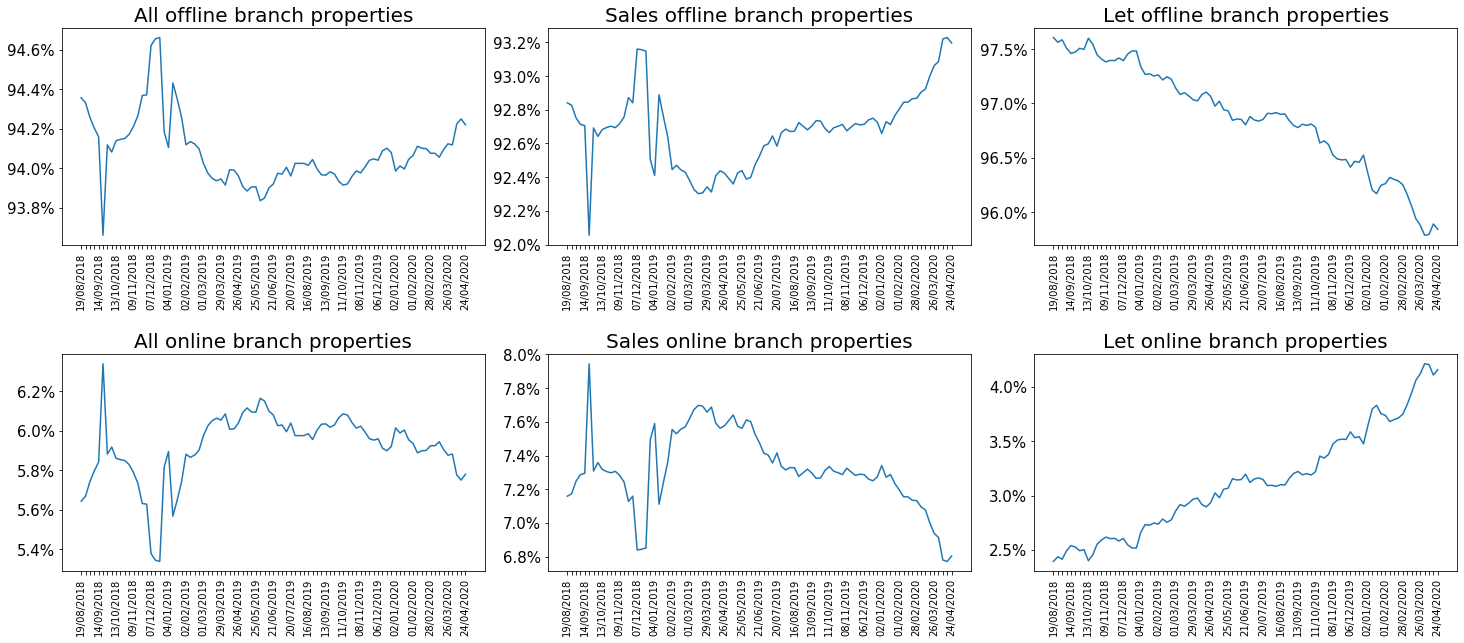

In [56]:
# 6 line charts showing % of all, sales and let properties from online and offline agents

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_rightmove1['Date']

labels = list(df_rightmove1['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove1['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['offlineALL','offlineSale','offlineLet','onlineAll','onlineSale','onlineLet']
chart_titles=['All offline','Sales offline','Let offline', 'All online','Sales online','Let online']

for i in range(6):
    y.append(df_rightmove1[chart_cols[i]]/(df_rightmove1[chart_cols[i]] + df_rightmove1[chart_cols[(i+3)%6]]))
    #y.append(df_rightmove1[chart_cols[(2*i)+1]]/(df_rightmove1[chart_cols[2*i]] + df_rightmove1[chart_cols[(2*i)+1]]))
    ax[int(i/3),i%3].set_title(str("") + chart_titles[i] + str(" branch properties"), fontsize=20)
    ax[int(i/3),i%3].set_xticklabels(labels, rotation = 90)
    ax[int(i/3),i%3].yaxis.set_tick_params(labelsize=15)
    ax[int(i/3),i%3].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=1))
    ax[int(i/3),i%3].plot(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('rightmove1 - online and offline all sales let.png', bbox_inches = 'tight')
    
    slideTitle.append('Offline vs Online: % total properties, Sales and Let Properties')
    slideText.append('August 2018 to '+ str(monthNow))
    imagePath.append('rightmove1 - online and offline all sales let.png')
       
plt.show()

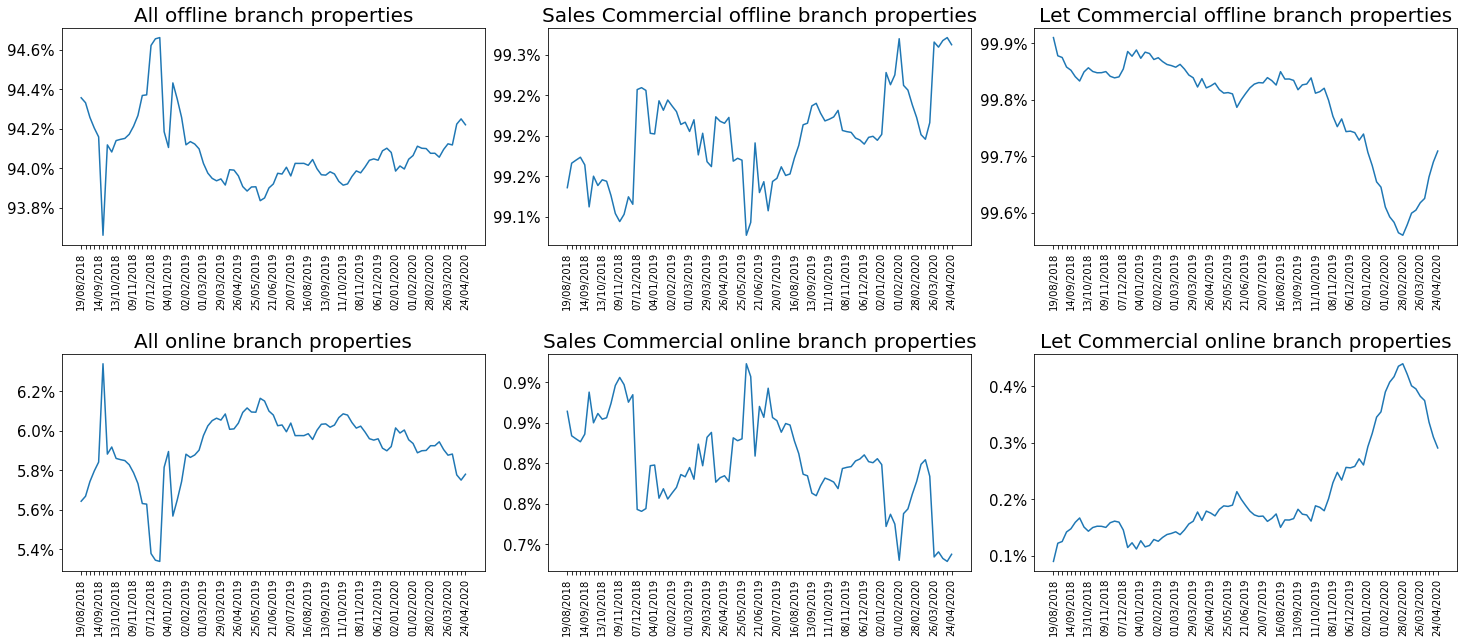

In [57]:
# 6 line charts showing % of all, commerical sales and commercial let properties from online and offline agents

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_rightmove1['Date']

labels = list(df_rightmove1['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_rightmove1['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['offlineALL','offlineComSale','offlineComLet','onlineAll','onlineComSale','onlineComLet']
chart_titles=['All offline','Sales Commercial offline','Let Commercial offline', 'All online',
              'Sales Commercial online','Let Commercial online']

for i in range(6):
    y.append(df_rightmove1[chart_cols[i]]/(df_rightmove1[chart_cols[i]] + df_rightmove1[chart_cols[(i+3)%6]]))
    #y.append(df_rightmove1[chart_cols[(2*i)+1]]/(df_rightmove1[chart_cols[2*i]] + df_rightmove1[chart_cols[(2*i)+1]]))
    ax[int(i/3),i%3].set_title(str("") + chart_titles[i] + str(" branch properties"), fontsize=20)
    ax[int(i/3),i%3].set_xticklabels(labels, rotation = 90)
    ax[int(i/3),i%3].yaxis.set_tick_params(labelsize=15)
    ax[int(i/3),i%3].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=1))
    ax[int(i/3),i%3].plot(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('rightmove1 - online and offline all com sales com let.png', bbox_inches = 'tight')
    
    slideTitle.append('Offline vs Online: % total properties, Commercial Sales and Commercial Let Properties')
    slideText.append('August 2018 to '+ str(monthNow))
    imagePath.append('rightmove1 - online and offline all com sales com let.png')
       
plt.show()

In [58]:
df_rightmove1.head()

,Date,total branches,branches Sales,branches Rent,branches Com Sales,branches Com Rent,check branches,total properties,properties Sales,properties Rent,properties Com Sales,properties Com Rent,check properties,New Sales Branches,New Letting Branches,Gone Sales Branches,Gone Letting Branches,Net sales branch chg,Net letting branch chg,New Com Sales Branches,New Com Letting Branches,Gone Com Sales Branches,Gone Com Letting Branches,Net Com sales branch chg,Net Com letting branch chg,countrywideALL,lslALL,chestertonALL,sequenceALL,connellsALL,martinALL,savillsALL,haartALL,leadersALL,huntersALL,winkworthALL,belvoirALL,fineALL,kinleighALL,struttALL,chancellorsALL,foxtonsALL,purplebricksALL,expressALL,openrentALL,emoovALL,housesimpleALL,tepiloALL,housenetworkALL,urbanALL,hatchedALL,easypropertyALL,yopaALL,restOfOnlineALL,onlineAll,restOfOfflineALL,offlineALL,countrywideSale,lslSale,chestertonSale,sequenceSale,connellsSale,martinSale,savillsSale,haartSale,leadersSale,huntersSale,winkworthSale,belvoirSale,fineSale,kinleighSale,struttSale,chancellorsSale,foxtonsSale,purplebricksSale,expressSale,openrentSale,emoovSale,housesimpleSale,tepiloSale,housenetworkSale,urbanSale,hatchedSale,easypropertySale,yopaSale,restOfOnlineSale,onlineSale,restOfOfflineSale,offlineSale,countrywideLet,lslLet,chestertonLet,sequenceLet,connellsLet,martinLet,savillsLet,haartLet,leadersLet,huntersLet,winkworthLet,belvoirLet,fineLet,kinleighLet,struttLet,chancellorsLet,foxtonsLet,purplebricksLet,expressLet,openrentLet,emoovLet,housesimpleLet,tepiloLet,housenetworkLet,urbanLet,hatchedLet,easypropertyLet,yopaLet,restOfOnlineLet,onlineLet,restOfOfflineLet,offlineLet,countrywideComSale,lslComSale,chestertonComSale,sequenceComSale,connellsComSale,martinComSale,savillsComSale,haartComSale,leadersComSale,huntersComSale,winkworthComSale,belvoirComSale,fineComSale,kinleighComSale,struttComSale,chancellorsComSale,foxtonsComSale,purplebricksComSale,expressComSale,openrentComSale,emoovComSale,housesimpleComSale,tepiloComSale,housenetworkComSale,urbanComSale,hatchedComSale,easypropertyComSale,yopaComSale,restOfOnlineComSale,onlineComSale,restOfOfflineComSale,offlineComSale,countrywideComLet,lslComLet,chestertonComLet,sequenceComLet,connellsComLet,martinComLet,savillsComLet,haartComLet,leadersComLet,huntersComLet,winkworthComLet,belvoirComLet,fineComLet,kinleighComLet,struttComLet,chancellorsComLet,foxtonsComLet,purplebricksComLet,expressComLet,openrentComLet,emoovComLet,housesimpleComLet,tepiloComLet,housenetworkComLet,urbanComLet,hatchedComLet,easypropertyComLet,yopaComLet,restOfOnlineComLet,onlineComLet,restOfOfflineComLet,offlineComLet
0,19/08/2018,33927,14099,11835,5142,2851,0,1126158,794285,267613,28695,35565,0,0,0,0,0,0,0,0,0,0,0,0,0,45282,25667,4473,14218,12600,8058,9428,12041,6289,11546,8668,5048,3327,5370,2932,5066,10030,38988,4254,3028,2468,1387,2175,1294,351,563,335,0,8701,63544,872571,1062614,34070,19840,2566,11719,10222,3615,6741,9421,2840,9240,4035,1780,3212,3332,2393,3490,5268,37913,4214,0,2439,1314,2154,1262,34,560,302,0,6666,56858,603643,737427,8977,5653,1738,2394,2333,4414,2040,2583,3415,2070,4604,3207,58,1998,343,1371,4745,989,31,3028,0,57,2,28,306,0,33,0,1932,6406,209264,261207,682,171,81,105,42,21,371,37,18,173,20,17,57,12,169,85,16,84,9,0,29,16,18,4,4,3,0,0,81,248,26370,28447,1553,3,88,0,3,8,276,0,16,63,9,44,0,28,27,120,1,2,0,0,0,0,1,0,7,0,0,0,22,32,33294,35533
1,25/08/2018,33954,14123,11832,5150,2849,0,1117055,789375,262760,28896,36024,0,66,99,42,102,24,-3,98,60,90,62,8,-2,44844,25517,4387,14229,12592,8042,9355,12019,6188,11474,8532,4965,3308,5307,2866,5091,9722,38736,4347,3048,2457,1433,2129,1304,352,579,327,0,8601,63313,865304,1053742,33706,19781,2520,11709,10220,3588,6691,9380,2847,9179,4005,1720,3194,3299,2346,3511,5199,37692,4311,0,2427,1359,2108,1276,30,576,293,0,6554,56626,599854,732749,8935,5564,1696,2415,2325,4424,2008,2600,3310,2056,4498,3185,55,1970,330,1373,4507,961,30,3048,0,59,2,24,311,0,34,0,1933,6402,205107,256358,674,170,83,105,44,22,37

In [59]:
#
# create a new dataframes for year on year charting
#

In [60]:
year = int(df_rightmove1['Date'].iloc[-1][-4:])
year

2020

In [61]:
# create a function that takes a column of data and creates a dataframe of annual columns

def yoy_dataframes(selected):

    selected_Data = selected

    data = {'Week': range(0,54)}

    df_temp = pd.DataFrame(data, columns=['Week'])

    column_data = []
    column_data=[0]*34
    column_data.extend(list(df_rightmove1[(pd.to_datetime(df_rightmove1['Date'], format='%d/%m/%Y')).dt.year == 2018][selected_Data]))
    df_temp[2018] = column_data

    for i in range(2019,year+1):
        column_data = list(df_rightmove1[(pd.to_datetime(df_rightmove1['Date'], format='%d/%m/%Y')).dt.year == i][selected_Data])
        while len(column_data) < 54:
            column_data.append(0)

        df_temp[i] = column_data
    
    return(df_temp)

In [62]:
# create a function that charts the annual columns

def yoy_dataframes_charts(df_yoyChart_data, title, file_path, number_format):

    fig, ax = plt.subplots(nrows=year-2018, ncols=1, figsize=(15,15))

    plt.subplots_adjust(hspace=0.4, wspace=0.1)

    x = df_yoyChart_data['Week'].astype(str)

    labels = list(df_yoyChart_data['Week'])

    for i in range(year-2018):
        y1 = df_yoyChart_data[2018+i]
        y2 = df_yoyChart_data[2019+i]
        ax[i].set_title((title,2018+i,2019+i), fontsize=20)
        ax[i].set_xticklabels(labels, rotation = 90, fontsize=10)
        ax[i].yaxis.set_tick_params(labelsize=15)
        ax[i].bar(x, y1, width=0.4, label=2018+i)
        ax[i].bar(x.astype(int) +0.4, y2, width=0.4, label=2019+i)
        if number_format == 'percent': # numbers are default y-axis
            ax[i].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
        ax[i].legend()


    if savePNG == 1 or PwrptPrep == 1:
        plt.savefig(file_path, bbox_inches = 'tight')

        slideTitle.append(title)
        slideText.append('August 2018 to '+ str(monthNow))
        imagePath.append(file_path)

    plt.show()


In [63]:
# create the dataframes of annual columns

df_yoyData_totalBranches = yoy_dataframes('total branches')
df_yoyData_totalSalesBranches = yoy_dataframes('branches Sales')
df_yoyData_totalLetBranches = yoy_dataframes('branches Rent')
df_yoyData_totalComSalesBranches = yoy_dataframes('branches Com Sales')
df_yoyData_totalComLetBranches = yoy_dataframes('branches Com Rent')
df_yoyData_totalProperties = yoy_dataframes('total properties')
df_yoyData_totalSalesProperties = yoy_dataframes('properties Sales')
df_yoyData_totalLetProperties = yoy_dataframes('properties Rent')
df_yoyData_totalComSalesProperties = yoy_dataframes('properties Com Sales')
df_yoyData_totalComLetProperties = yoy_dataframes('properties Com Rent')



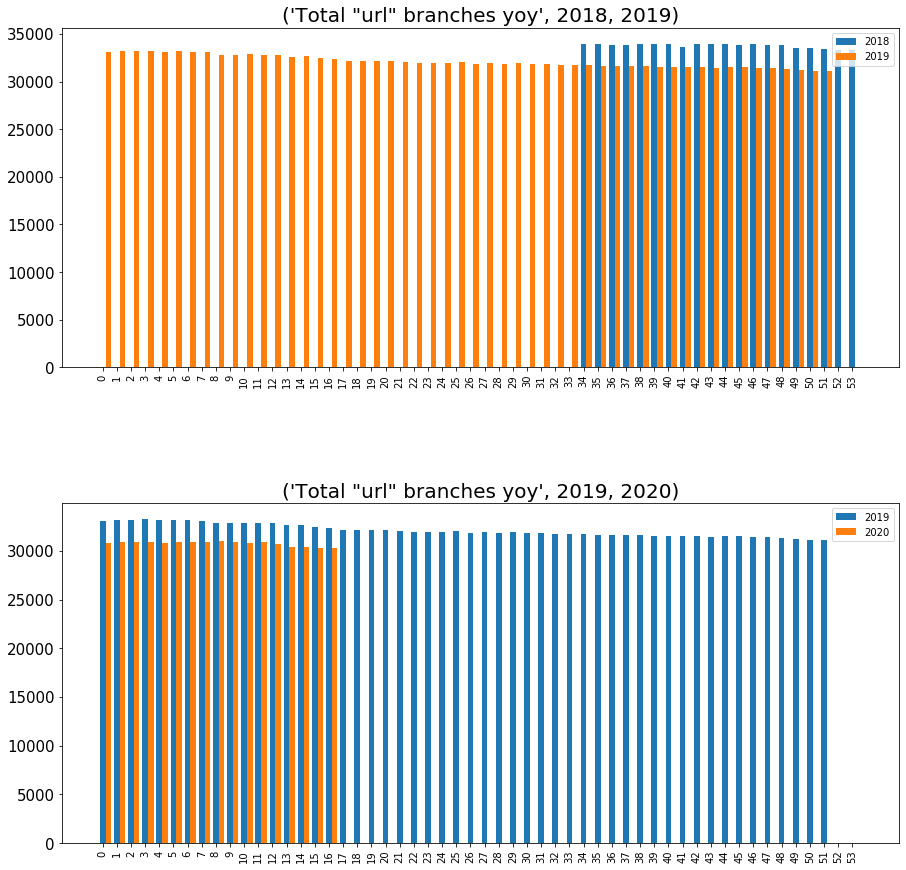

In [64]:
yoy_dataframes_charts(df_yoyData_totalBranches, 'Total "url" branches yoy', 'rightmove1 - total url branches yoy.png','')

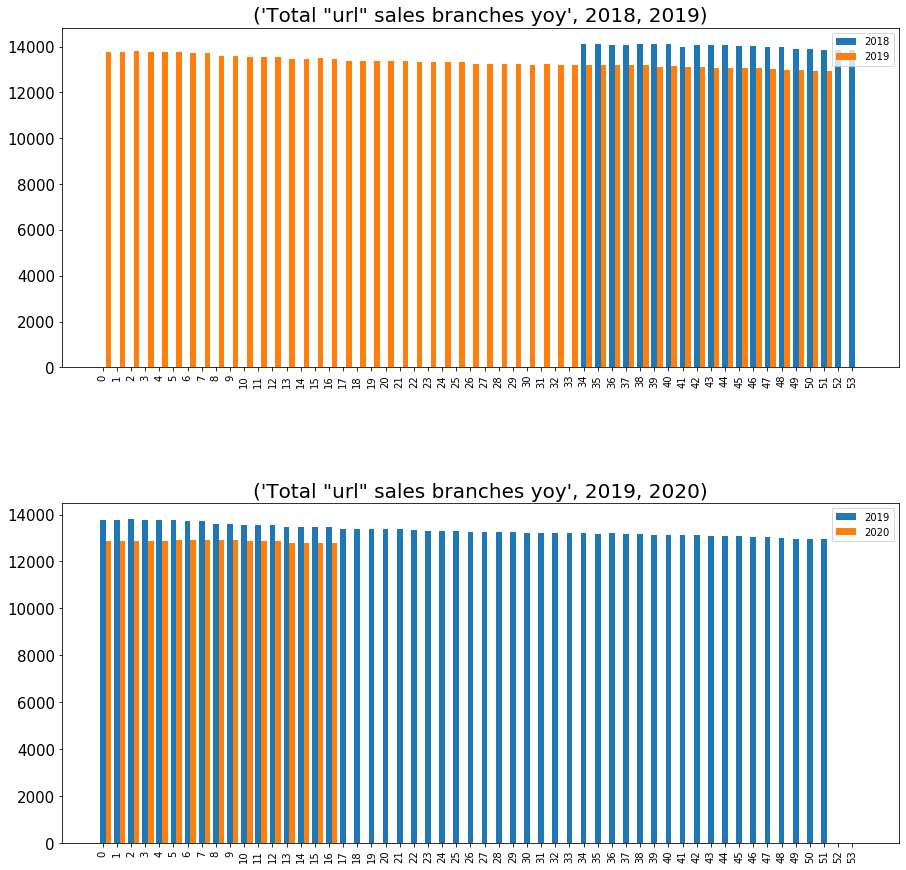

In [65]:
yoy_dataframes_charts(df_yoyData_totalSalesBranches, 'Total "url" sales branches yoy', 'rightmove1 - total url sales branches yoy.png','')

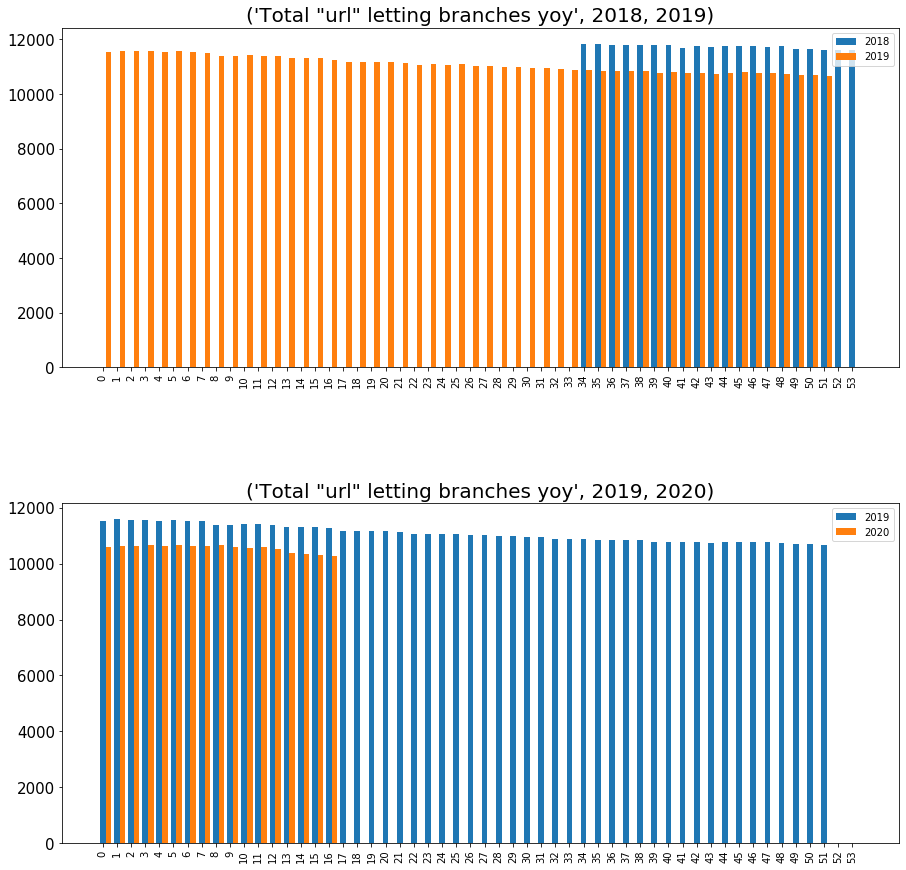

In [66]:
yoy_dataframes_charts(df_yoyData_totalLetBranches, 'Total "url" letting branches yoy', 'rightmove1 - total url let branches yoy.png','')

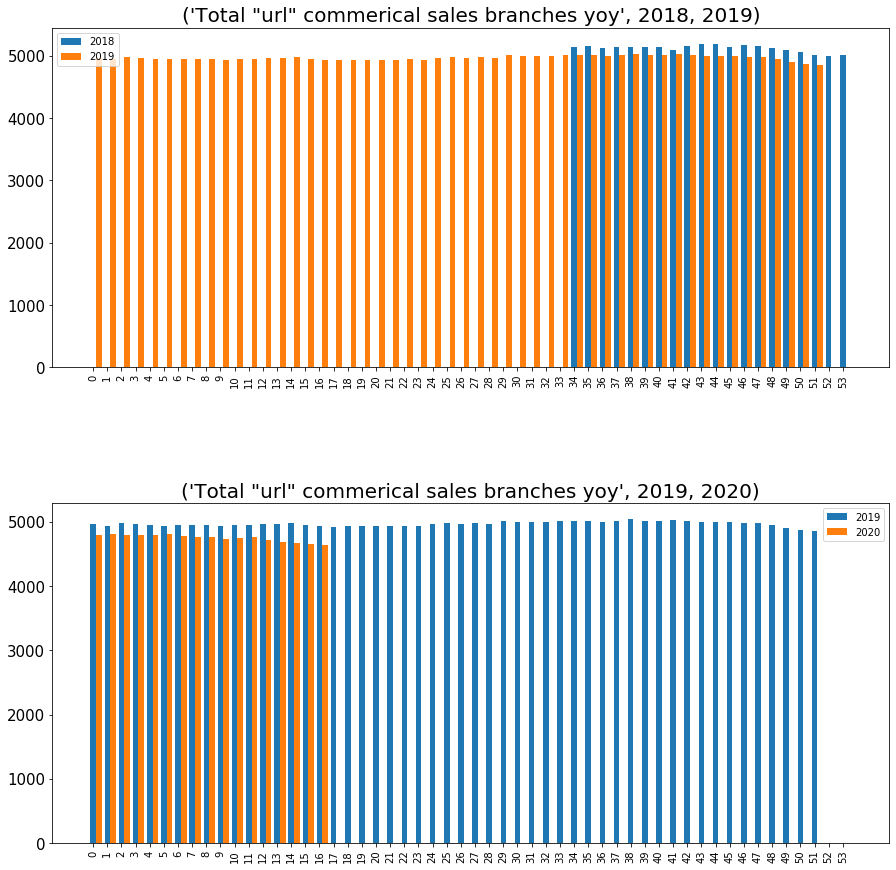

In [67]:
yoy_dataframes_charts(df_yoyData_totalComSalesBranches, 'Total "url" commerical sales branches yoy', 'rightmove1 - total url com sales branches yoy.png','')

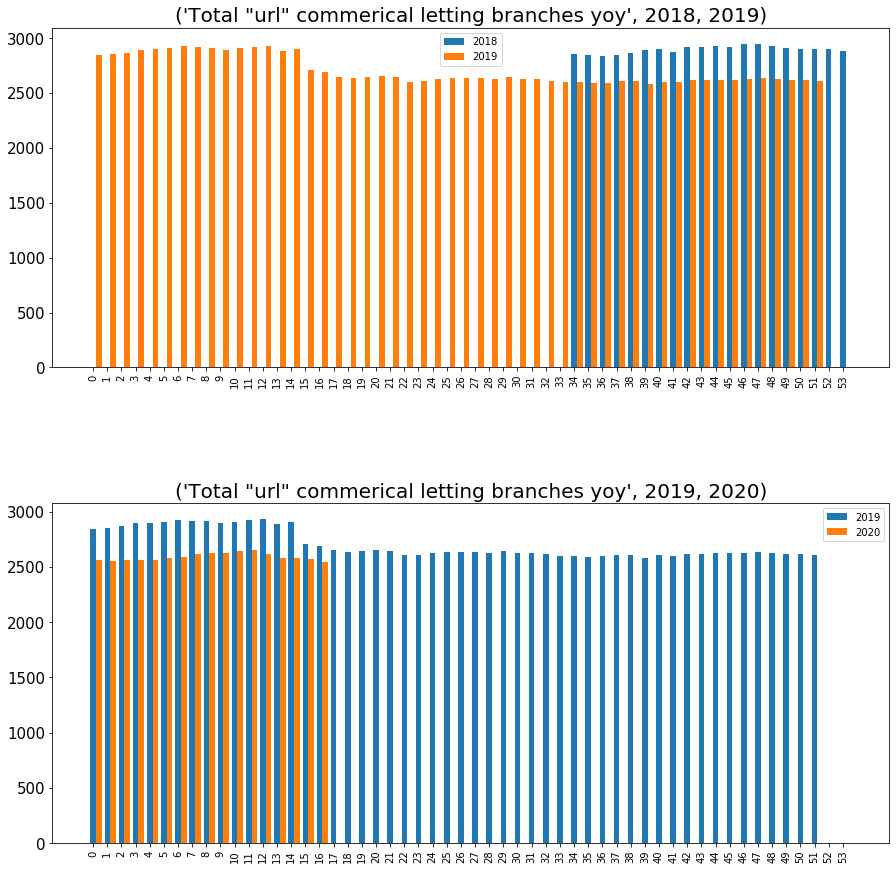

In [68]:
yoy_dataframes_charts(df_yoyData_totalComLetBranches, 'Total "url" commerical letting branches yoy', 'rightmove1 - total url com let branches yoy.png','')

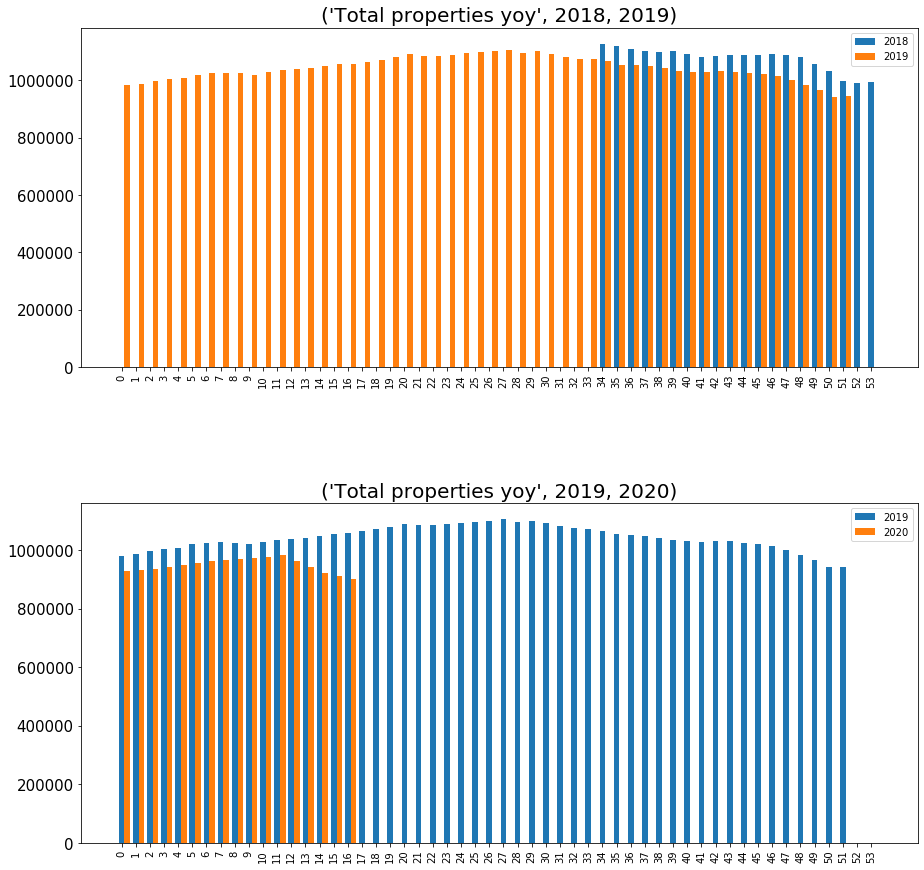

In [69]:
yoy_dataframes_charts(df_yoyData_totalProperties, 'Total properties yoy', 'rightmove1 - total properties yoy.png','')

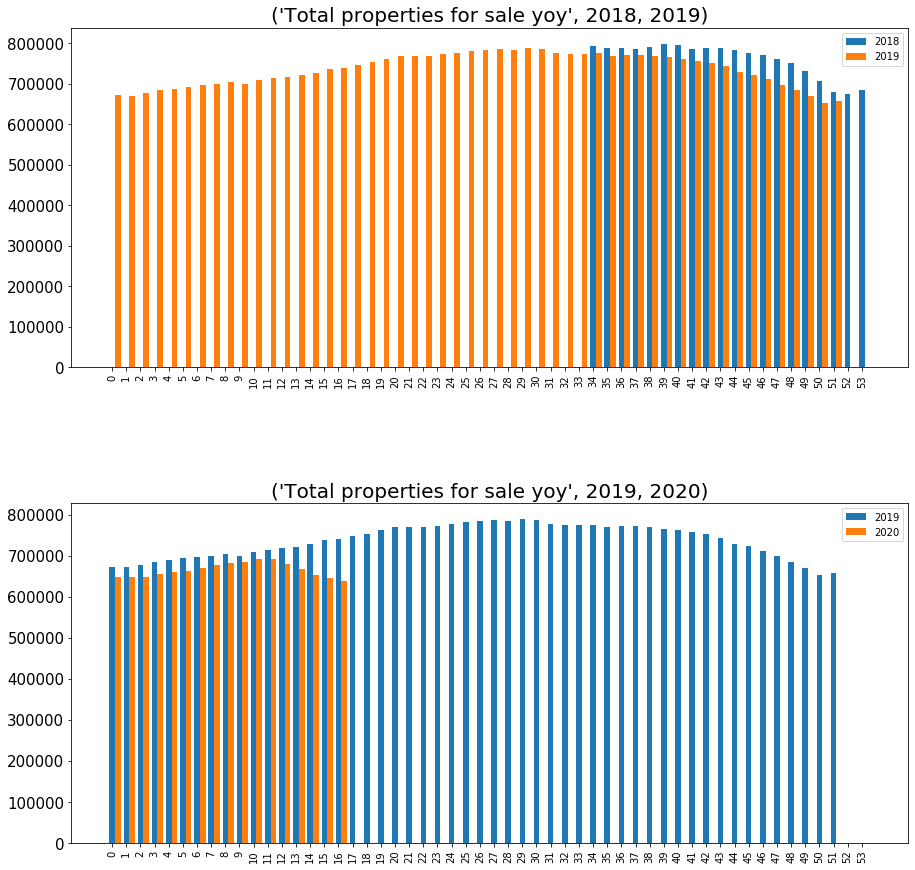

In [70]:
yoy_dataframes_charts(df_yoyData_totalSalesProperties, 'Total properties for sale yoy', 'rightmove1 - sales properties yoy.png','')

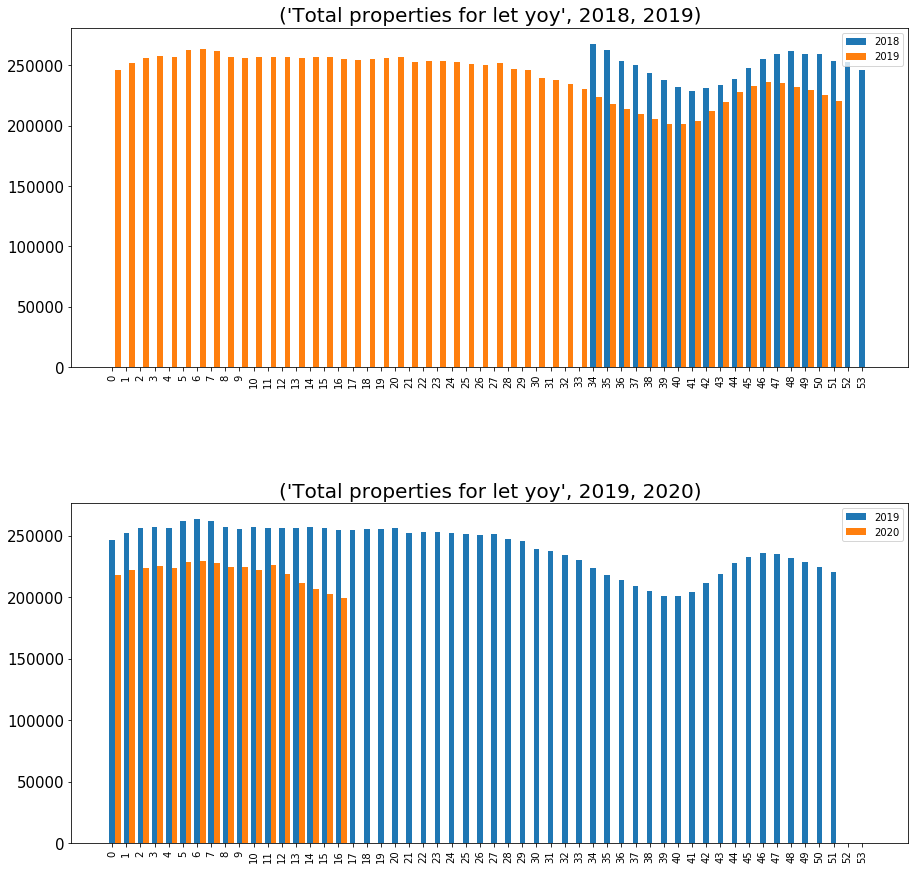

In [71]:
yoy_dataframes_charts(df_yoyData_totalLetProperties, 'Total properties for let yoy', 'rightmove1 - let properties yoy.png','')

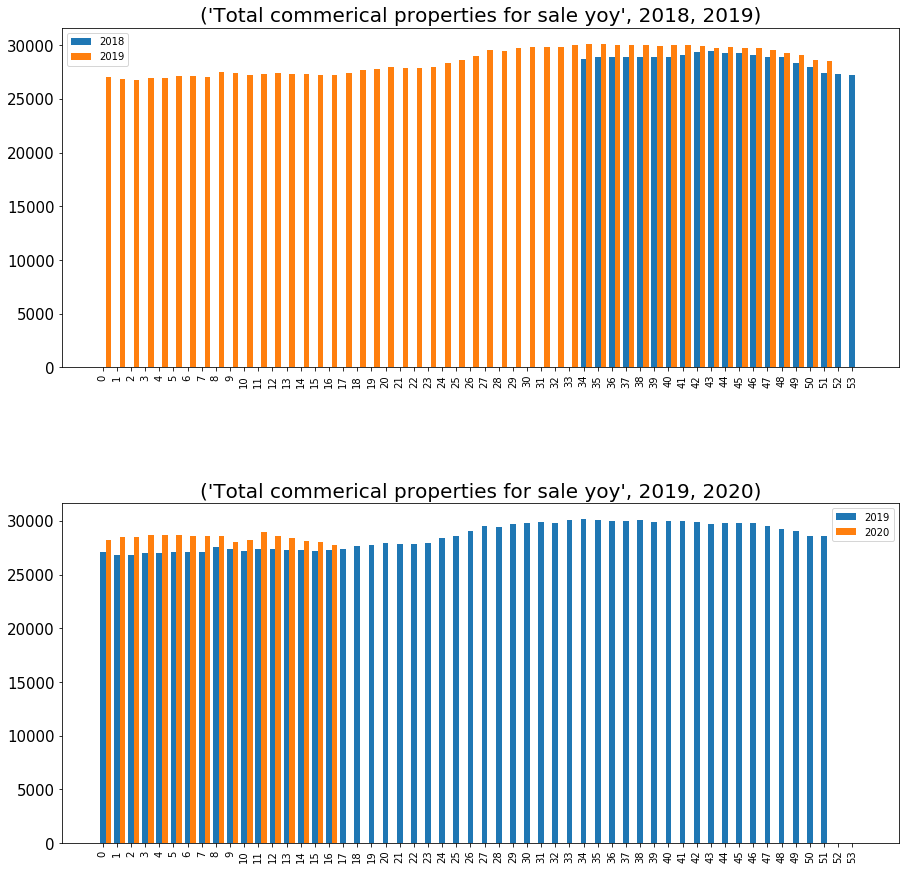

In [72]:
yoy_dataframes_charts(df_yoyData_totalComSalesProperties, 'Total commerical properties for sale yoy', 'rightmove1 - com sale properties yoy.png','')

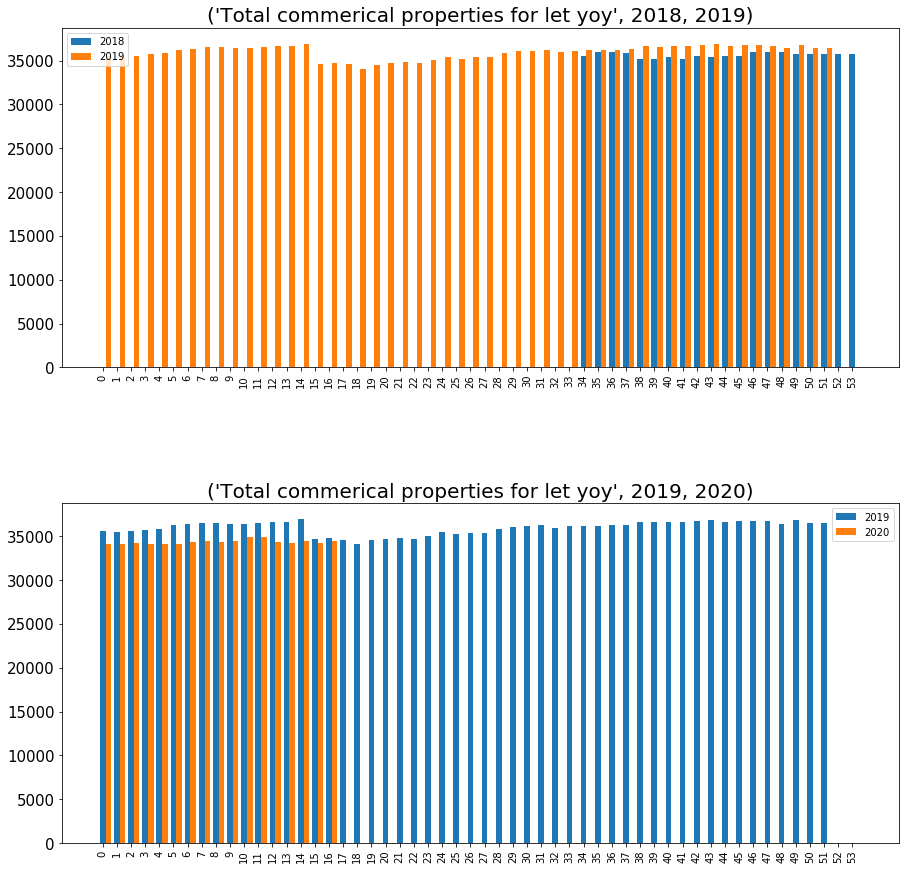

In [73]:
yoy_dataframes_charts(df_yoyData_totalComLetProperties, 'Total commerical properties for let yoy', 'rightmove1 - com let properties yoy.png','')

In [74]:
#
# build charts for the businesses to focus on
#

In [75]:
# build a function to plot the bar and line time series charts

def business_charts(chart_cols, chart_titles, chart_cols_total, title, file_path):

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

    plt.subplots_adjust(hspace=0.5, wspace=0.15)
    #plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

    x = df_rightmove1['Date']

    labels = list(df_rightmove1['Date'])

    # prevent x-axis labels from overlapping by printing every nth label
    for i in range(4,len(labels),4):
        labels[i-1], labels[i-2], labels[i-3]='','',''

    labels[len(labels)-1]=list(df_rightmove1['Date'])[-1]
    labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

    y=[]
    chart_cols=chart_cols
    chart_titles=chart_titles
    if chart_cols_total != '':
        chart_cols_total=chart_cols_total
    
    for i in range(4):
        if chart_cols_total != '':
            y.append(df_rightmove1[chart_cols[i]]/df_rightmove1[chart_cols_total[i]])
        else:
            y.append(df_rightmove1[chart_cols[i]])
        #y.append(df_rightmove1[chart_cols[(2*i)+1]]/(df_rightmove1[chart_cols[2*i]] + df_rightmove1[chart_cols[(2*i)+1]]))
        #ax[int(i/2),i%2].set_title(str("") + chart_titles[i] + str(" properties"), fontsize=20)
        ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
        ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
        if chart_cols_total != '':
            ax[int(i/2),i%2].set_title(str("") + chart_titles[i] + str(" properties as a %"), fontsize=20)
            ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=1))
            ax[int(i/2),i%2].plot(x, y[i])
        else:
            ax[int(i/2),i%2].set_title(str("") + chart_titles[i] + str(" properties"), fontsize=20)
            ax[int(i/2),i%2].bar(x, y[i])
            

    if savePNG == 1 or PwrptPrep == 1:
        plt.savefig(file_path, bbox_inches = 'tight')

        slideTitle.append(title)
        slideText.append('August 2018 to '+ str(monthNow))
        imagePath.append(file_path)

    plt.show()



In [76]:
# purplebricks

In [77]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Purplebricks Data')
    slideText.append('')
    imagePath.append('')

plt.show()

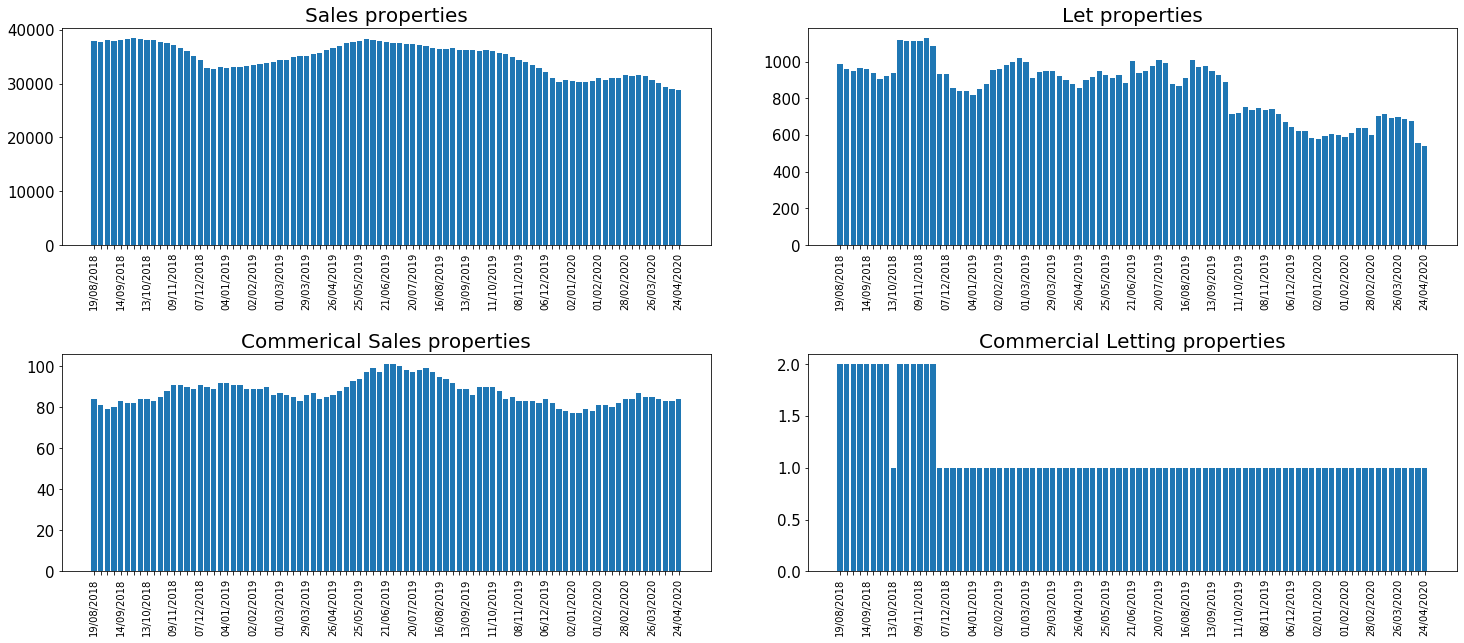

In [78]:
business_charts(['purplebricksSale','purplebricksLet','purplebricksComSale','purplebricksComLet'],
              ['Sales','Let','Commerical Sales','Commercial Letting'],
                '',
              'Purplebricks property listings',
              'rightmove1 - purplebricks bar.png')


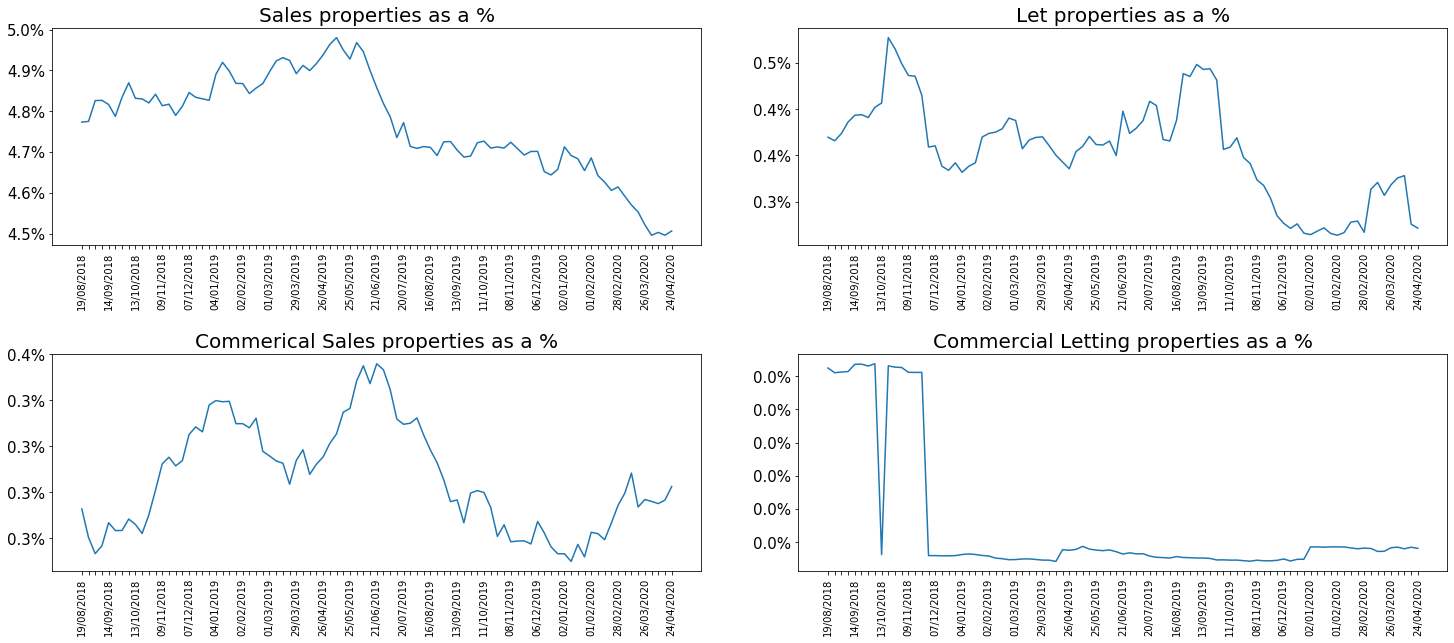

In [79]:
business_charts(['purplebricksSale','purplebricksLet','purplebricksComSale','purplebricksComLet'],
              ['Sales','Let','Commerical Sales','Commercial Letting'],
                ['properties Sales','properties Rent','properties Com Sales','properties Com Rent'],
              'Purplebricks property listings, market share',
              'rightmove1 - purplebricks line.png')


In [80]:
df_yoyData_total_purplebricks_SaleProperties = yoy_dataframes('purplebricksSale')
df_yoyData_total_purplebricks_LetProperties = yoy_dataframes('purplebricksLet')
df_yoyData_total_purplebricks_ComSaleProperties = yoy_dataframes('purplebricksComSale')
df_yoyData_total_purplebricks_ComLetProperties = yoy_dataframes('purplebricksComLet')


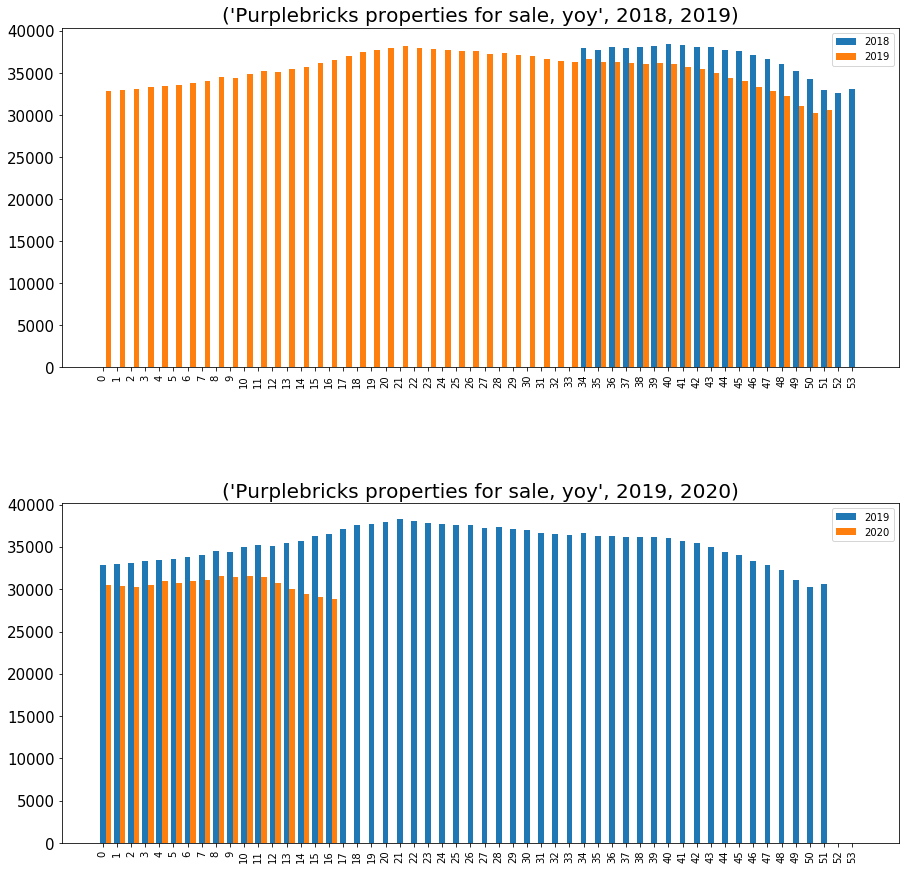

In [81]:
yoy_dataframes_charts(df_yoyData_total_purplebricks_SaleProperties,
                      'Purplebricks properties for sale, yoy',
                      'rightmove1 - purplebricks properties sale yoy.png','')

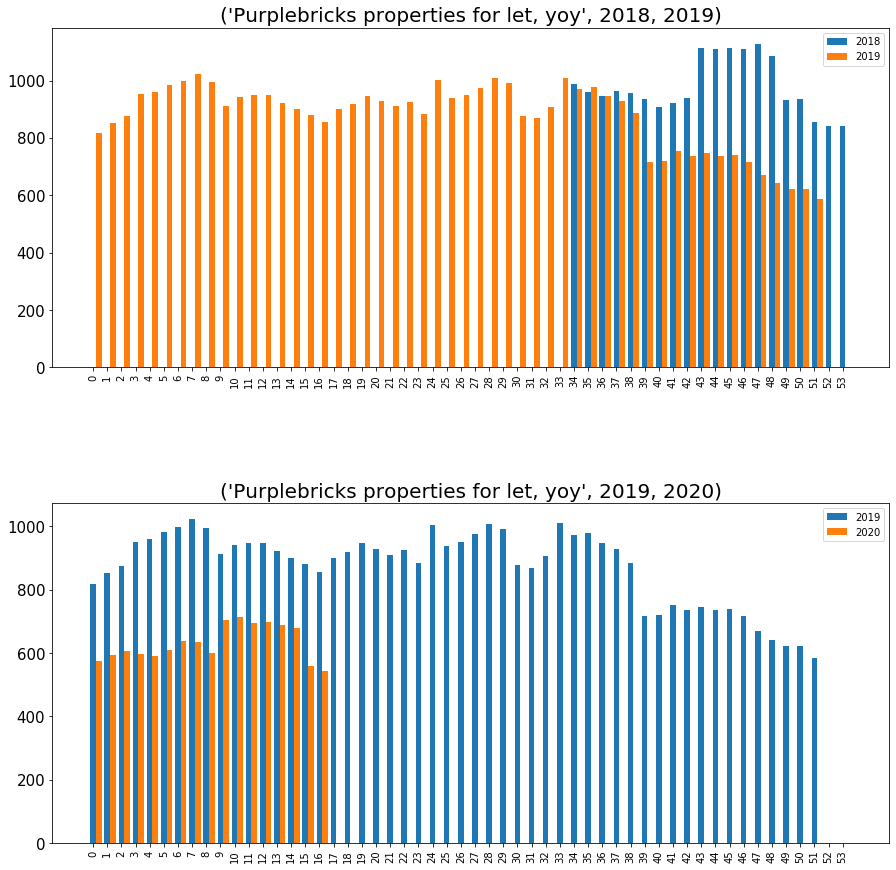

In [82]:
yoy_dataframes_charts(df_yoyData_total_purplebricks_LetProperties,
                      'Purplebricks properties for let, yoy',
                      'rightmove1 - purplebricks properties let yoy.png','')

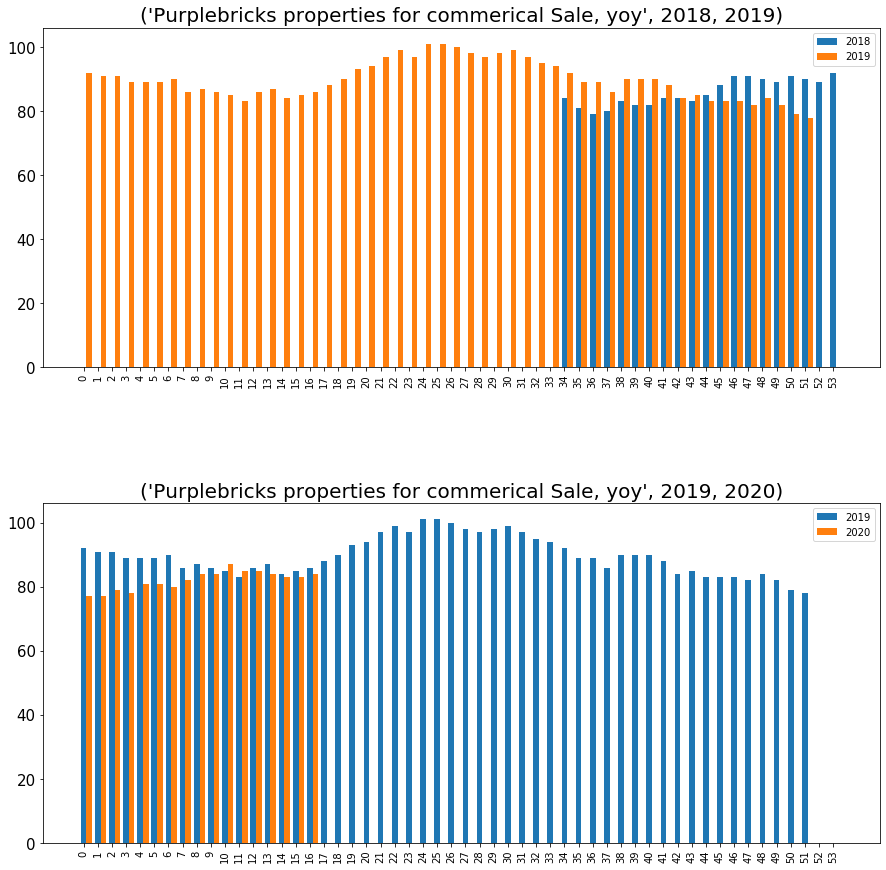

In [83]:
yoy_dataframes_charts(df_yoyData_total_purplebricks_ComSaleProperties,
                      'Purplebricks properties for commerical Sale, yoy',
                      'rightmove1 - purplebricks properties com sale yoy.png','')

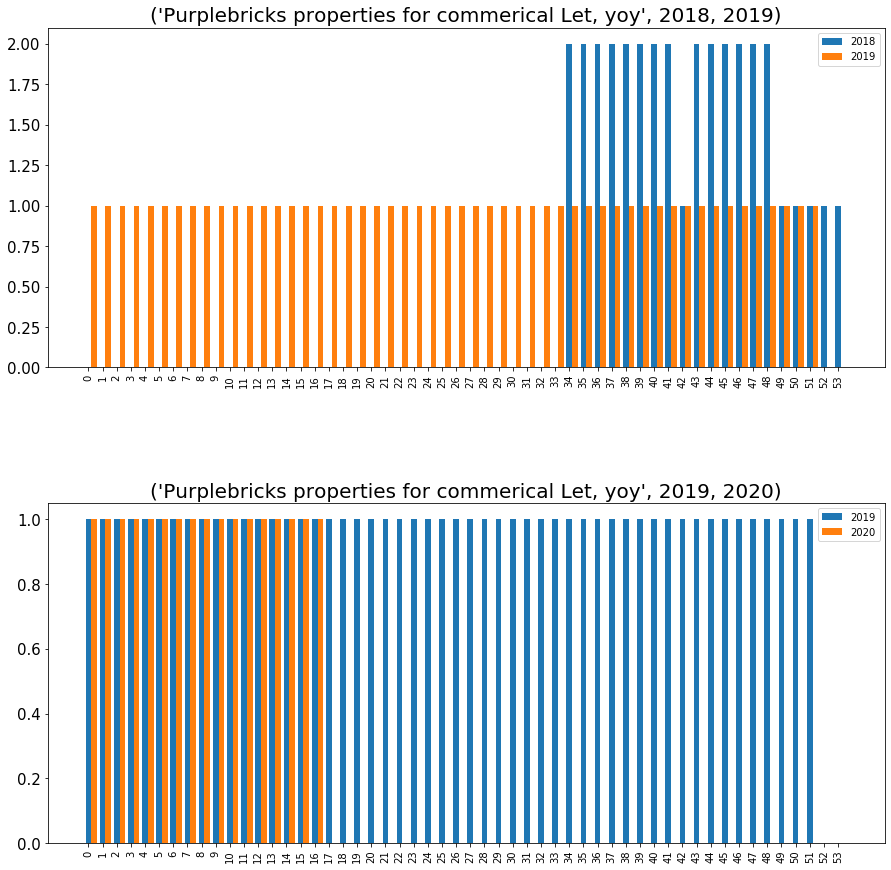

In [84]:
yoy_dataframes_charts(df_yoyData_total_purplebricks_ComLetProperties,
                      'Purplebricks properties for commerical Let, yoy',
                      'rightmove1 - purplebricks properties com let yoy.png','')

In [85]:
# Countrywide

In [86]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Countrywide Data')
    slideText.append('')
    imagePath.append('')

plt.show()

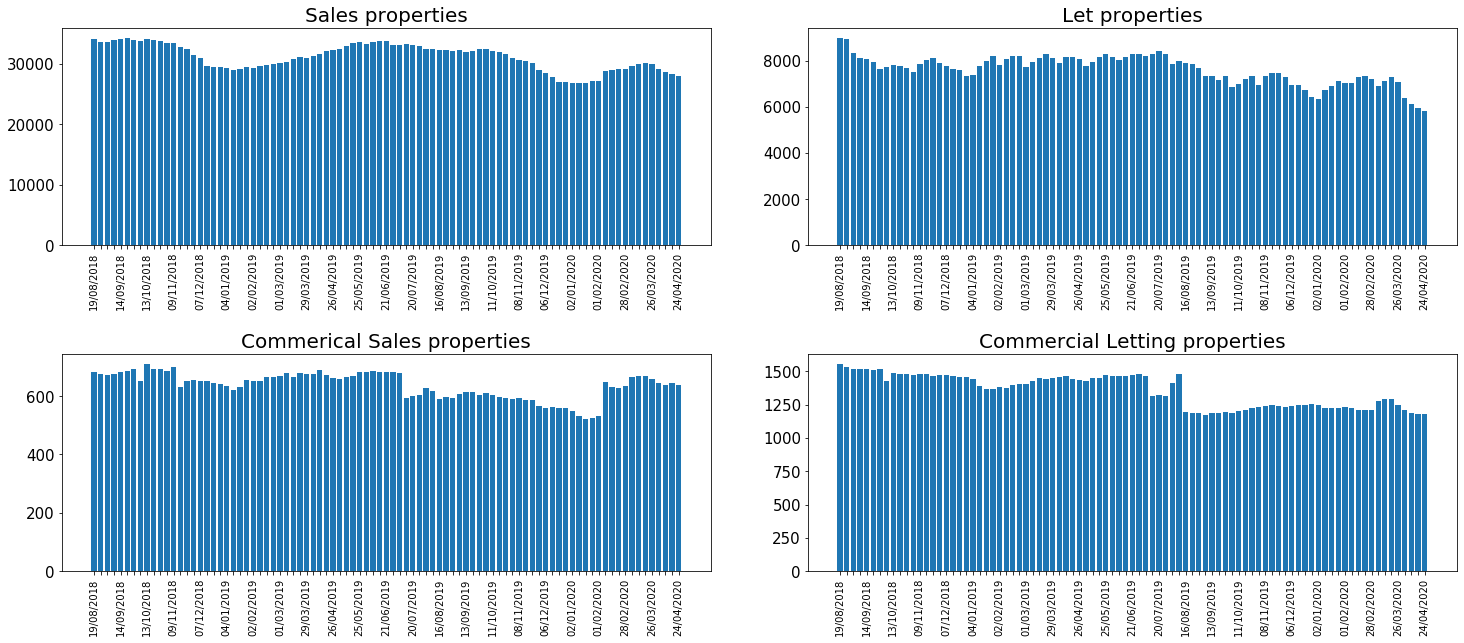

In [87]:
business_charts(['countrywideSale','countrywideLet','countrywideComSale','countrywideComLet'],
              ['Sales','Let','Commerical Sales','Commercial Letting'],
                '',
              'countrywide property listings',
              'rightmove1 - countrywide bar.png')

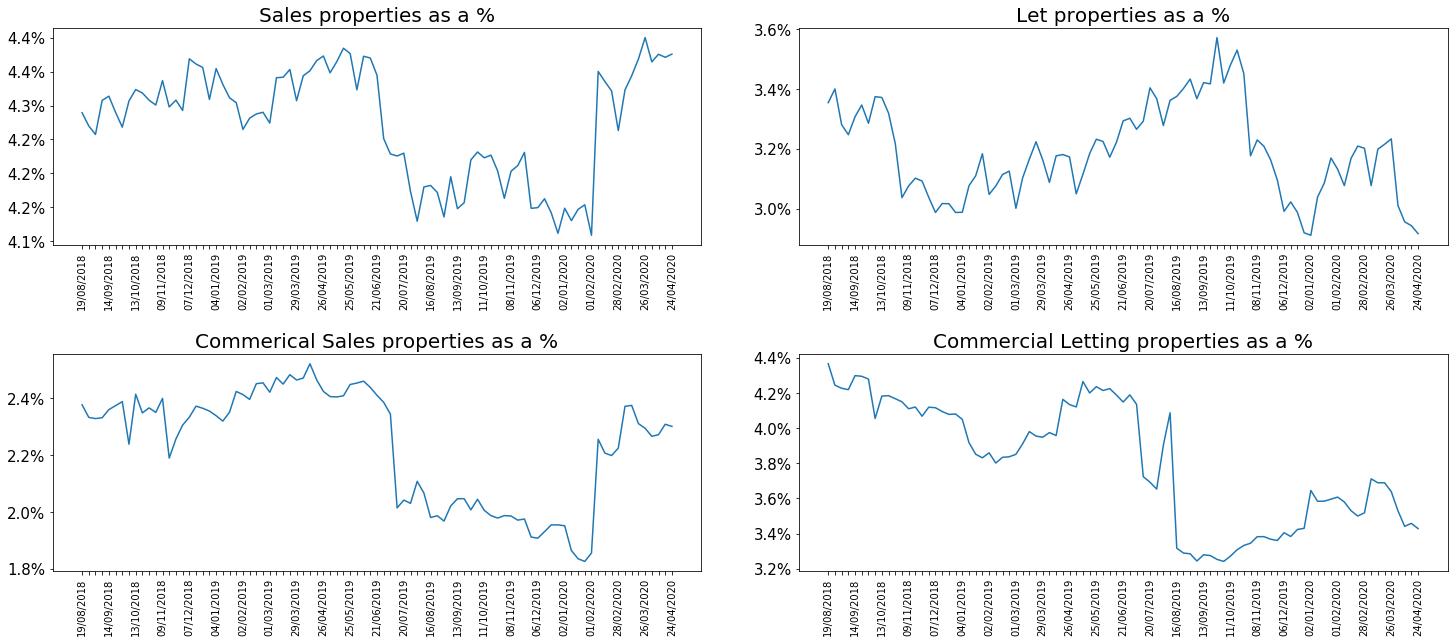

In [88]:
business_charts(['countrywideSale','countrywideLet','countrywideComSale','countrywideComLet'],
              ['Sales','Let','Commerical Sales','Commercial Letting'],
                ['properties Sales','properties Rent','properties Com Sales','properties Com Rent'],
              'countrywide property listings, market share',
              'rightmove1 - countrywide line.png')


In [89]:
df_yoyData_total_countrywide_SaleProperties = yoy_dataframes('countrywideSale')
df_yoyData_total_countrywide_LetProperties = yoy_dataframes('countrywideLet')
df_yoyData_total_countrywide_ComSaleProperties = yoy_dataframes('countrywideComSale')
df_yoyData_total_countrywide_ComLetProperties = yoy_dataframes('countrywideComLet')


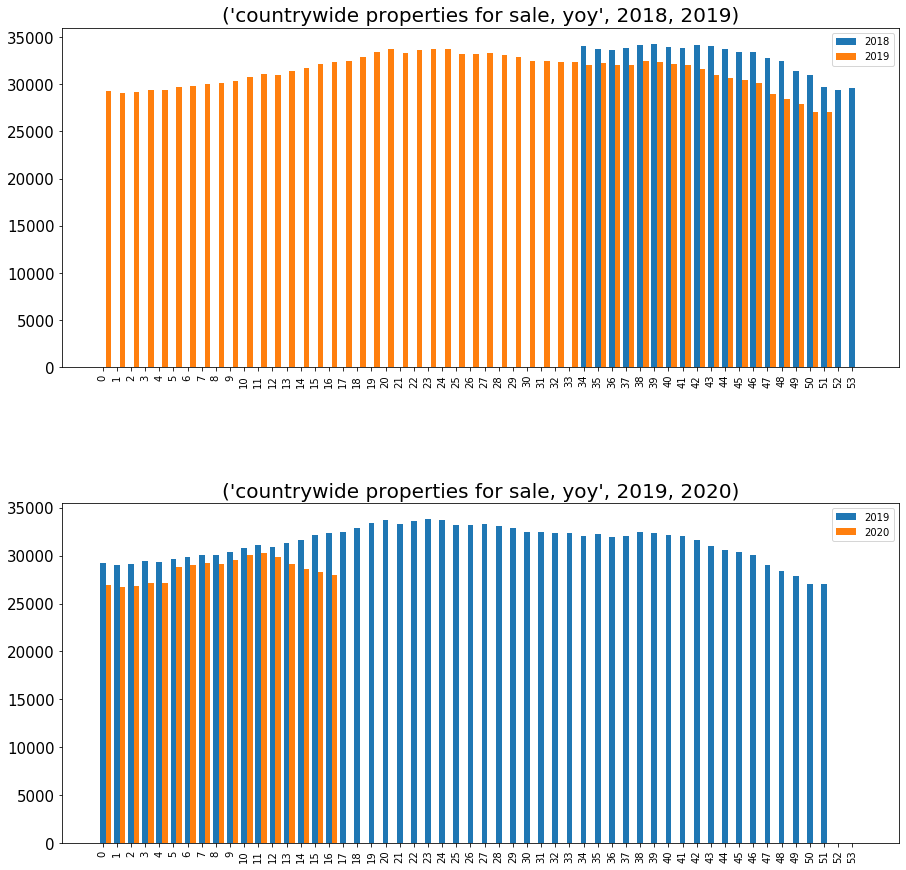

In [90]:
yoy_dataframes_charts(df_yoyData_total_countrywide_SaleProperties,
                      'countrywide properties for sale, yoy',
                      'rightmove1 - countrywide properties sale yoy.png','')

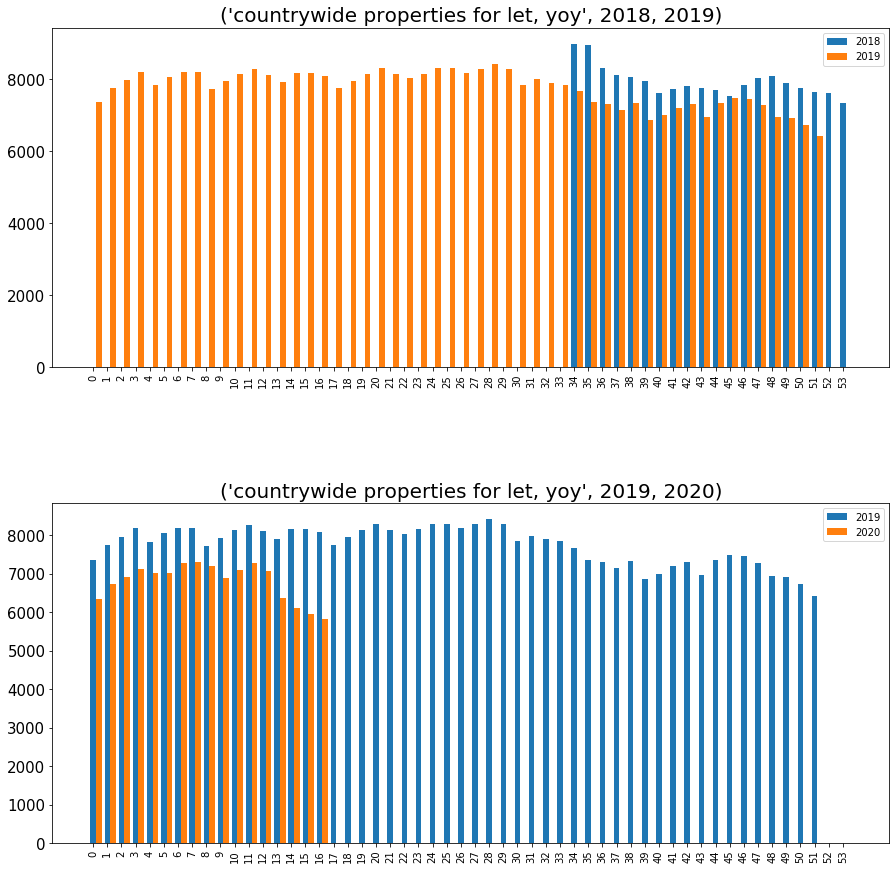

In [91]:
yoy_dataframes_charts(df_yoyData_total_countrywide_LetProperties,
                      'countrywide properties for let, yoy',
                      'rightmove1 - countrywide properties let yoy.png','')

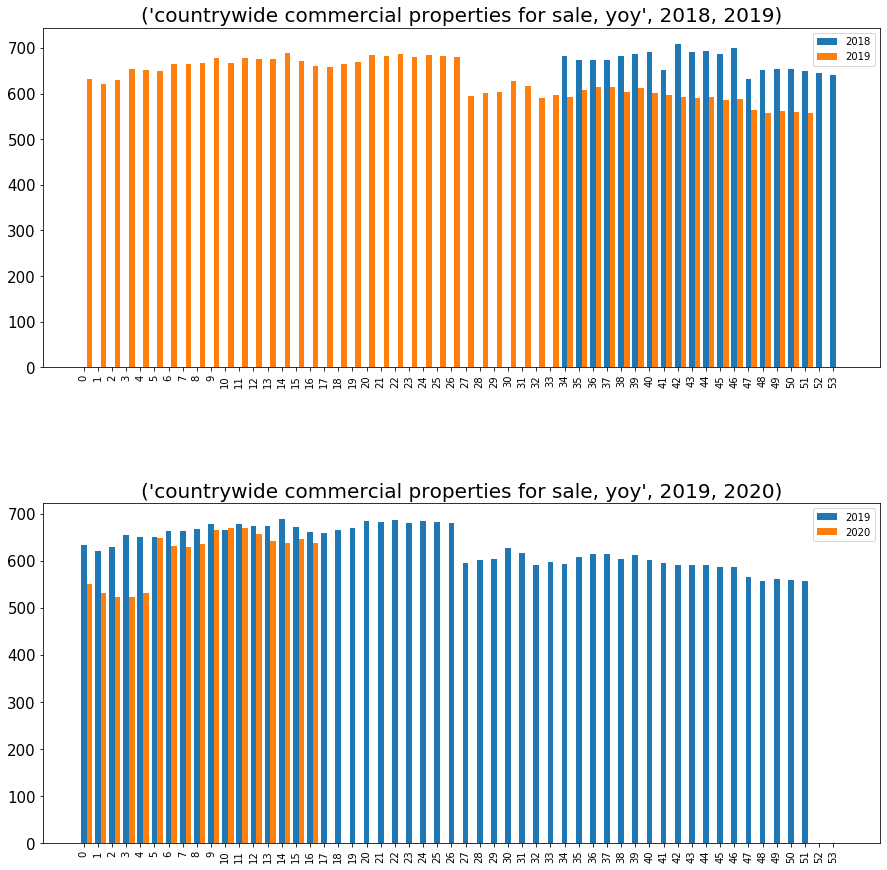

In [92]:
yoy_dataframes_charts(df_yoyData_total_countrywide_ComSaleProperties,
                      'countrywide commercial properties for sale, yoy',
                      'rightmove1 - countrywide com properties sale yoy.png','')

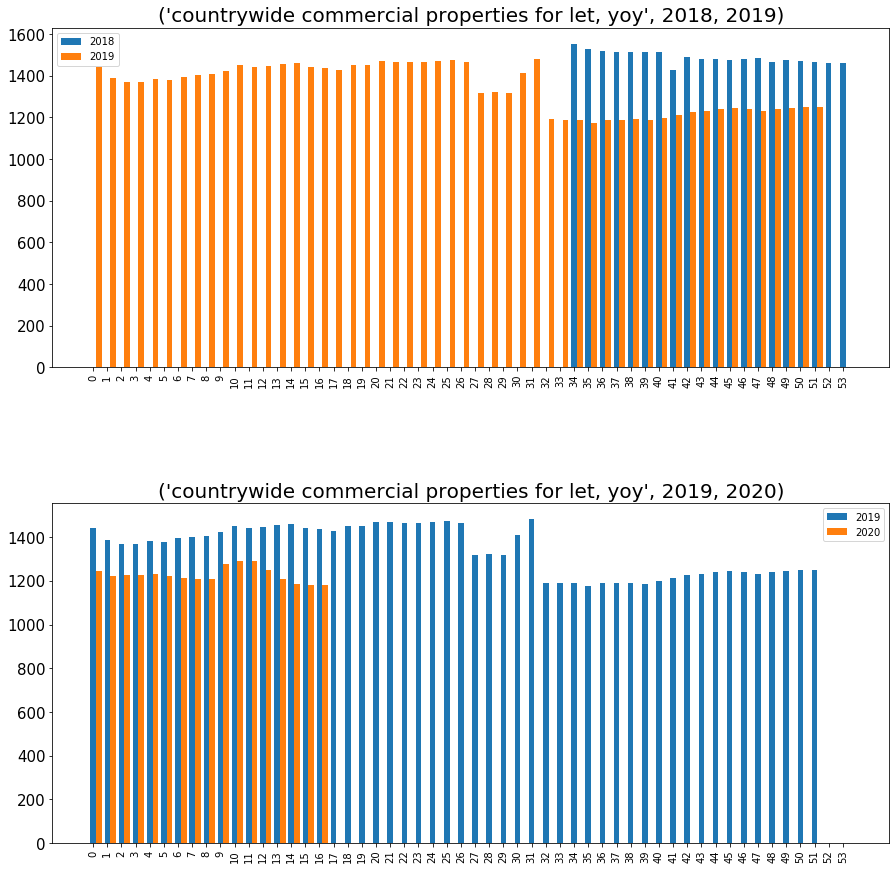

In [93]:
yoy_dataframes_charts(df_yoyData_total_countrywide_ComLetProperties,
                      'countrywide commercial properties for let, yoy',
                      'rightmove1 - countrywide com properties let yoy.png','')

In [94]:
# LSL

In [95]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('LSL Data')
    slideText.append('')
    imagePath.append('')

plt.show()

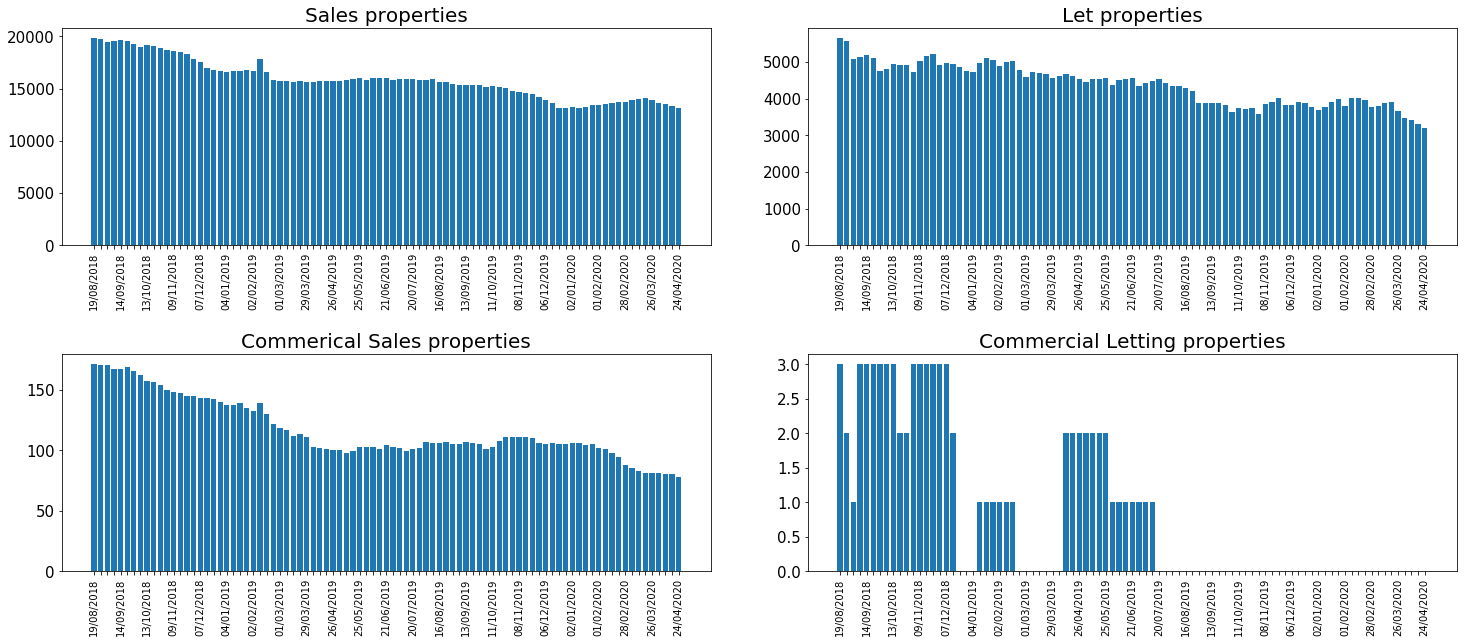

In [96]:
business_charts(['lslSale','lslLet','lslComSale','lslComLet'],
              ['Sales','Let','Commerical Sales','Commercial Letting'],
                '',
              'LSL property listings',
              'rightmove1 - lsl bar.png')

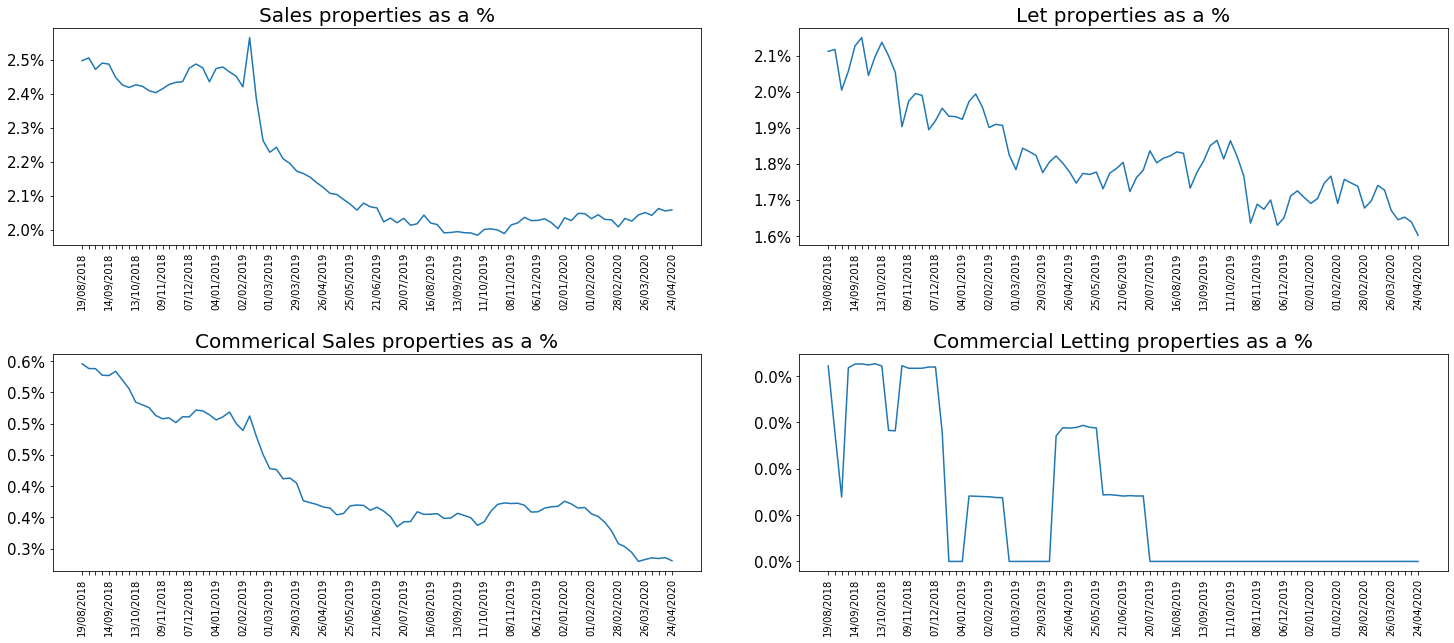

In [97]:
business_charts(['lslSale','lslLet','lslComSale','lslComLet'],
              ['Sales','Let','Commerical Sales','Commercial Letting'],
                ['properties Sales','properties Rent','properties Com Sales','properties Com Rent'],
              'LSL property listings, market share',
              'rightmove1 - lsl line.png')


In [98]:
df_yoyData_total_lsl_SaleProperties = yoy_dataframes('lslSale')
df_yoyData_total_lsl_LetProperties = yoy_dataframes('lslLet')
df_yoyData_total_lsl_ComSaleProperties = yoy_dataframes('lslComSale')
df_yoyData_total_lsl_ComLetProperties = yoy_dataframes('lslComLet')


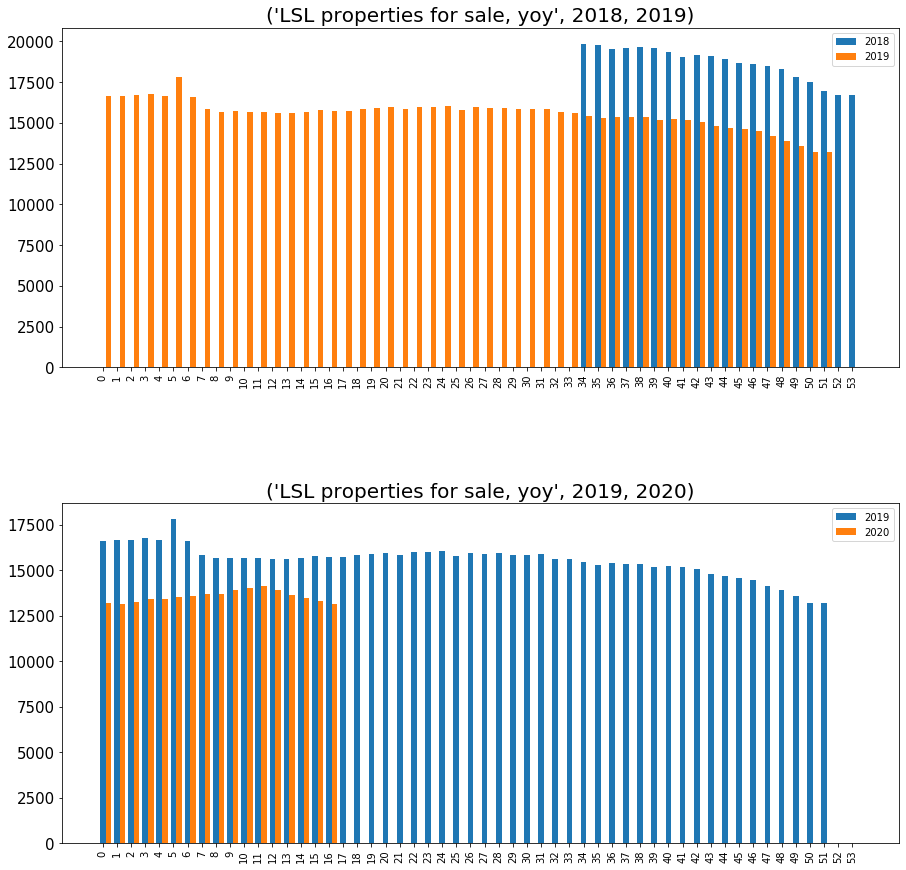

In [99]:
yoy_dataframes_charts(df_yoyData_total_lsl_SaleProperties,
                      'LSL properties for sale, yoy',
                      'rightmove1 - lsl properties sale yoy.png','')

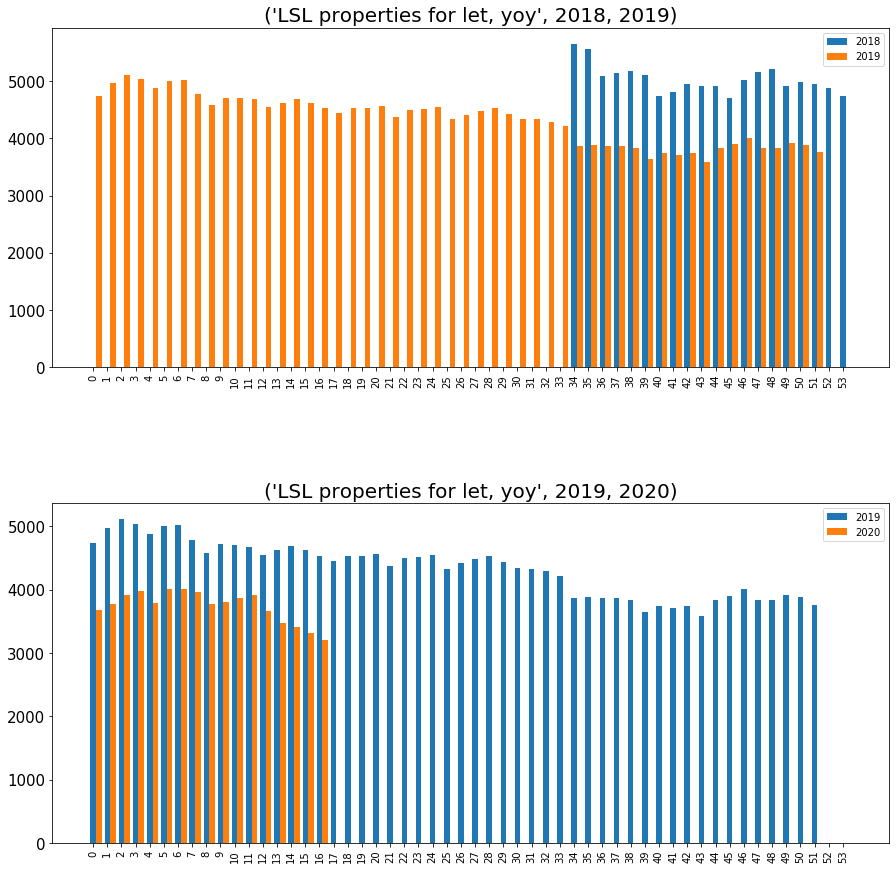

In [100]:
yoy_dataframes_charts(df_yoyData_total_lsl_LetProperties,
                      'LSL properties for let, yoy',
                      'rightmove1 - lsl properties let yoy.png','')

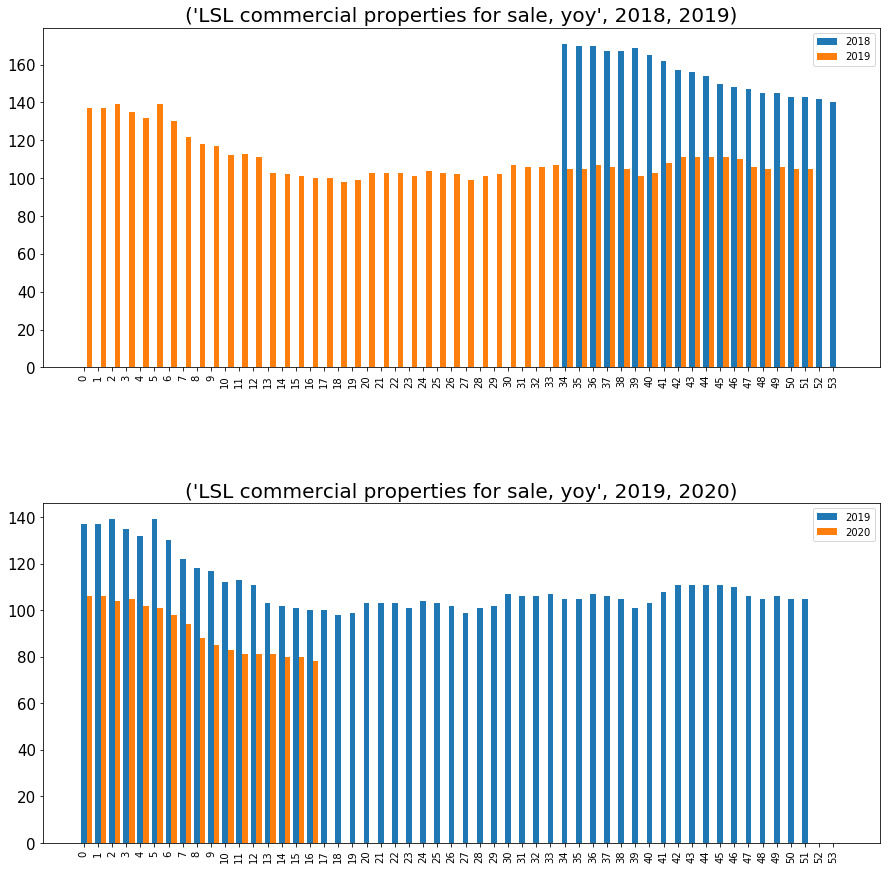

In [101]:
yoy_dataframes_charts(df_yoyData_total_lsl_ComSaleProperties,
                      'LSL commercial properties for sale, yoy',
                      'rightmove1 - lsl com properties sale yoy.png','')

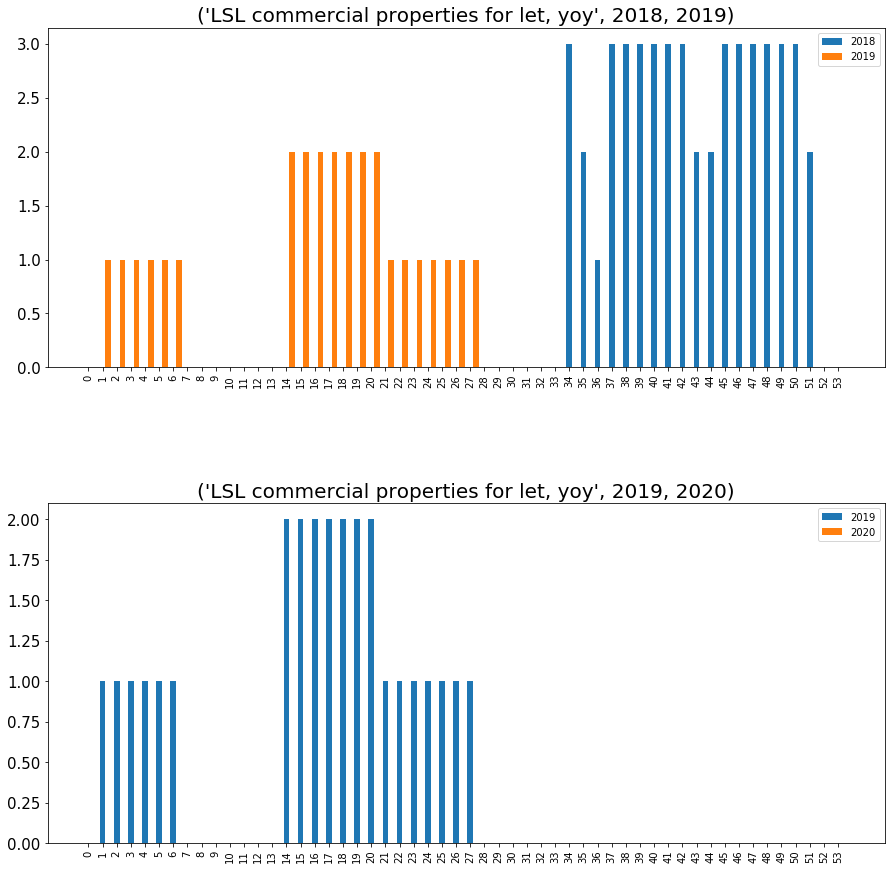

In [102]:
yoy_dataframes_charts(df_yoyData_total_lsl_ComLetProperties,
                      'LSL commercial properties for let, yoy',
                      'rightmove1 - lsl com properties let yoy.png','')

In [140]:
#
# Preparing the presentation
#

In [141]:
if PwrptPrep == 1:
    prs = Presentation('Presentation - template.pptx')

In [142]:
# change the title and date on the front page
# the slide shapes do not go nicely 0,1,2 they go 1,2,0
if PwrptPrep == 1:
    
    listShapes = [1,2,0]

    for i in range(3):
        slide = prs.slides[0]
        shape = slide.shapes[listShapes[i]]
        text_frame = shape.text_frame
        text_frame.paragraphs[0].runs[0].text = presentationTitle[i]

In [143]:
# add the Preamble and Summary slides
if PwrptPrep == 1:

    title_Preamble_Summary = ['Preamble', 'Summary']

    for i in range(2):
        blank_slide_layout = prs.slide_layouts[15]
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = title_Preamble_Summary[i]

        top = height = Inches(1.5)
        width = Inches(10.25)
        left = Inches(0.25)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame
        tf.word_wrap = True
        p = tf.add_paragraph()
        p.level = 1
        
        if i == 0:
            p.text = 'original data points collected from the Rightmove website is currently ' + '{0:.2f}'.format(total_dataPoints/1000000) + ' million'
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'the data is gathered weekly from August 2018 to '+ str(monthNow)
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'the chart pack analyses the data from the website and also looks specifically at a number of estate agents:'
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'namely: Countrywide; LSL; and Purplebricks'
            p = tf.add_paragraph()
            p.level = 1            
            p.text = 'the aim of the chart pack is to show three things:'
            p = tf.add_paragraph()
            p.level = 1
            p.text = '1) show the trends of the Rightmove customer base such as listings Sales vs Lettings, number of branches, new vs closing branches, online vs offline'            
            p = tf.add_paragraph()
            p.level = 1
            p.text = '2) looks specifically at some key customers'
            p = tf.add_paragraph()
            p.level = 1
            p.text = '3) as a real time input to UK housing economic indicators'            

        if i == 1:
            p.text = 'to be added by user if required'
            p = tf.add_paragraph()
            p.level = 1

In [144]:
# add the Chapter contents slide and Chapter 1 slide
if PwrptPrep == 1:
    
    blank_slide_layout = prs.slide_layouts[15]
    slide = prs.slides.add_slide(blank_slide_layout)

    shapes = slide.shapes

    shapes.title.text = 'Contents'

    rows = cols = 2
    left = Inches(0.25)
    top = Inches(1.5)
    width = Inches(1.5)
    height = Inches(1.5)

    table = shapes.add_table(rows, cols, left, top, width, height).table

    # set column widths
    table.columns[0].width = Inches(1.5)
    table.columns[1].width = Inches(2.0)

    tableText = ['01', 'Charts', '02', 'Appendix']
    TableFont = [60, 14, 60, 14]
    tableCell1 = [0,0,1,1]
    tableCell2 = [0,1,0,1]

    for i in range(4):
        table.cell(tableCell1[i], tableCell2[i]).text = tableText[i]
        cell = table.cell(tableCell1[i], tableCell2[i])
        para = cell.text_frame.paragraphs[0]
        para.font.bold = True
        para.font.size = Pt(TableFont[i])
        para.font.color.rgb = RGBColor(0, 55, 129) 
        cell.vertical_anchor = MSO_ANCHOR.MIDDLE
        fill = cell.fill
        fill.background()

    slide = prs.slides.add_slide(prs.slide_layouts[9])
    placeholder = slide.placeholders[1]
    placeholder.text = '01'
    title = slide.shapes.title
    title.text = 'Charts'


In [145]:
# add a blank slide with title, text and saved graphic as per the list of items
if PwrptPrep == 1:
    
    for i in range(len(slideTitle)):

        blank_slide_layout = prs.slide_layouts[15]
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = slideTitle[i]

        top = width = height = Inches(1.5)
        left = Inches(0.25)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame

        p = tf.add_paragraph()
        p.text = slideText[i]
        p.font.bold = True
        p.font.size = Pt(14)

        left = Inches(0.25)
        top = Inches(2.5)
        height = Inches(4)
        width = Inches(9)
        if imagePath[i] !='':
            pic = slide.shapes.add_picture(imagePath[i], left, top, width = width, height = height)


In [146]:
# add Appendix slide

if PwrptPrep == 1:
    
    slide = prs.slides.add_slide(prs.slide_layouts[9])
    placeholder = slide.placeholders[1]
    placeholder.text = '02'
    title = slide.shapes.title
    title.text = 'Appendix'

In [147]:
# add the 'First 5 lines of the latest upload slide'

if PwrptPrep == 1:
    
    blank_slide_layout = prs.slide_layouts[15]
    slide = prs.slides.add_slide(blank_slide_layout)

    shapes = slide.shapes

    shapes.title.text = 'First 5 lines of the latest upload ('+str(monthNow)+')'

    rows, cols = 6,7
    left = Inches(0.25)
    top = Inches(1.5)
    width = Inches(1.5)
    height = Inches(0.25)

    table = shapes.add_table(rows, cols, left, top, width, height).table

    # set column widths
    table.columns[0].width = Inches(0.5)
    table.columns[1].width = Inches(1.0)
    table.columns[2].width = Inches(1.5)
    table.columns[3].width = Inches(1.5)
    table.columns[4].width = Inches(1.5)
    table.columns[5].width = Inches(1.0)
    table.columns[6].width = Inches(3.0)
    
    tableText = ['']
    
    for col in df[-1].columns:
        tableText.append(col)
        
    for i in range(36):
        if i%6 == 0:
            tableText.append(str(int(i/6)))          
        tableText.append(str(df[-1].iat[int(i/6), i%6]))

    for i in range(42):
        table.cell(int(i/7), i%7).text = tableText[i]
        cell = table.cell(int(i/7), i%7)
        para = cell.text_frame.paragraphs[0]
        if i%7 == 0 or int(i/7) == 0:
            para.font.bold = True
        else:
            para.font.bold = False
        para.font.size = Pt(10)
        para.font.color.rgb = RGBColor(0, 0, 0) 
        cell.vertical_anchor = MSO_ANCHOR.MIDDLE
        fill = cell.fill
        fill.background()
    

In [148]:
# add the methodology slide
# and the 'Code used to gather page', rotate the text
# and upload the Python, github and Pandas pages

if PwrptPrep == 1:
    
    # list of appendix text files to take from my PC to be put into slides
    appendixTitleList = ['Limitations of this analysis','Appendix: Methodology','Code used to gather the Rightmove data part 1 ',
                         'Code used to gather the Rightmove data part 2 ','Appendix: Python Programming Language',
                         'Appendix: Github','Appendix: Pandas']
    appendixFileList = ['Presentation - Rightmove1 limitations.txt','Presentation - methodolgy Rightmove1.txt',
                        'Presentation - code Rightmove1 1.txt','Presentation - code Rightmove1 2.txt', 
                        'Presentation - Python Slide.txt', 'Presentation - Github Slide.txt','Presentation - Pandas Slide.txt']

    for i in range(5):
        blank_slide_layout = prs.slide_layouts[15]
        slide = prs.slides.add_slide(blank_slide_layout)
        title = slide.shapes.title
        title.text = appendixTitleList[i]
        lines = [line.rstrip('\n') for line in open(appendixFileList[i])]
        
        if appendixTitleList[i] == 'Code used to gather the Rightmove data ': # rotate the text code -90
            top = height = Inches(1.25)
            width = Inches(10.25)
            left = Inches(-4.25)
            txBox = slide.shapes.add_textbox(left, top, width, height)
            txBox.rotation = -90            
        else: # other slides are normal
            top = height = Inches(1.25)
            width = Inches(10.25)
            left = Inches(0.25)
            txBox = slide.shapes.add_textbox(left, top, width, height)
            txBox.rotation = 0
            
        tf = txBox.text_frame
        tf.word_wrap = True
        
        for ii in range(len(lines)):
            p = tf.add_paragraph()
            p.level = 1
            
            if appendixTitleList[i] == 'Appendix: Methodology' and ii>1: # reduce the font size after line 1
                p.font.size = Pt(7)     
            elif (appendixTitleList[i] == 'Code used to gather the Rightmove data part 1 ') or \
            (appendixTitleList[i] == 'Code used to gather the Rightmove data part 2 '):
                p.font.size = Pt(8)
                p.level = 0  
            else:
                txBox.rotation = 0
                p.font.size = Pt(12)            
            
            if 'https' in lines[ii]:
                r = p.add_run()
                r.text = lines[ii].split('https')[0]
                r1 = p.add_run()
                r1.text = 'https' + lines[ii].split('https')[1]        
                hlink = r1.hyperlink
                hlink.address = r1.text
            else:
                p.text = lines[ii]


In [149]:
# add closing slide

if PwrptPrep == 1:
    
    blank_slide_layout = prs.slide_layouts[40]
    slide = prs.slides.add_slide(blank_slide_layout)

In [150]:
# save completed presentation to file using name diven in the slide name cell
if PwrptPrep == 1:

    prs.save(saveFileName)

In [151]:
#
# all the slide types
# only to be run for reference
#

In [152]:
# prs = Presentation('Persentation - template.pptx')

In [153]:
# for i in range(43):

#     blank_slide_layout = prs.slide_layouts[i]
#     slide = prs.slides.add_slide(blank_slide_layout)

In [154]:
# prs.save('presentationPrep - all the slides.pptx')

In [155]:
df[-1].head()

,branch_id,name,telephone,address,results,branch_url
0,167675,"North West Homes Professionals, Preston",01772 399007,"71 Fylde Road, Preston, PR1 2XQ",2,https://www.rightmove.co.uk/commercial-propert...
1,19782,"haart, Doncaster",01302 960044,"6 Kingsway House, Hall Gate, Doncaster, DN1 3NX",2,https://www.rightmove.co.uk/commercial-propert...
2,74731,"Kenton , Orpington",01689 499700,"316 High Street, Orpington, BR6 0NG",2,https://www.rightmove.co.uk/commercial-propert...
3,177158,"Russell Property, Stansted Mountfitchet",01279 949002,"Castle Maltings Lower Street, Stansted, CM24 8LP",48,https://www.rightmove.co.uk/property-for-sale/...
4,129040,"BlakeStanley Estate Agents, Clapton",020 8012 5721,"57 Chatsworth Road, London, E5 0LH",17,https://www.rightmove.co.uk/property-for-sale/...


In [156]:
df_rightmove1.head()

,Date,total branches,branches Sales,branches Rent,branches Com Sales,branches Com Rent,check branches,total properties,properties Sales,properties Rent,properties Com Sales,properties Com Rent,check properties,New Sales Branches,New Letting Branches,Gone Sales Branches,Gone Letting Branches,Net sales branch chg,Net letting branch chg,New Com Sales Branches,New Com Letting Branches,Gone Com Sales Branches,Gone Com Letting Branches,Net Com sales branch chg,Net Com letting branch chg,countrywideALL,lslALL,chestertonALL,sequenceALL,connellsALL,martinALL,savillsALL,haartALL,leadersALL,huntersALL,winkworthALL,belvoirALL,fineALL,kinleighALL,struttALL,chancellorsALL,foxtonsALL,purplebricksALL,expressALL,openrentALL,emoovALL,housesimpleALL,tepiloALL,housenetworkALL,urbanALL,hatchedALL,easypropertyALL,yopaALL,restOfOnlineALL,onlineAll,restOfOfflineALL,offlineALL,countrywideSale,lslSale,chestertonSale,sequenceSale,connellsSale,martinSale,savillsSale,haartSale,leadersSale,huntersSale,winkworthSale,belvoirSale,fineSale,kinleighSale,struttSale,chancellorsSale,foxtonsSale,purplebricksSale,expressSale,openrentSale,emoovSale,housesimpleSale,tepiloSale,housenetworkSale,urbanSale,hatchedSale,easypropertySale,yopaSale,restOfOnlineSale,onlineSale,restOfOfflineSale,offlineSale,countrywideLet,lslLet,chestertonLet,sequenceLet,connellsLet,martinLet,savillsLet,haartLet,leadersLet,huntersLet,winkworthLet,belvoirLet,fineLet,kinleighLet,struttLet,chancellorsLet,foxtonsLet,purplebricksLet,expressLet,openrentLet,emoovLet,housesimpleLet,tepiloLet,housenetworkLet,urbanLet,hatchedLet,easypropertyLet,yopaLet,restOfOnlineLet,onlineLet,restOfOfflineLet,offlineLet,countrywideComSale,lslComSale,chestertonComSale,sequenceComSale,connellsComSale,martinComSale,savillsComSale,haartComSale,leadersComSale,huntersComSale,winkworthComSale,belvoirComSale,fineComSale,kinleighComSale,struttComSale,chancellorsComSale,foxtonsComSale,purplebricksComSale,expressComSale,openrentComSale,emoovComSale,housesimpleComSale,tepiloComSale,housenetworkComSale,urbanComSale,hatchedComSale,easypropertyComSale,yopaComSale,restOfOnlineComSale,onlineComSale,restOfOfflineComSale,offlineComSale,countrywideComLet,lslComLet,chestertonComLet,sequenceComLet,connellsComLet,martinComLet,savillsComLet,haartComLet,leadersComLet,huntersComLet,winkworthComLet,belvoirComLet,fineComLet,kinleighComLet,struttComLet,chancellorsComLet,foxtonsComLet,purplebricksComLet,expressComLet,openrentComLet,emoovComLet,housesimpleComLet,tepiloComLet,housenetworkComLet,urbanComLet,hatchedComLet,easypropertyComLet,yopaComLet,restOfOnlineComLet,onlineComLet,restOfOfflineComLet,offlineComLet
0,19/08/2018,33927,14099,11835,5142,2851,0,1126158,794285,267613,28695,35565,0,0,0,0,0,0,0,0,0,0,0,0,0,45282,25667,4473,14218,12600,8058,9428,12041,6289,11546,8668,5048,3327,5370,2932,5066,10030,38988,4254,3028,2468,1387,2175,1294,351,563,335,0,8701,63544,872571,1062614,34070,19840,2566,11719,10222,3615,6741,9421,2840,9240,4035,1780,3212,3332,2393,3490,5268,37913,4214,0,2439,1314,2154,1262,34,560,302,0,6666,56858,603643,737427,8977,5653,1738,2394,2333,4414,2040,2583,3415,2070,4604,3207,58,1998,343,1371,4745,989,31,3028,0,57,2,28,306,0,33,0,1932,6406,209264,261207,682,171,81,105,42,21,371,37,18,173,20,17,57,12,169,85,16,84,9,0,29,16,18,4,4,3,0,0,81,248,26370,28447,1553,3,88,0,3,8,276,0,16,63,9,44,0,28,27,120,1,2,0,0,0,0,1,0,7,0,0,0,22,32,33294,35533
1,25/08/2018,33954,14123,11832,5150,2849,0,1117055,789375,262760,28896,36024,0,66,99,42,102,24,-3,98,60,90,62,8,-2,44844,25517,4387,14229,12592,8042,9355,12019,6188,11474,8532,4965,3308,5307,2866,5091,9722,38736,4347,3048,2457,1433,2129,1304,352,579,327,0,8601,63313,865304,1053742,33706,19781,2520,11709,10220,3588,6691,9380,2847,9179,4005,1720,3194,3299,2346,3511,5199,37692,4311,0,2427,1359,2108,1276,30,576,293,0,6554,56626,599854,732749,8935,5564,1696,2415,2325,4424,2008,2600,3310,2056,4498,3185,55,1970,330,1373,4507,961,30,3048,0,59,2,24,311,0,34,0,1933,6402,205107,256358,674,170,83,105,44,22,37